<a href="https://colab.research.google.com/github/lefreakcestchic1971/coviditaly/blob/master/CovidItaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
root = "/content/drive/My Drive/Colab Notebooks/"
datadir = root + "Dataset/"



Costruiamo e visualizziamo un subset del dataset pubblicato dalla Protezione Civile al seguente [link](https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni) ed aggiornato quotidianamente

In [7]:
covid = pd.read_csv(datadir + "20200326.csv", sep=",", parse_dates=True)
covid = covid.rename(columns={'data': 'date'})
covid = covid[['date', 'denominazione_regione', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi']]
covid

date denominazione_regione  ...  totale_casi  tamponi
0    2020-02-24T18:00:00               Abruzzo  ...            0        5
1    2020-02-24T18:00:00            Basilicata  ...            0        0
2    2020-02-24T18:00:00          P.A. Bolzano  ...            0        1
3    2020-02-24T18:00:00              Calabria  ...            0        1
4    2020-02-24T18:00:00              Campania  ...            0       10
..                   ...                   ...  ...          ...      ...
667  2020-03-26T17:00:00               Toscana  ...         3226    20952
668  2020-03-26T17:00:00           P.A. Trento  ...         1297     4600
669  2020-03-26T17:00:00                Umbria  ...          802     5428
670  2020-03-26T17:00:00         Valle d'Aosta  ...          408     1203
671  2020-03-26T17:00:00                Veneto  ...         6935    79759

[672 rows x 7 columns]

Riorganizziamo il dataframe per esplicitare il numero di positivi e di deceduti per regione e per giorno, nonchè la percentuale di deceduti tra coloro che sono risultati positivi

In [8]:
italy_currently_positive = covid.pivot_table('totale_attualmente_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_currently_positive = italy_currently_positive.fillna(method='ffill')
italy_currently_positive = italy_currently_positive.fillna(0)
italy_currently_positive = italy_currently_positive.iloc[:-1] #remove last row (All). If i wanted to remove last column I should do iloc[:, :-1]
italy_dead = covid.pivot_table('deceduti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_dead = italy_dead.fillna(method='ffill')
italy_dead = italy_dead.fillna(0)
italy_dead = italy_dead.iloc[:-1] 
italy_total_positive = covid.pivot_table('totale_attualmente_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_total_positive = italy_total_positive.fillna(method='ffill')
italy_total_positive = italy_total_positive.fillna(0)
italy_total_positive = italy_total_positive.iloc[:-1] 
italy_dead_vs_total = italy_dead/italy_total_positive
italy_dead_vs_total = italy_dead_vs_total.fillna(0)
italy_currently_positive

denominazione_regione  Abruzzo  Basilicata  ...  Veneto    All
date                                        ...               
2020-02-24T18:00:00          0           0  ...      32    221
2020-02-25T18:00:00          0           0  ...      42    311
2020-02-26T18:00:00          0           0  ...      69    385
2020-02-27T18:00:00          1           0  ...     109    588
2020-02-28T18:00:00          1           0  ...     149    821
2020-02-29T17:00:00          2           0  ...     189   1049
2020-03-01T17:00:00          5           0  ...     261   1577
2020-03-02T18:00:00          5           0  ...     271   1835
2020-03-03T18:00:00          6           1  ...     297   2263
2020-03-04T17:00:00          7           1  ...     345   2706
2020-03-05T17:00:00          8           1  ...     380   3296
2020-03-06T17:00:00          9           3  ...     454   3916
2020-03-07T18:00:00         11           3  ...     505   5061
2020-03-08T18:00:00         17           4  ...     623   6387
2020-03-09T18:00:00         30           5  ...     694   7985
2020-03-10T18:00:00         37           7  ...     783   8514
2020-03-11T17:00:00         37           8  ...     940  10590
2020-03-12T17:00:00         78           8  ...    1297  12839
2020-03-13T17:00:00         83          10  ...    1453  14955
2020-03-14T17:00:00        106          10  ...    1775  17750
2020-03-15T17:00:00        128          11  ...    1989  20603
2020-03-16T17:00:00        165          12  ...    2274  23073
2020-03-17T17:00:00        216          20  ...    2488  26062
2020-03-18T17:00:00        249          27  ...    2953  28710
2020-03-19T17:00:00        366          37  ...    3169  33190
2020-03-20T17:00:00        422          52  ...    3677  37860
2020-03-21T17:00:00        494          66  ...    4214  42681
2020-03-22T17:00:00        539          81  ...    4644  46638
2020-03-23T17:00:00        605          89  ...    4986  50418
2020-03-24T17:00:00        622          91  ...    5351  54030
2020-03-25T17:00:00        738         112  ...    5745  57521
2020-03-26T17:00:00        860         133  ...    6140  62013

[32 rows x 22 columns]

In [9]:
italy_dead

denominazione_regione  Abruzzo  Basilicata  ...  Veneto   All
date                                        ...              
2020-02-24T18:00:00          0           0  ...       1     7
2020-02-25T18:00:00          0           0  ...       1    10
2020-02-26T18:00:00          0           0  ...       2    12
2020-02-27T18:00:00          0           0  ...       2    17
2020-02-28T18:00:00          0           0  ...       2    21
2020-02-29T17:00:00          0           0  ...       2    29
2020-03-01T17:00:00          0           0  ...       2    34
2020-03-02T18:00:00          0           0  ...       2    52
2020-03-03T18:00:00          0           0  ...       3    79
2020-03-04T17:00:00          0           0  ...       6   107
2020-03-05T17:00:00          0           0  ...      10   148
2020-03-06T17:00:00          0           0  ...      12   197
2020-03-07T18:00:00          0           0  ...      13   233
2020-03-08T18:00:00          0           0  ...      18   366
2020-03-09T18:00:00          0           0  ...      20   463
2020-03-10T18:00:00          1           0  ...      26   631
2020-03-11T17:00:00          1           0  ...      29   827
2020-03-12T17:00:00          2           0  ...      32  1016
2020-03-13T17:00:00          2           0  ...      42  1266
2020-03-14T17:00:00          2           0  ...      55  1441
2020-03-15T17:00:00          3           0  ...      63  1809
2020-03-16T17:00:00          4           0  ...      69  2158
2020-03-17T17:00:00          6           0  ...      80  2503
2020-03-18T17:00:00          7           0  ...      94  2978
2020-03-19T17:00:00         11           0  ...     115  3405
2020-03-20T17:00:00         17           0  ...     131  4032
2020-03-21T17:00:00         22           0  ...     146  4825
2020-03-22T17:00:00         33           0  ...     169  5476
2020-03-23T17:00:00         38           1  ...     192  6077
2020-03-24T17:00:00         46           1  ...     216  6820
2020-03-25T17:00:00         52           1  ...     258  7503
2020-03-26T17:00:00         63           1  ...     287  8165

[32 rows x 22 columns]

In [10]:
italy_dead_vs_total

denominazione_regione   Abruzzo  Basilicata  ...    Veneto       All
date                                         ...                    
2020-02-24T18:00:00    0.000000    0.000000  ...  0.031250  0.031674
2020-02-25T18:00:00    0.000000    0.000000  ...  0.023810  0.032154
2020-02-26T18:00:00    0.000000    0.000000  ...  0.028986  0.031169
2020-02-27T18:00:00    0.000000    0.000000  ...  0.018349  0.028912
2020-02-28T18:00:00    0.000000    0.000000  ...  0.013423  0.025579
2020-02-29T17:00:00    0.000000    0.000000  ...  0.010582  0.027645
2020-03-01T17:00:00    0.000000    0.000000  ...  0.007663  0.021560
2020-03-02T18:00:00    0.000000    0.000000  ...  0.007380  0.028338
2020-03-03T18:00:00    0.000000    0.000000  ...  0.010101  0.034909
2020-03-04T17:00:00    0.000000    0.000000  ...  0.017391  0.039542
2020-03-05T17:00:00    0.000000    0.000000  ...  0.026316  0.044903
2020-03-06T17:00:00    0.000000    0.000000  ...  0.026432  0.050306
2020-03-07T18:00:00    0.000000    0.000000  ...  0.025743  0.046038
2020-03-08T18:00:00    0.000000    0.000000  ...  0.028892  0.057304
2020-03-09T18:00:00    0.000000    0.000000  ...  0.028818  0.057984
2020-03-10T18:00:00    0.027027    0.000000  ...  0.033206  0.074113
2020-03-11T17:00:00    0.027027    0.000000  ...  0.030851  0.078093
2020-03-12T17:00:00    0.025641    0.000000  ...  0.024672  0.079134
2020-03-13T17:00:00    0.024096    0.000000  ...  0.028906  0.084654
2020-03-14T17:00:00    0.018868    0.000000  ...  0.030986  0.081183
2020-03-15T17:00:00    0.023438    0.000000  ...  0.031674  0.087803
2020-03-16T17:00:00    0.024242    0.000000  ...  0.030343  0.093529
2020-03-17T17:00:00    0.027778    0.000000  ...  0.032154  0.096040
2020-03-18T17:00:00    0.028112    0.000000  ...  0.031832  0.103727
2020-03-19T17:00:00    0.030055    0.000000  ...  0.036289  0.102591
2020-03-20T17:00:00    0.040284    0.000000  ...  0.035627  0.106498
2020-03-21T17:00:00    0.044534    0.000000  ...  0.034646  0.113048
2020-03-22T17:00:00    0.061224    0.000000  ...  0.036391  0.117415
2020-03-23T17:00:00    0.062810    0.011236  ...  0.038508  0.120532
2020-03-24T17:00:00    0.073955    0.010989  ...  0.040366  0.126226
2020-03-25T17:00:00    0.070461    0.008929  ...  0.044909  0.130439
2020-03-26T17:00:00    0.073256    0.007519  ...  0.046743  0.131666

[32 rows x 22 columns]

Passiamo ora alle rappresentazioni grafiche

Nella seguente grafica viene rappresentata la dinamica temporale dei positivi, regione per regione, evidenziando i deceduti con un colore più scuro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


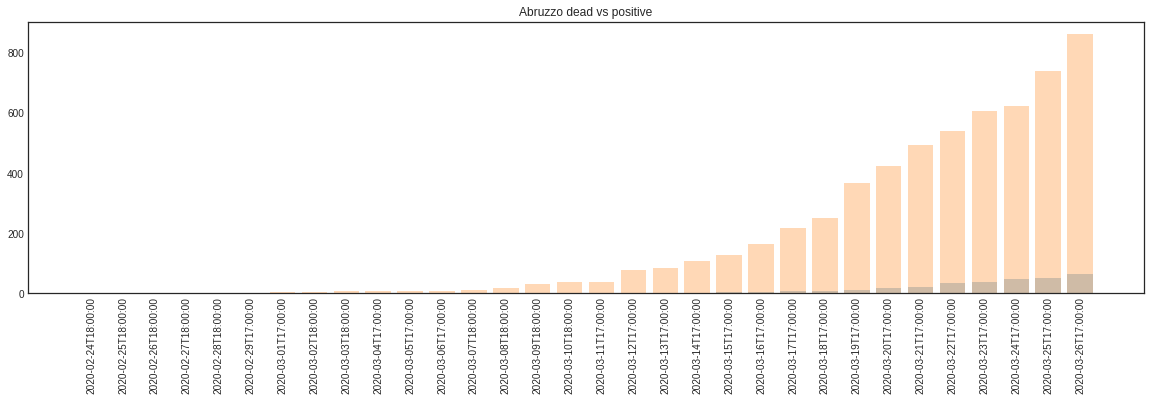

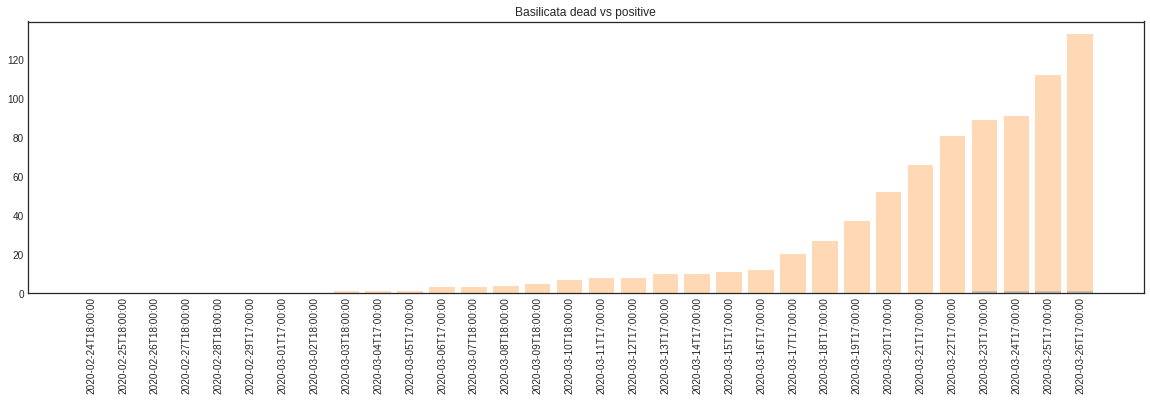

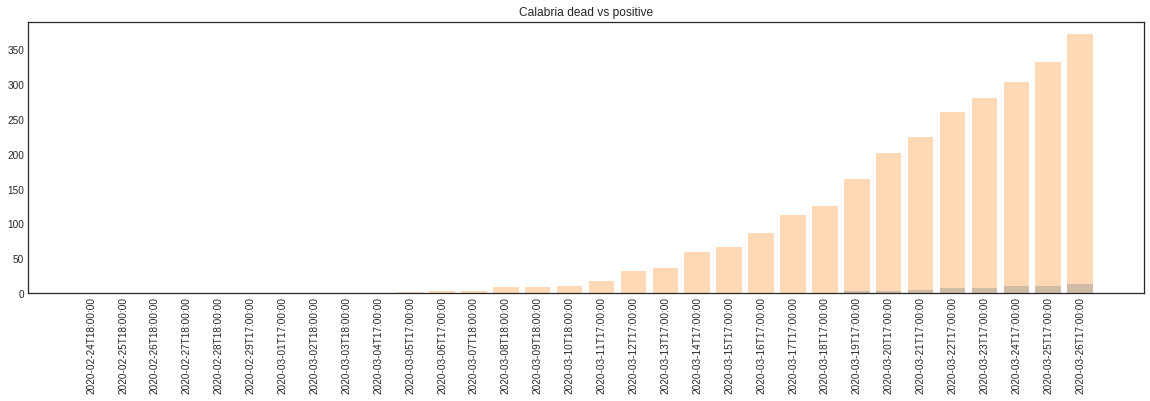

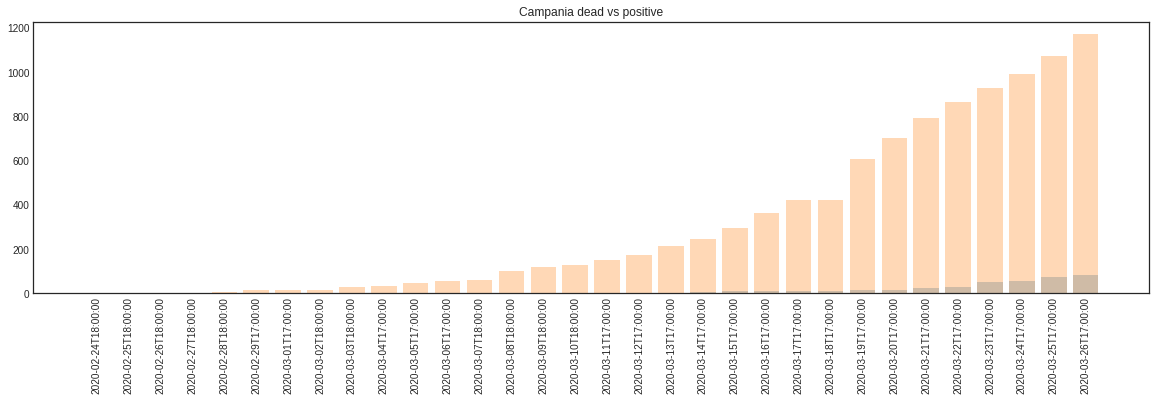

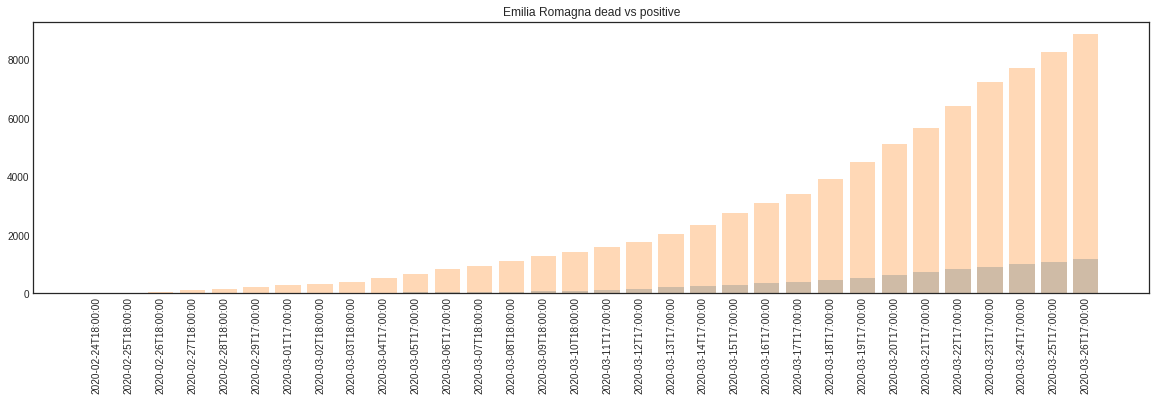

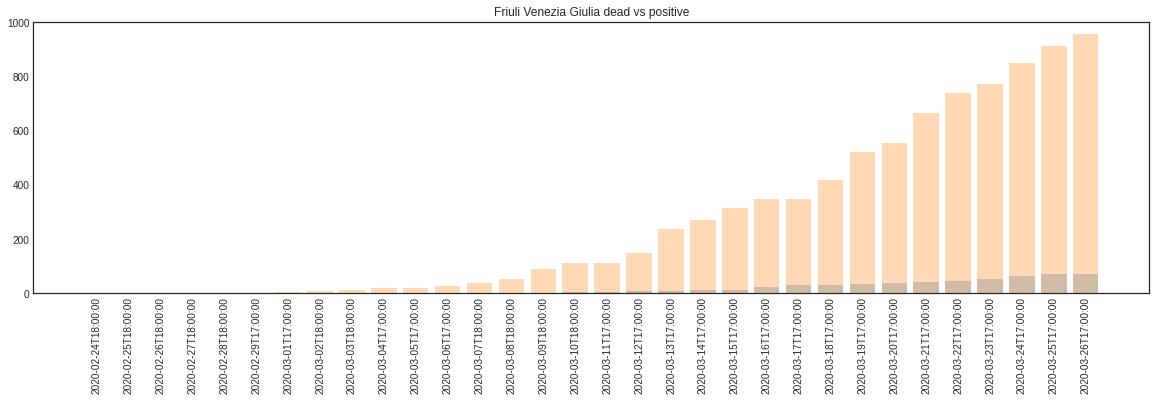

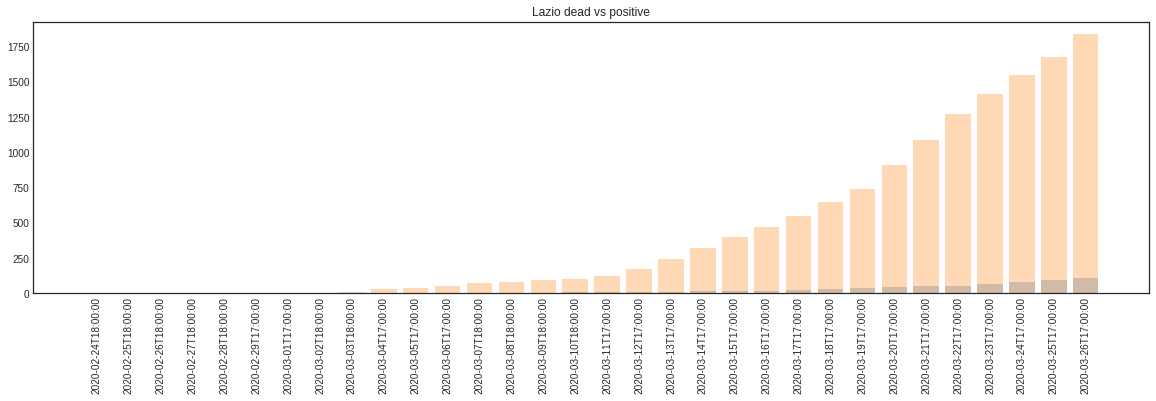

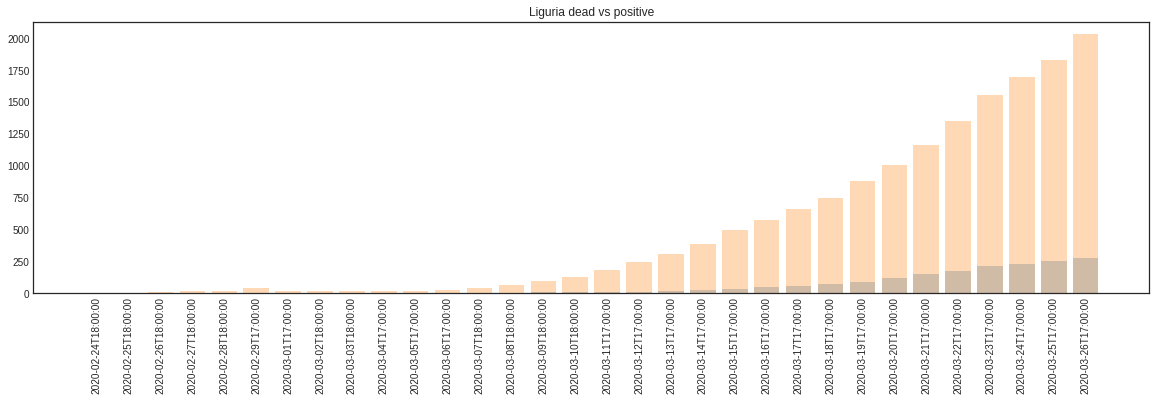

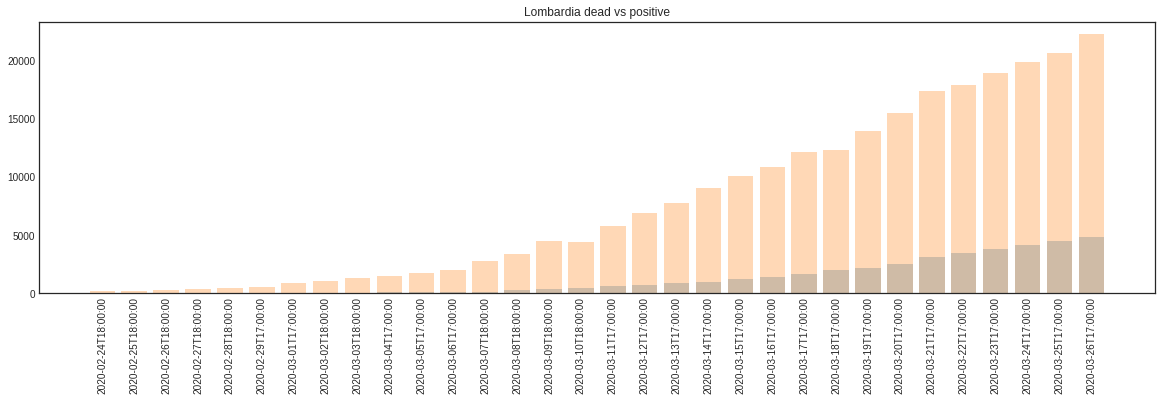

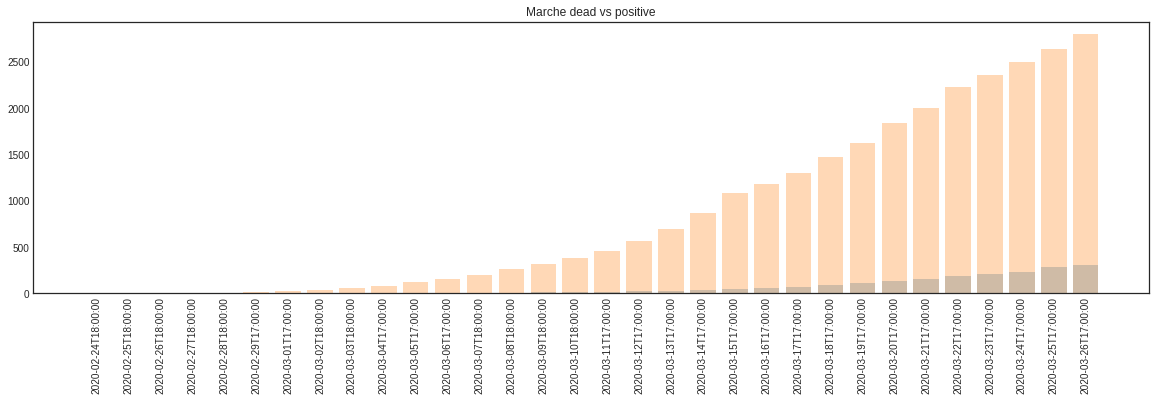

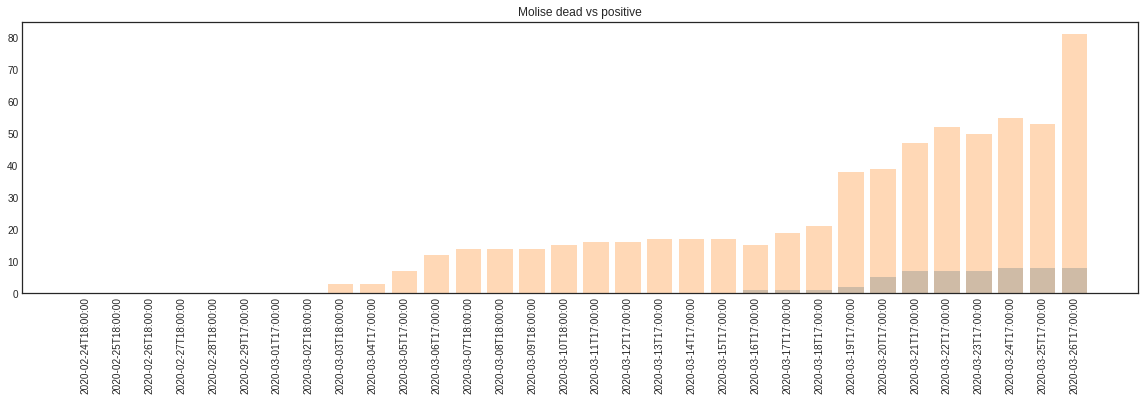

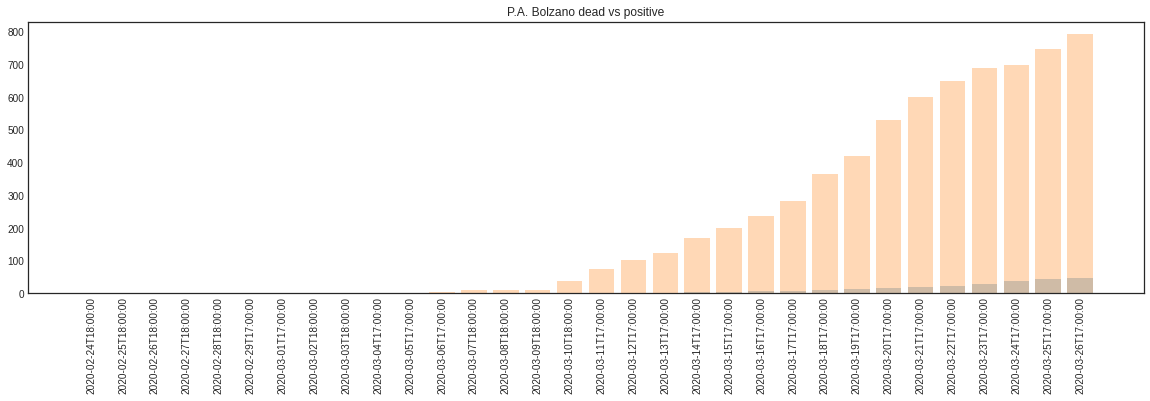

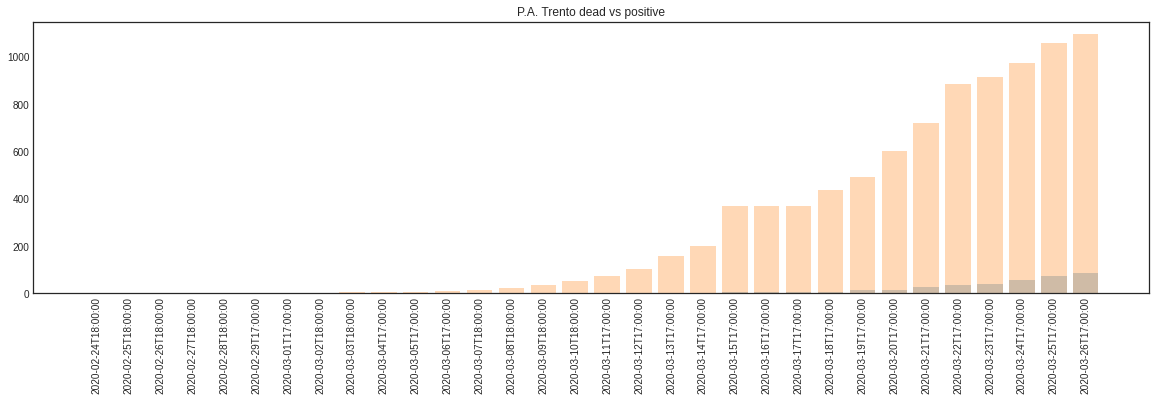

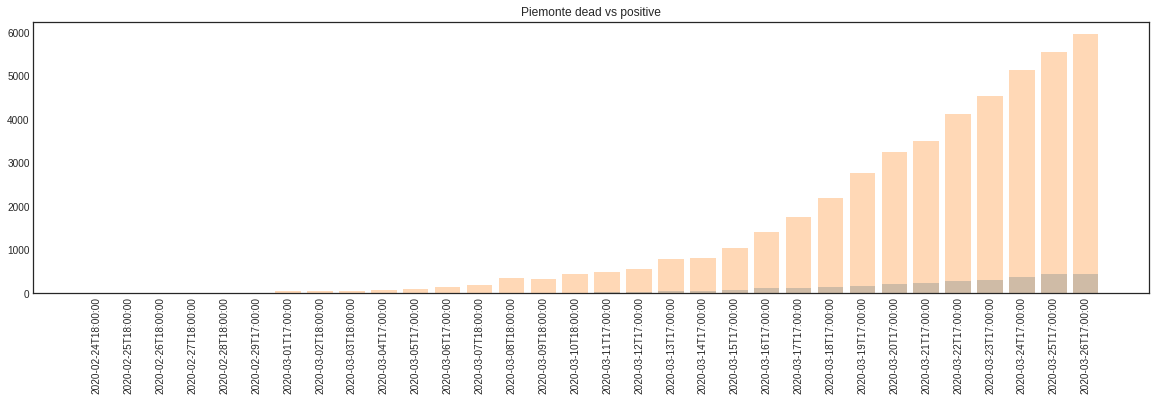

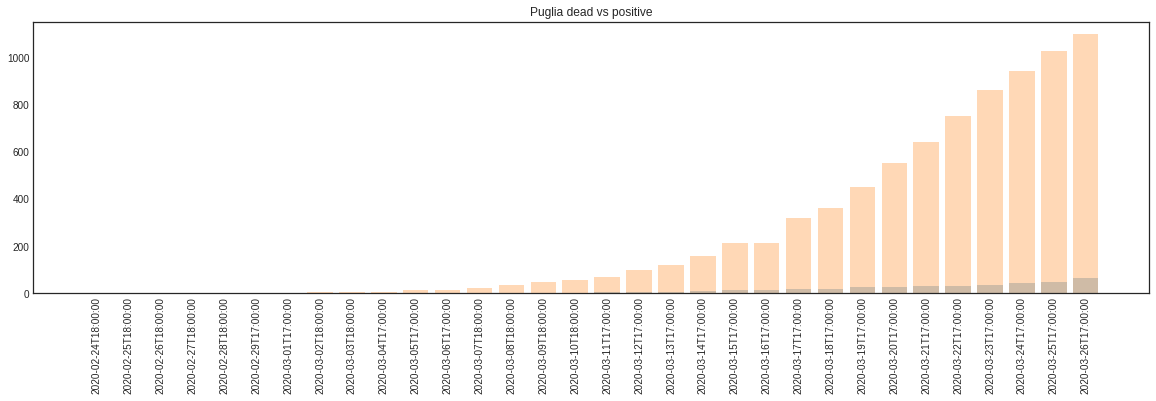

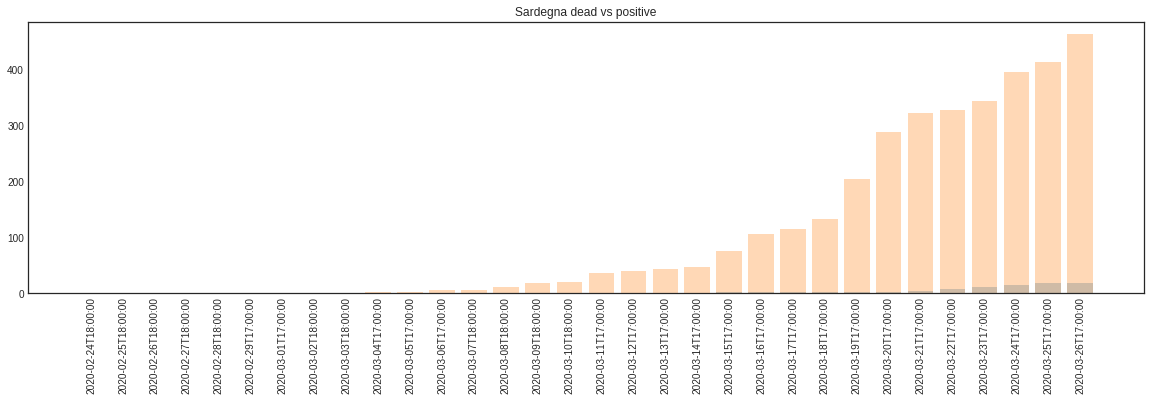

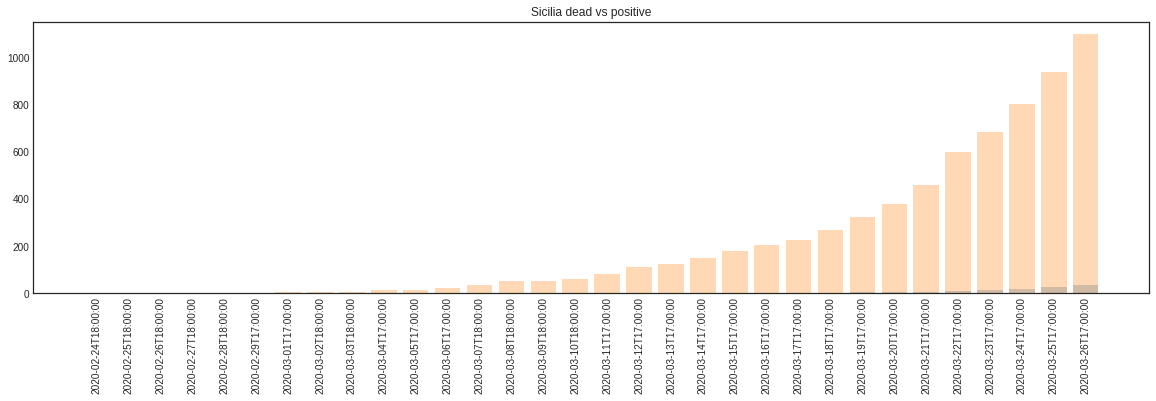

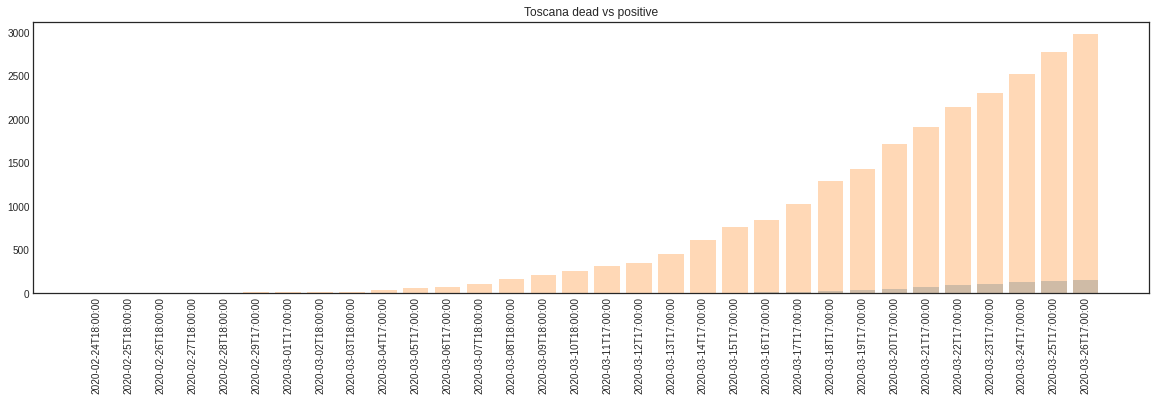

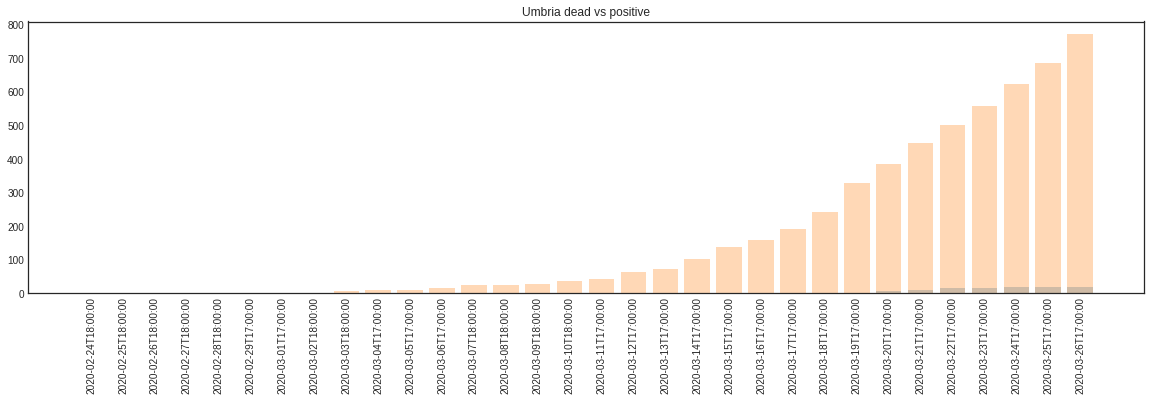

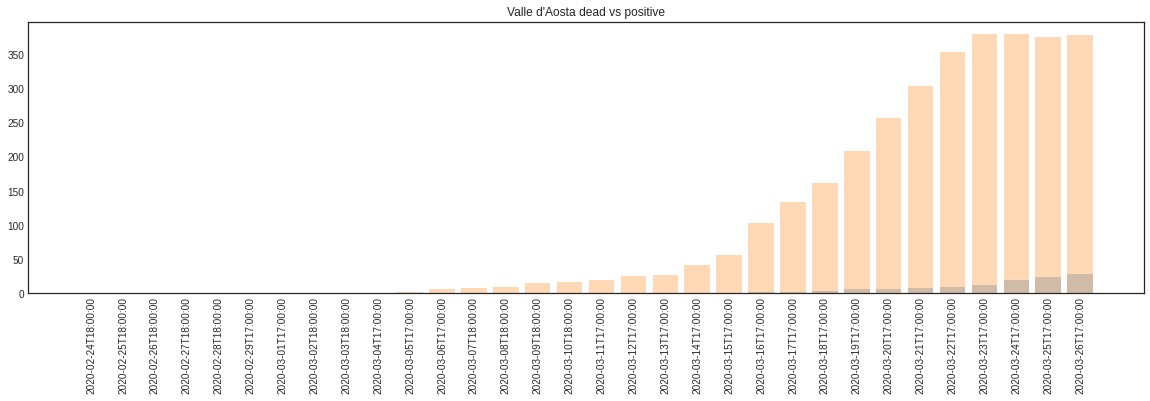

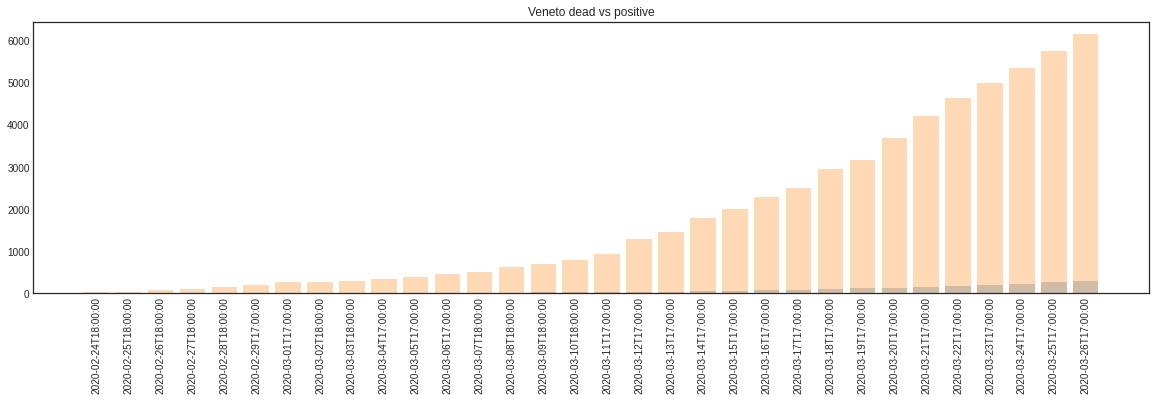

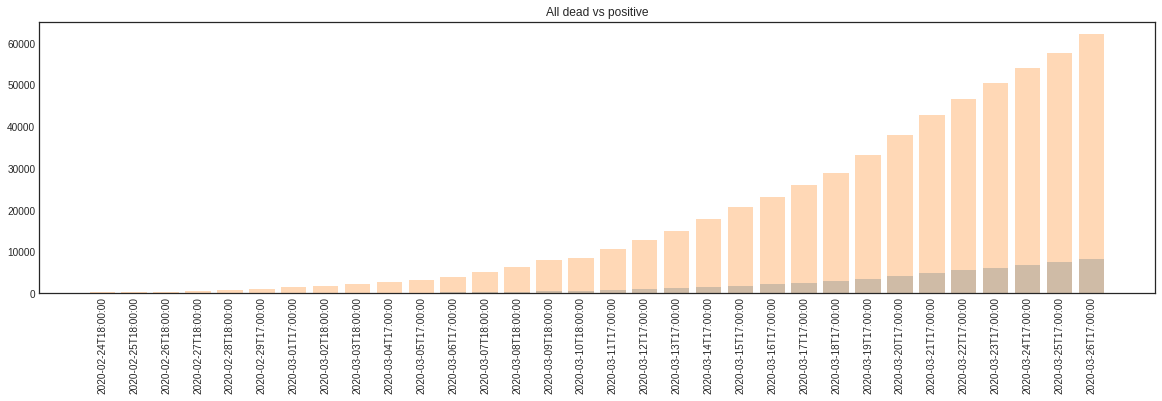

In [11]:
def dead_vs_positive(region):
    fig, ax = plt.subplots(figsize=(20, 5))
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    region_dead = italy_dead[[region]]
    region_dead.columns = ['Dead']
    plt.bar(region_dead.index, height=region_dead.Dead, label=region, alpha=0.3)
    plt.bar(region_positive.index, height=region_positive.Positive, label=region, alpha=0.3)
    plt.title(region + ' dead vs positive')
    plt.xticks(rotation='vertical');


columns = list(italy_dead)
for region in columns: 
    dead_vs_positive(region)



Da un'analisi qualitativa emerge un'accelerazione dei contagi in Abruzzo, Basilicata e Sicilia, nonchè Lombardia e Molise che sembravano ieri orientati verso una stabilizzazione, 
una tendenza alla stabilizzazione in Valle d'Aosta 
ed una progressione ancora lineare altrove ma Umbria, Sardegna, Liguria e Calabria sono sotto osservazione.

Nella seguente grafica si cambia prospettiva e viene rappresentata l'istantanea del rapporto tra deceduti e positivi su tutte le regioni, giorno per giorno


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


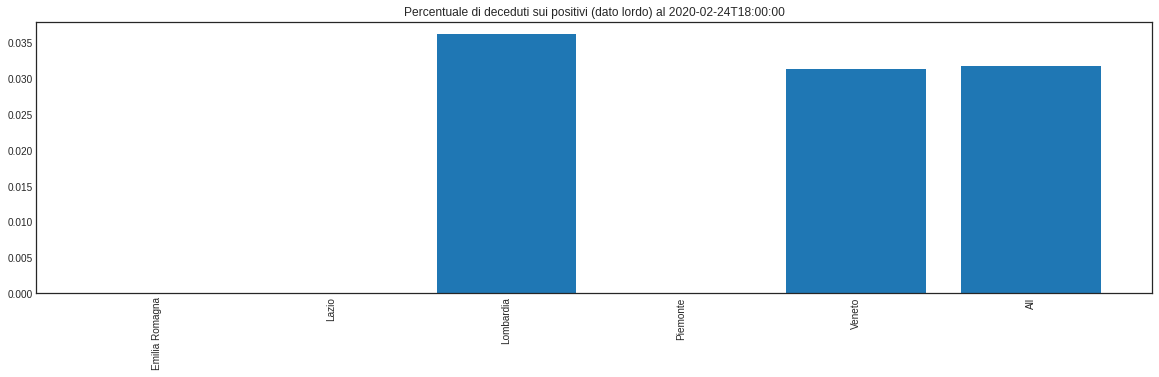

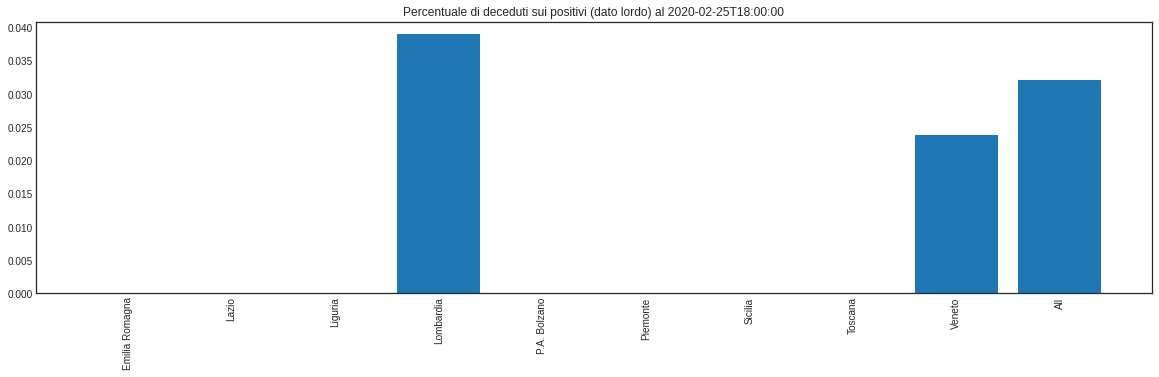

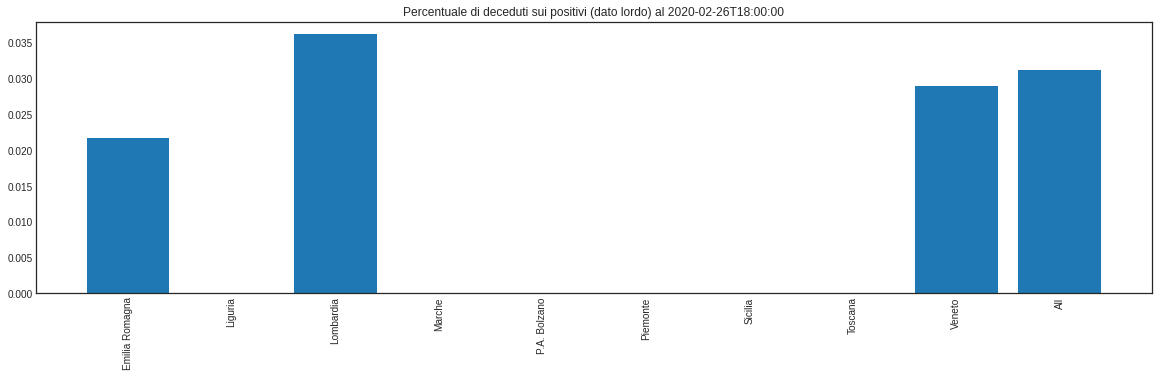

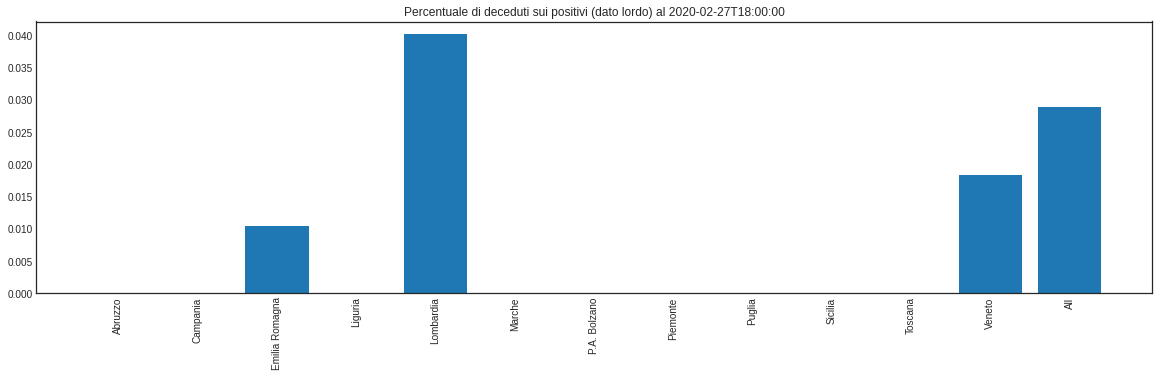

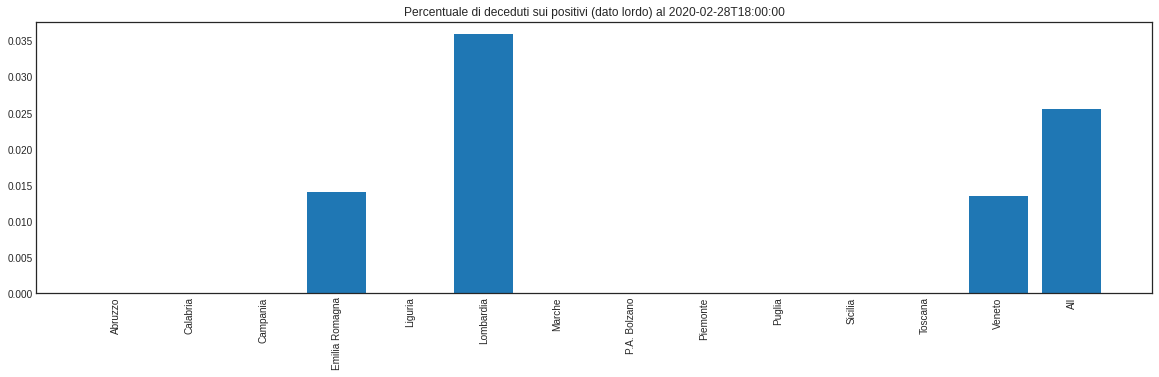

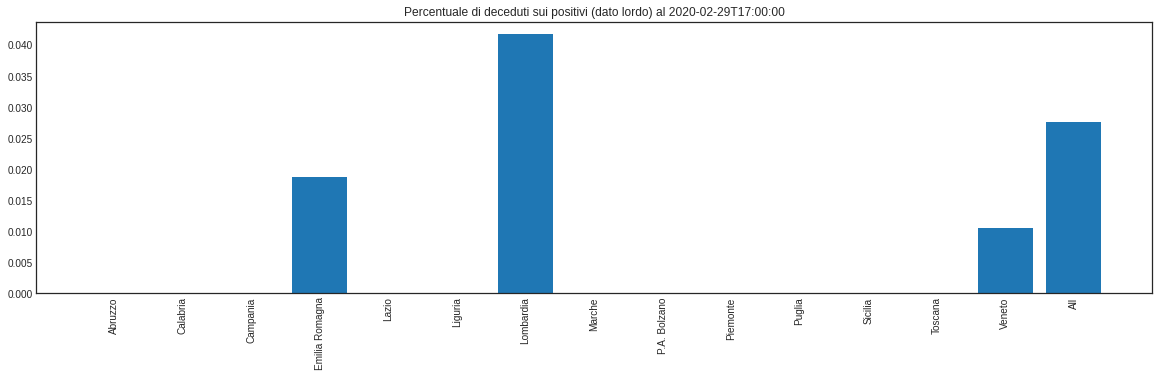

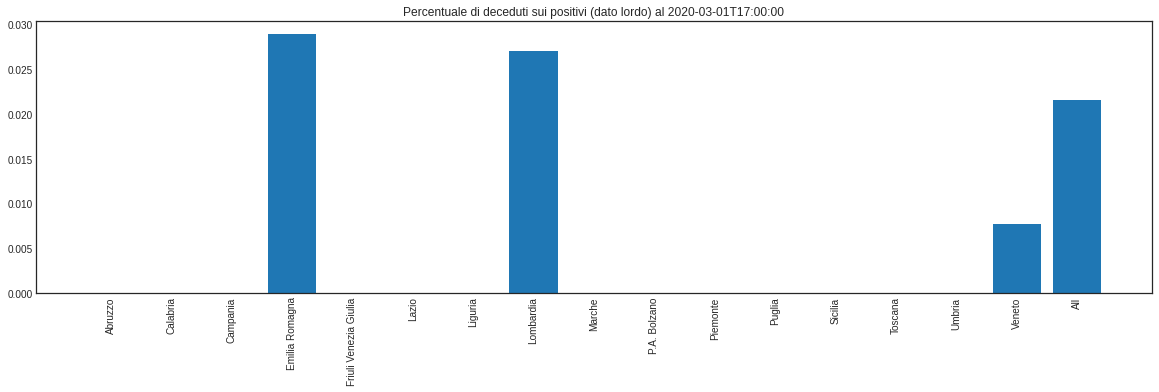

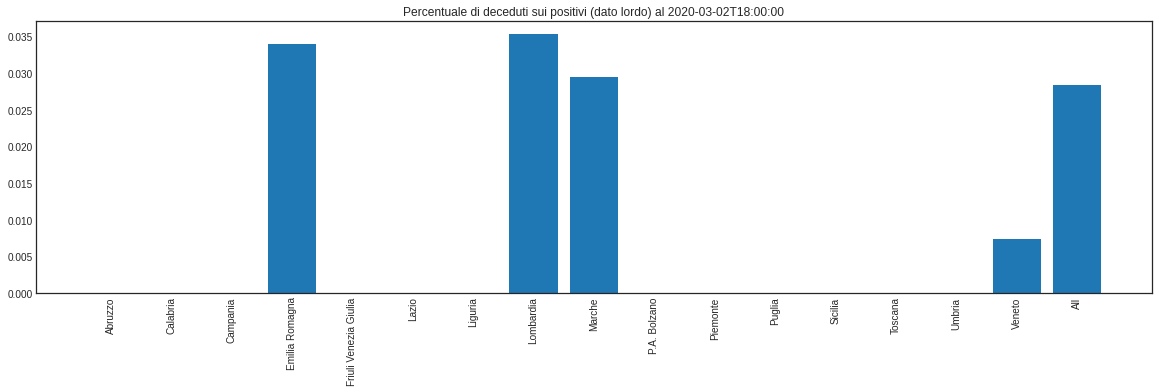

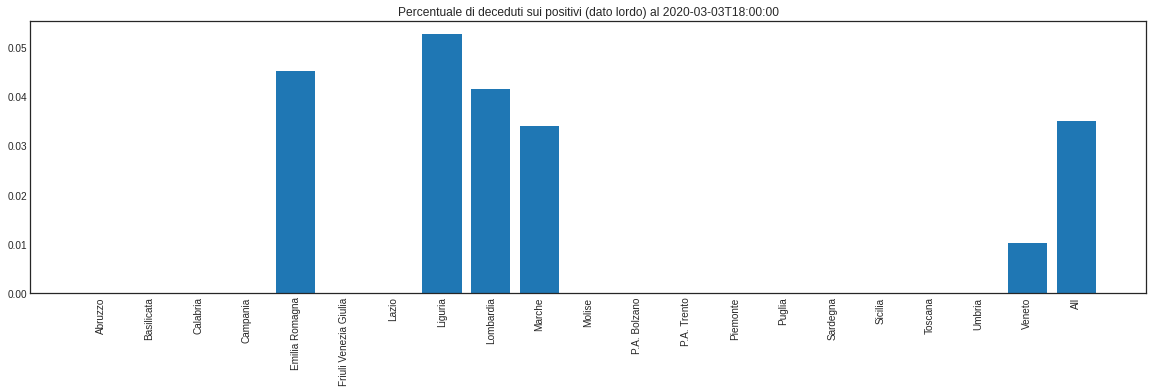

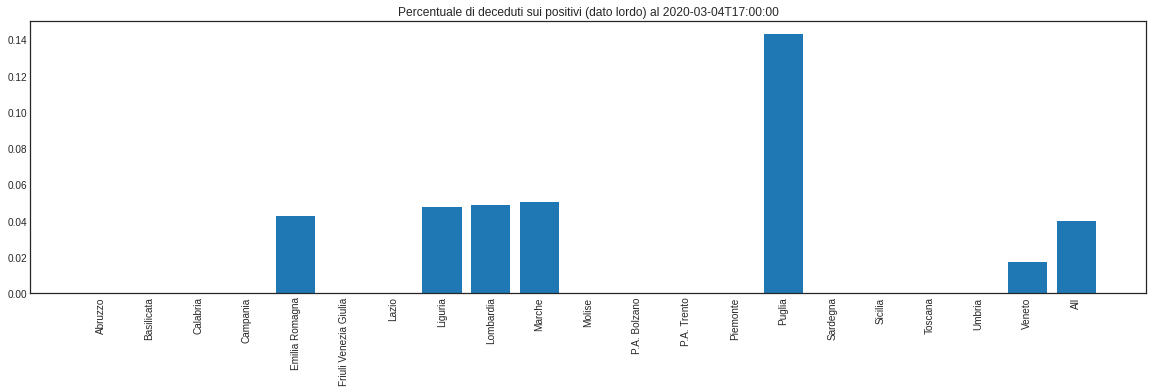

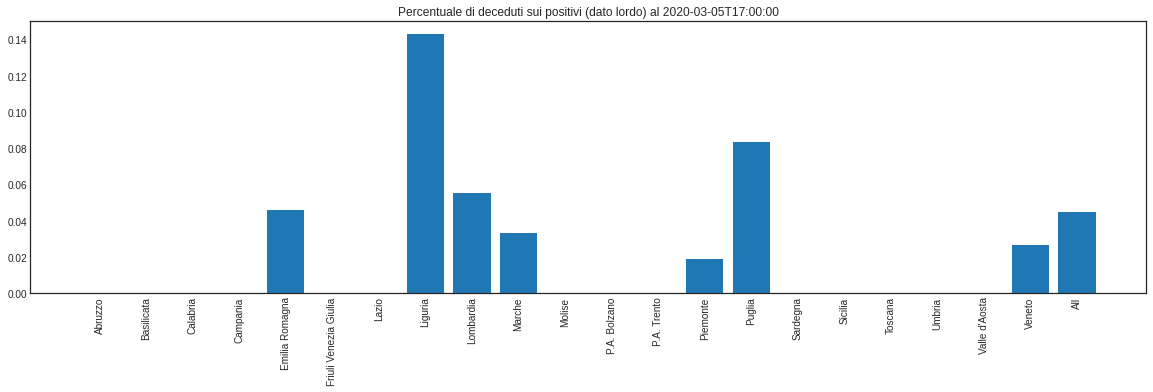

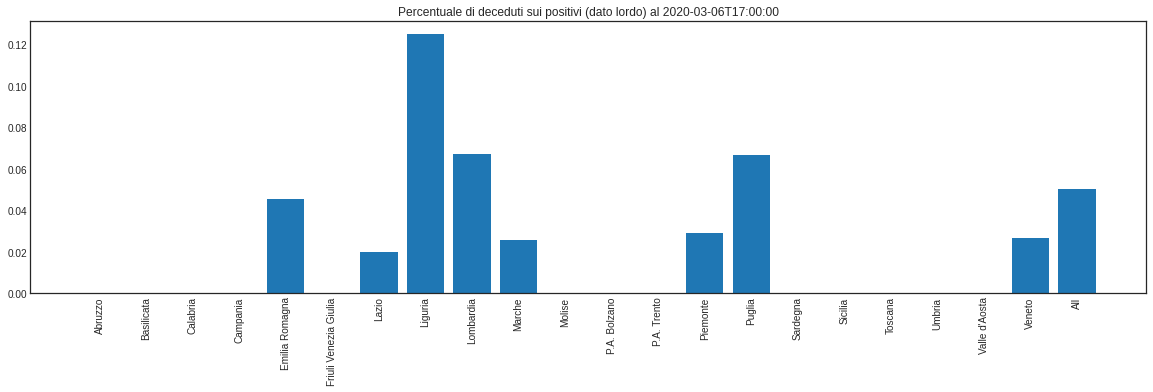

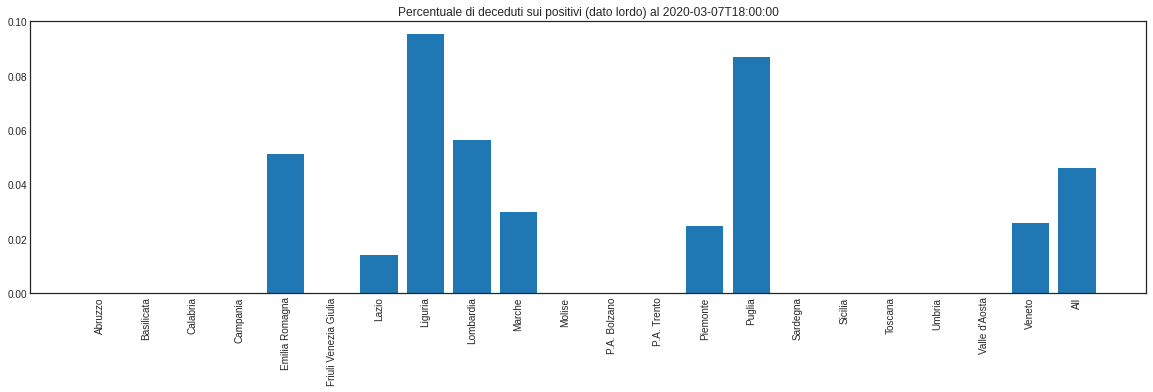

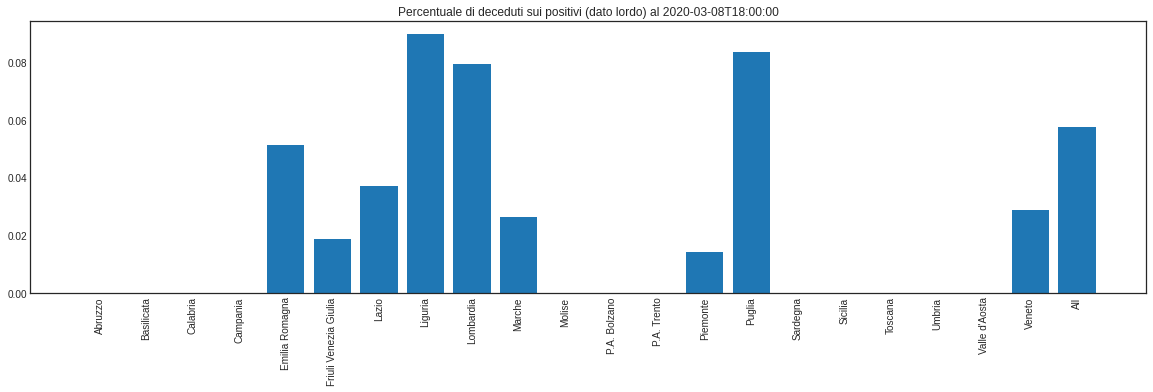

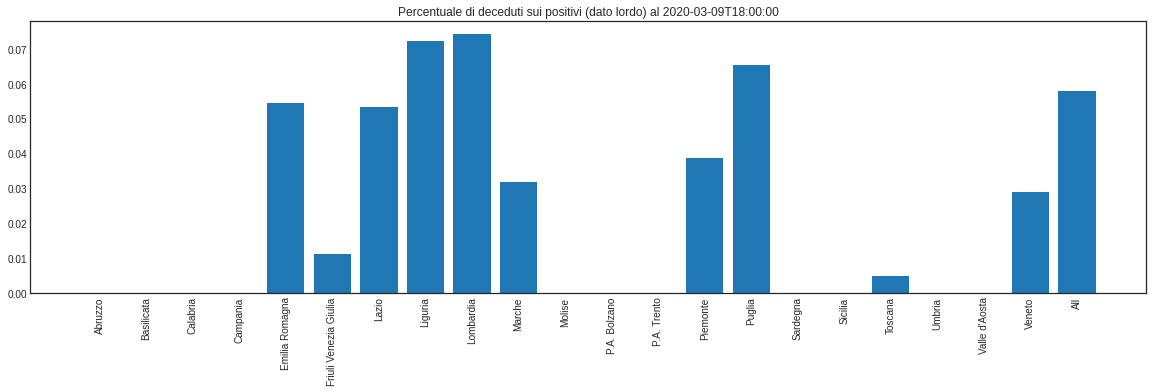

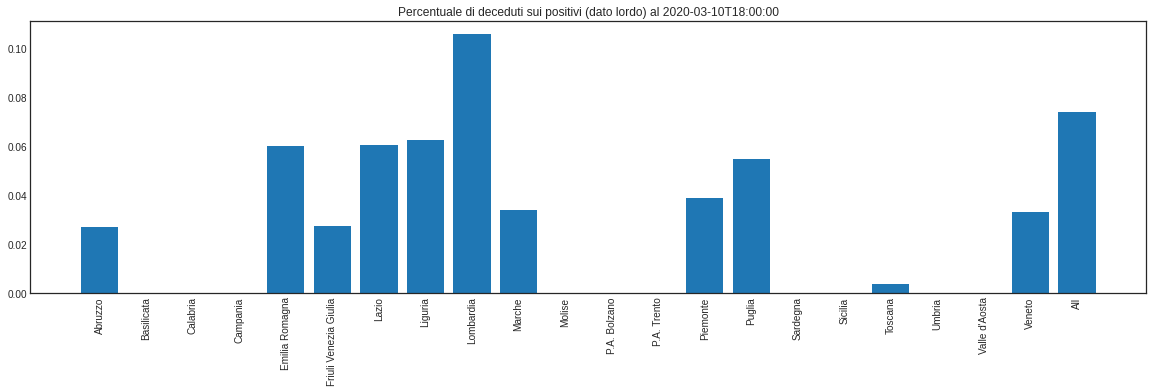

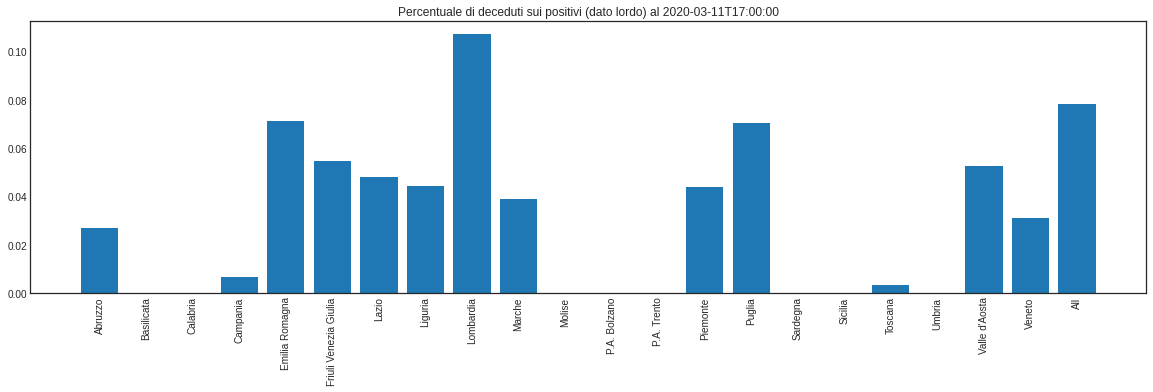

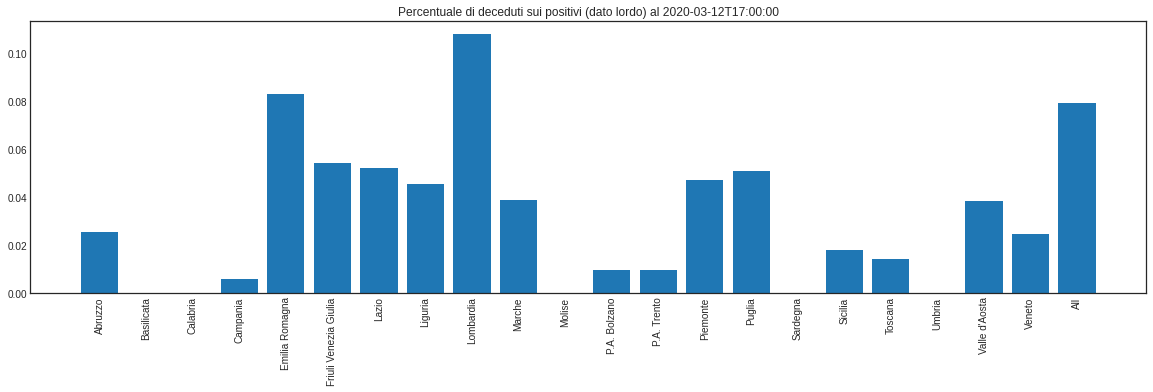

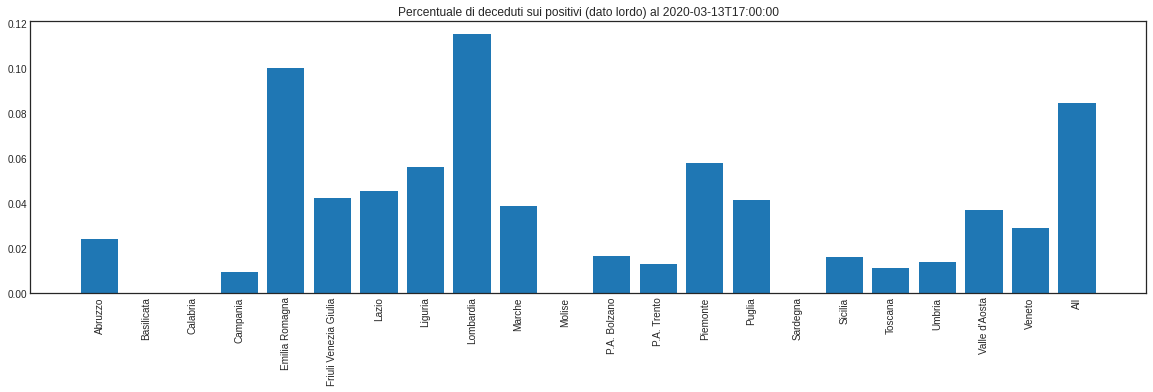

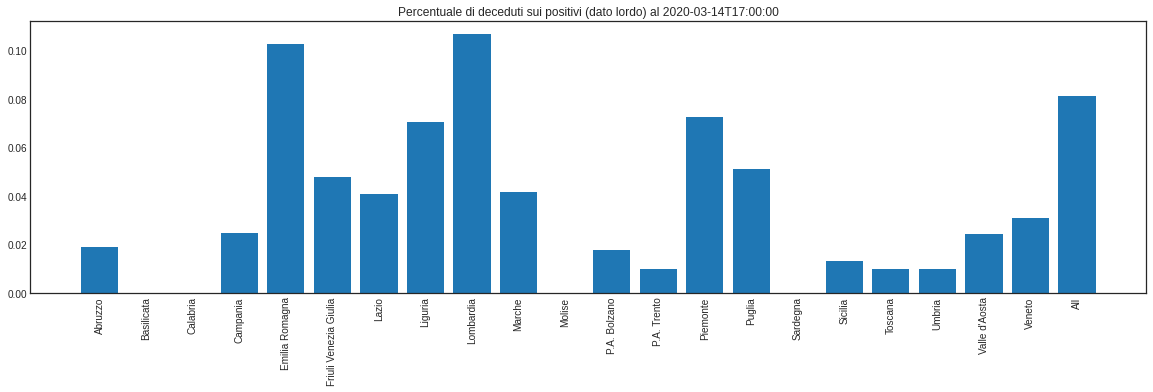

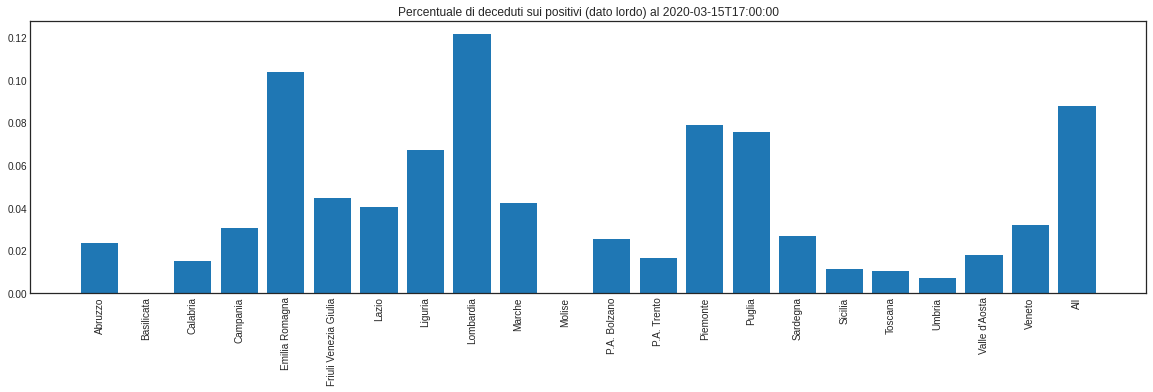

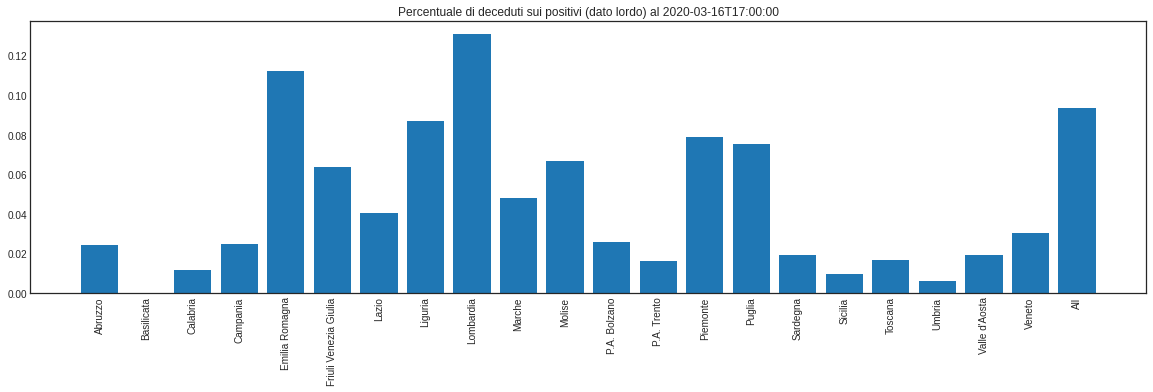

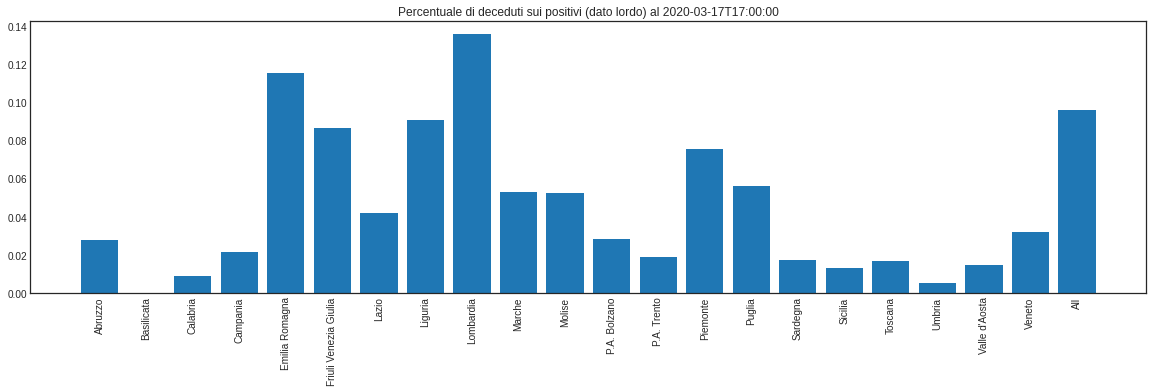

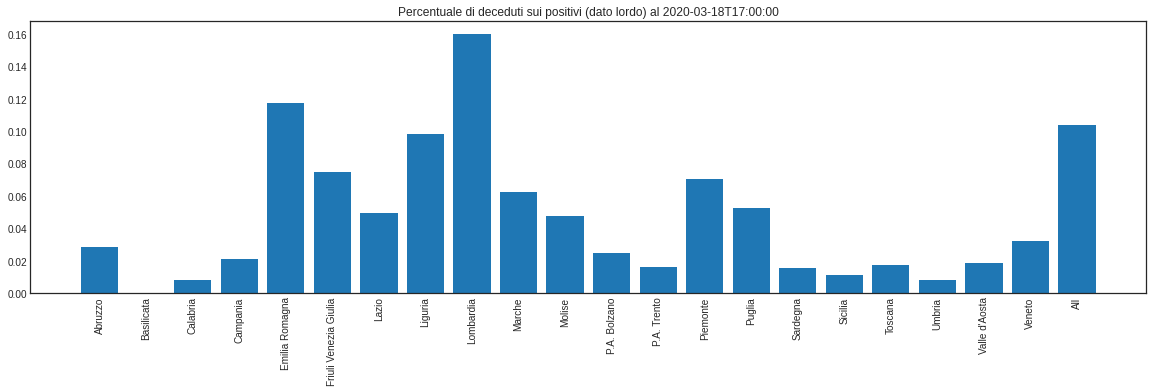

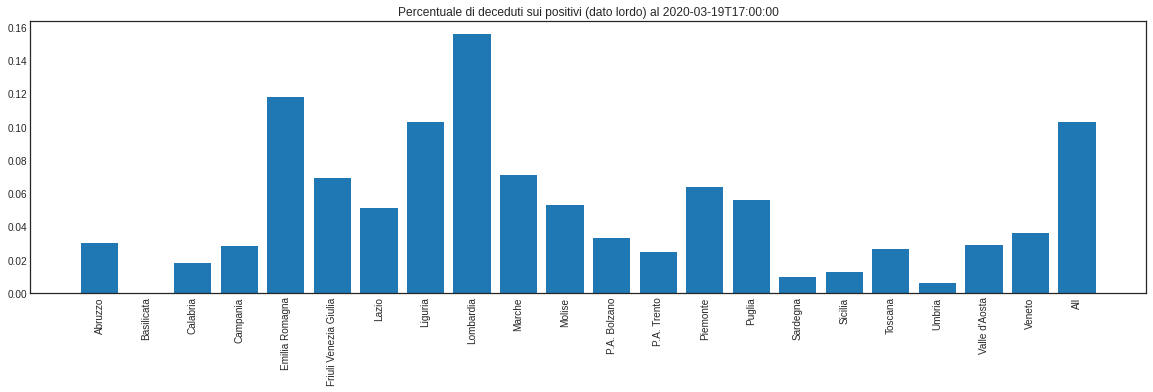

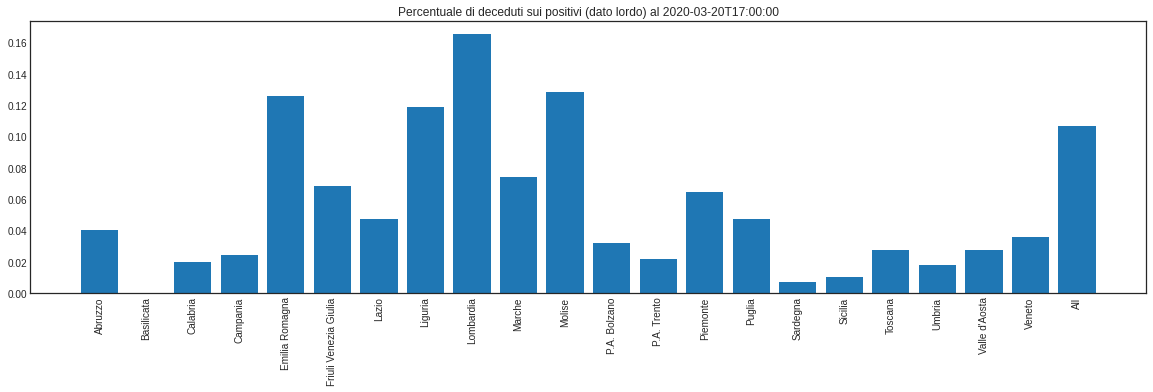

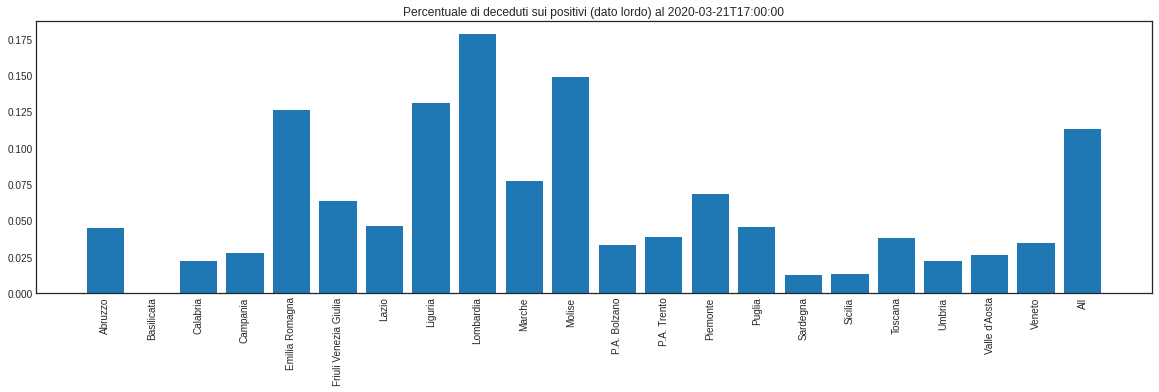

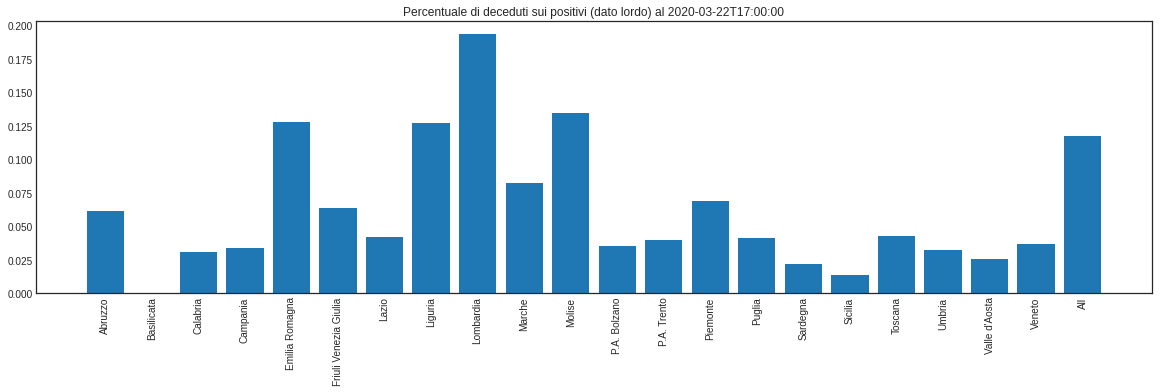

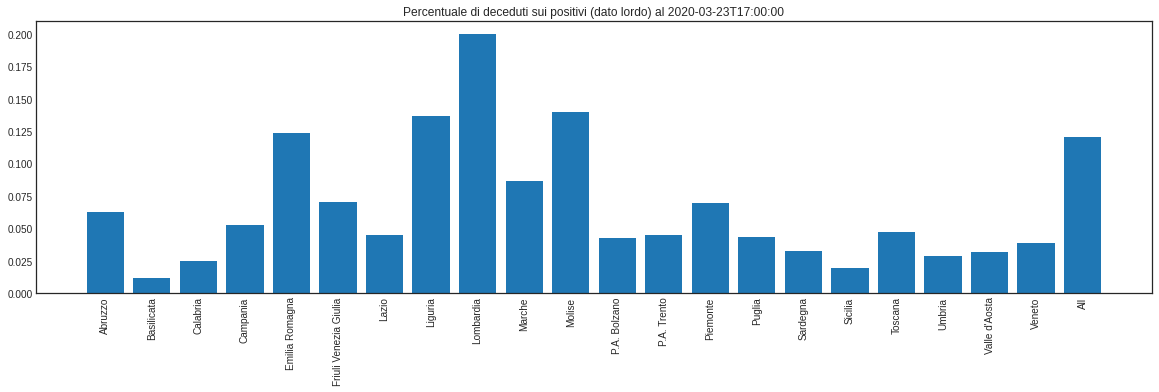

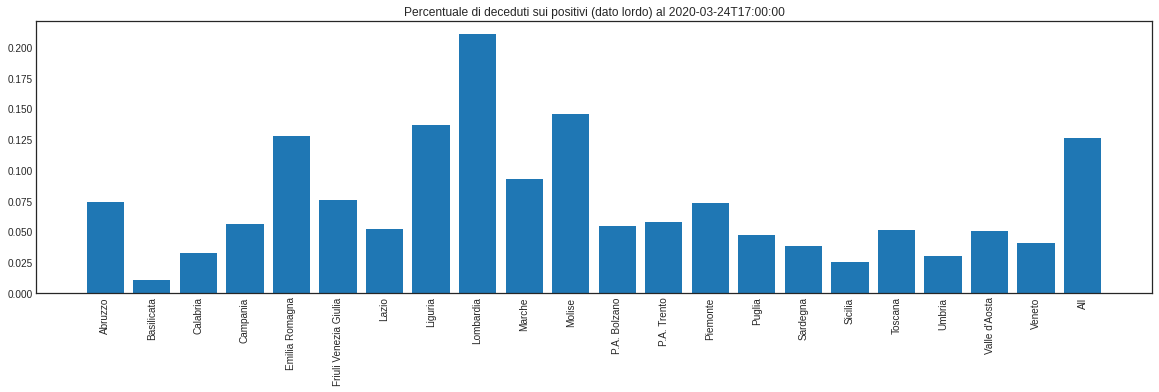

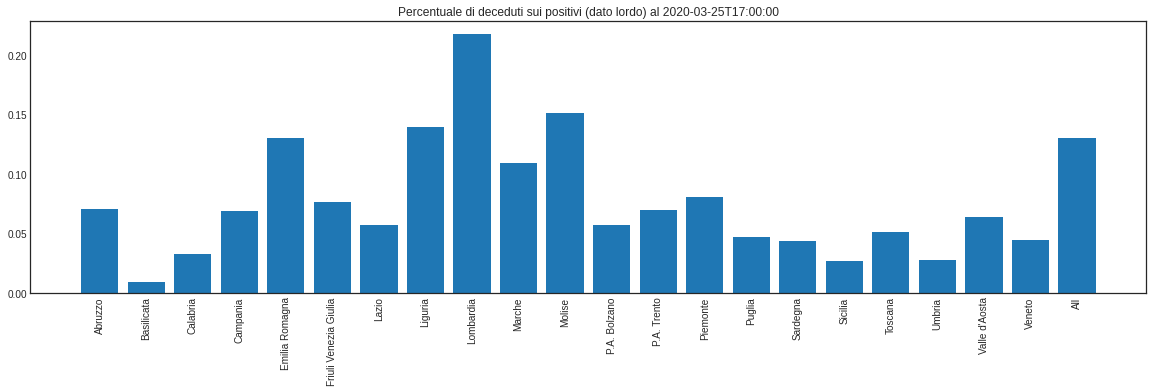

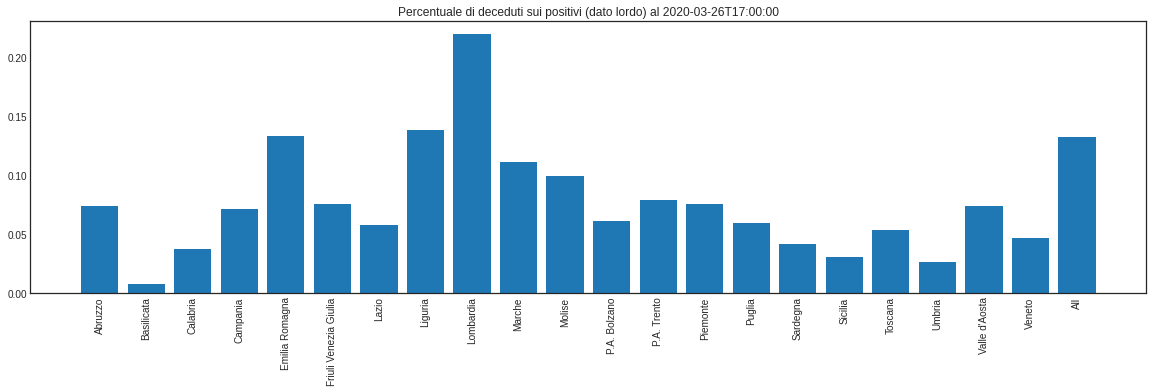

In [12]:
for day in italy_total_positive.index: 
    italy_total_positive_curr_day = italy_total_positive[italy_total_positive.index == day]
    italy_dead_curr_day = italy_dead[italy_dead.index == day]
    italy_dead_vs_total_curr_day = italy_dead_curr_day/italy_total_positive_curr_day
    italy_dead_vs_total_curr_day_stacked = italy_dead_vs_total_curr_day.stack()
    italy_dead_vs_total_curr_day = italy_dead_vs_total_curr_day_stacked.unstack(level=0)
    italy_dead_vs_total_curr_day.columns = ['Dead_percentage']
    fig, ax = plt.subplots(figsize=(20,5))
    plt.xticks(rotation='vertical')
    plt.bar(italy_dead_vs_total_curr_day.index, height=italy_dead_vs_total_curr_day.Dead_percentage)
    plt.title('Percentuale di deceduti sui positivi (dato lordo) al ' + day);



Fino all'8/3 il triste primato è della Liguria, tallonata dalla Puglia. Successivamente, come noto, è la Lombardia a soffrire il più alto tasso di deceduti, seguita a distanza da Emilia Romagna e, ancora, Liguria. 

Ma vediamo di seguito la dinamica del fenomeno nel tempo per ogni regione

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


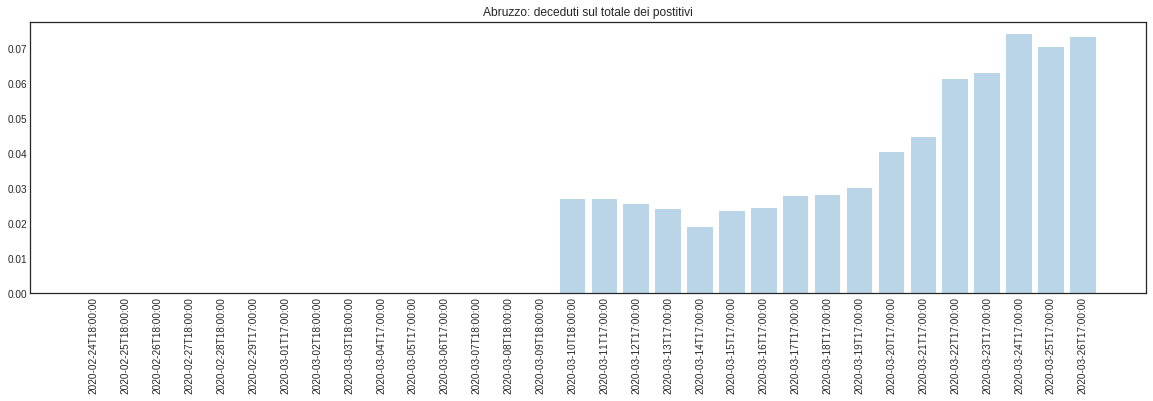

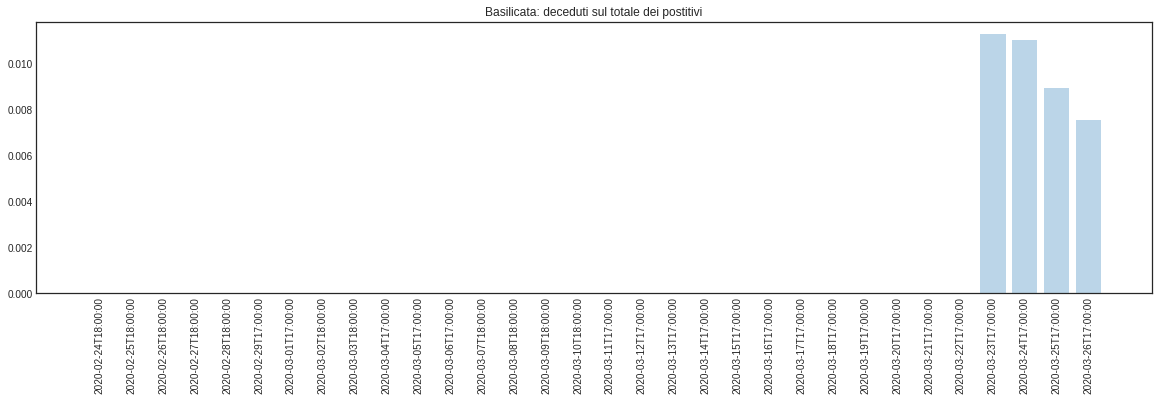

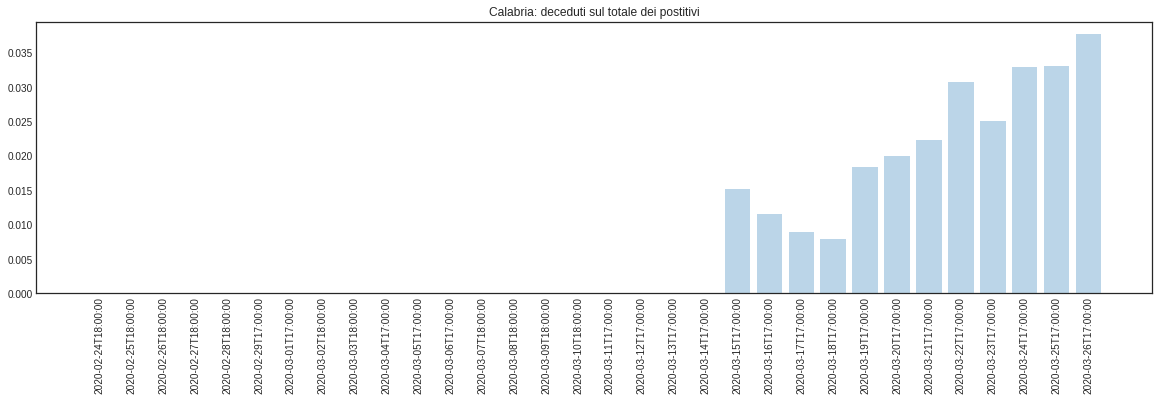

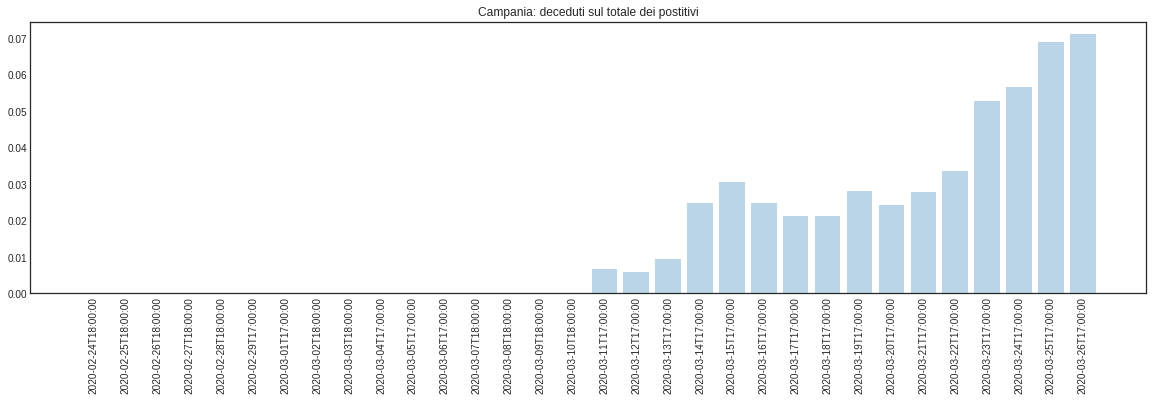

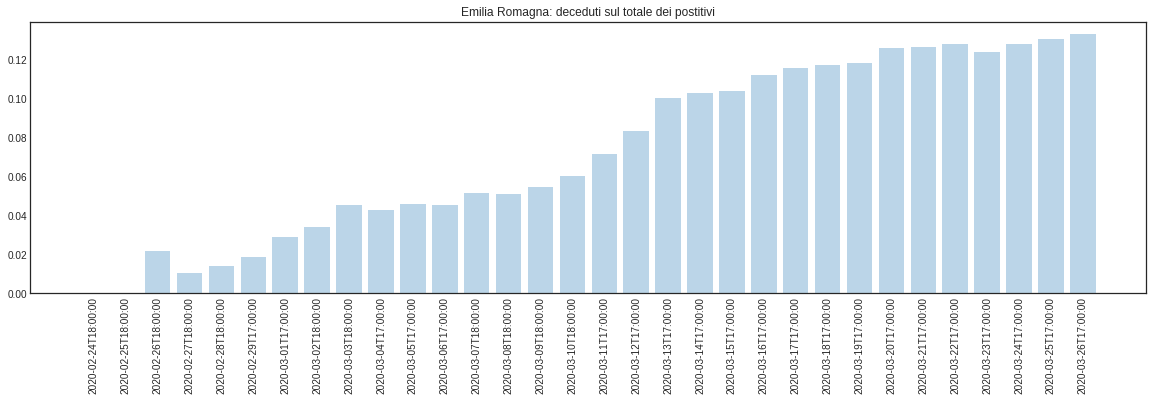

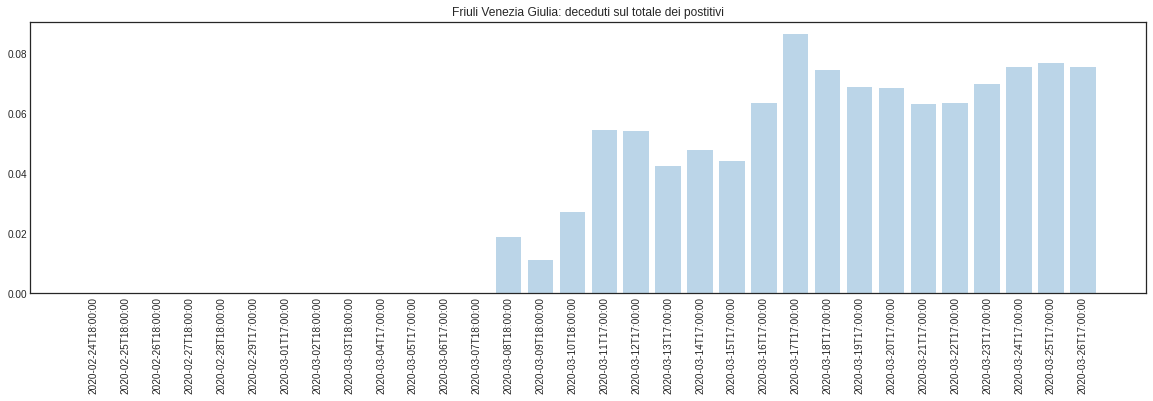

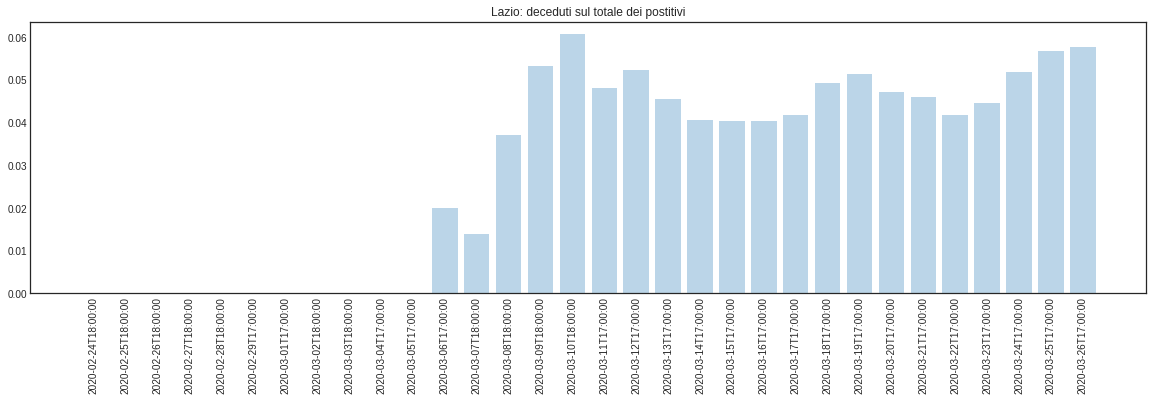

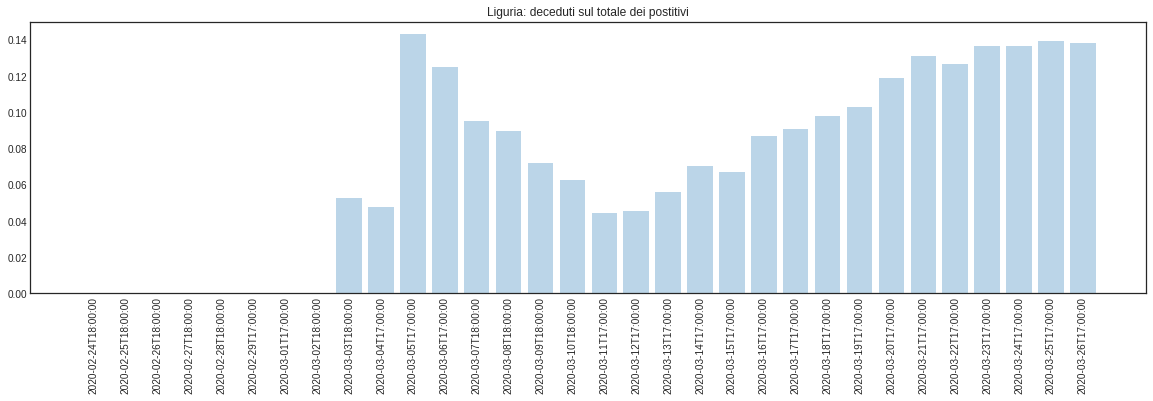

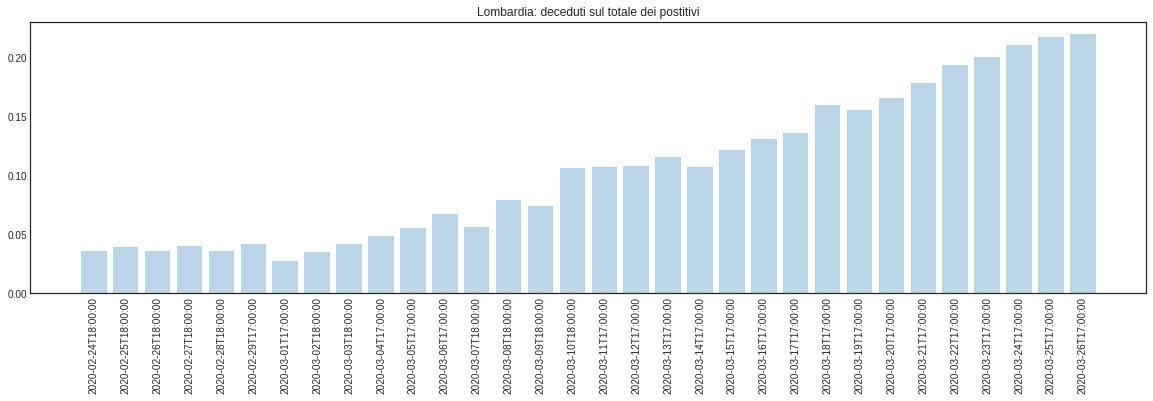

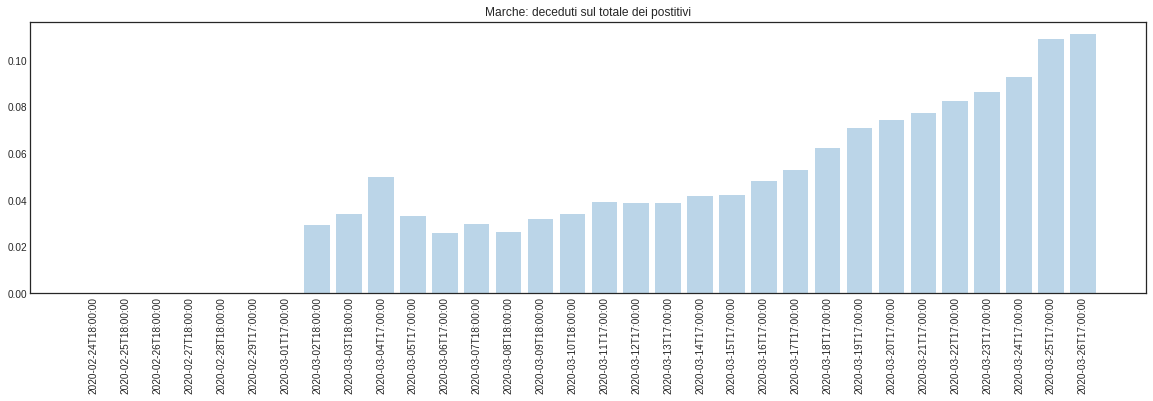

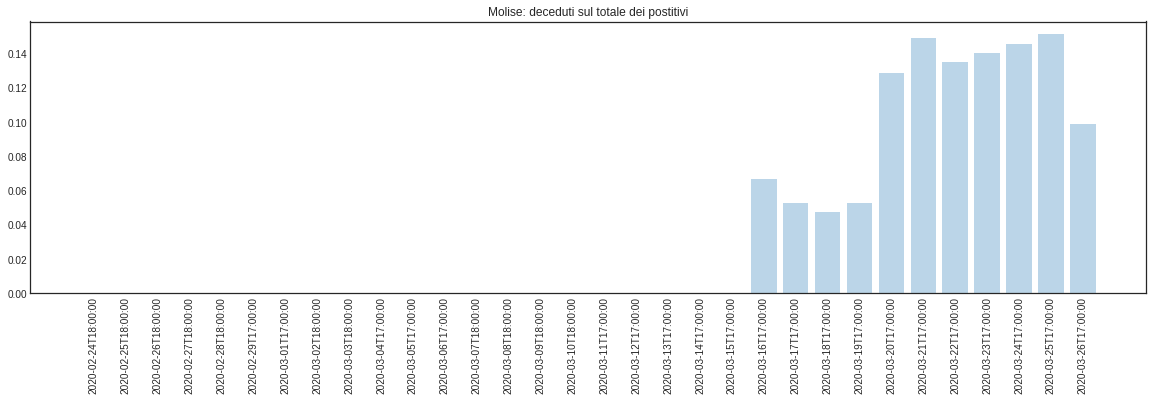

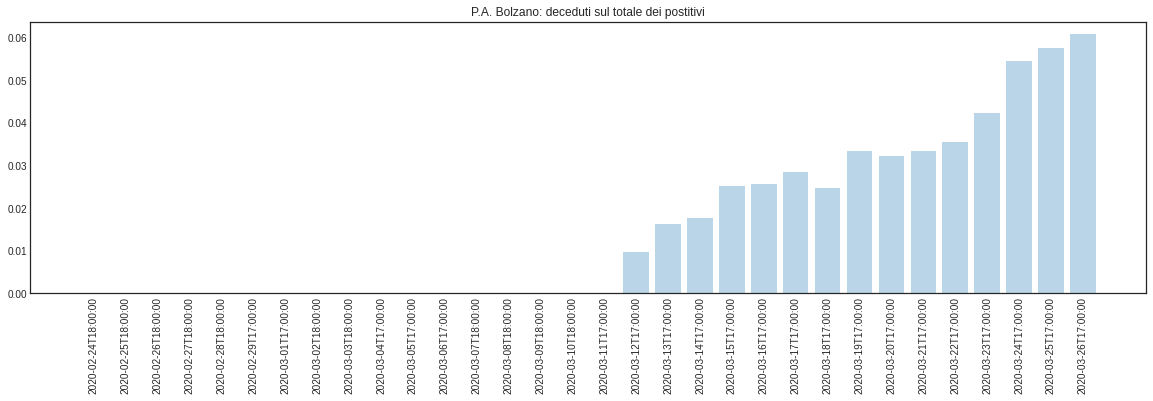

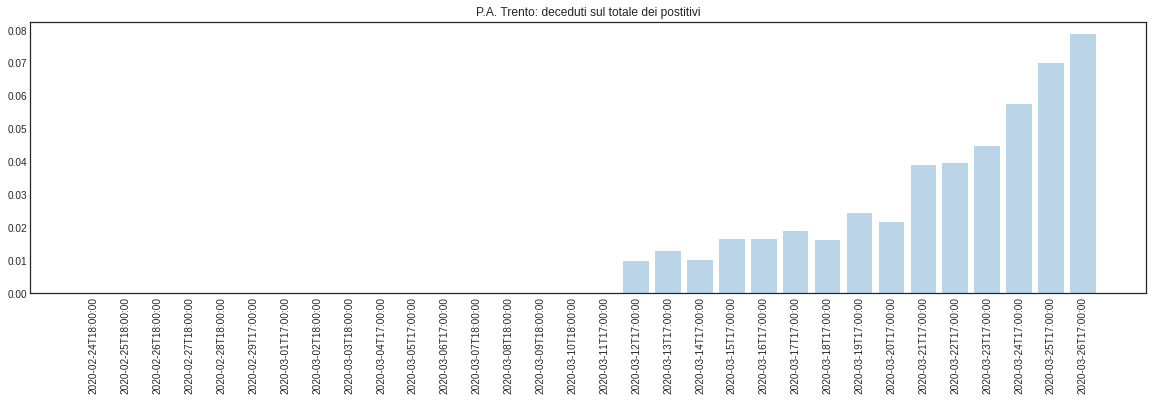

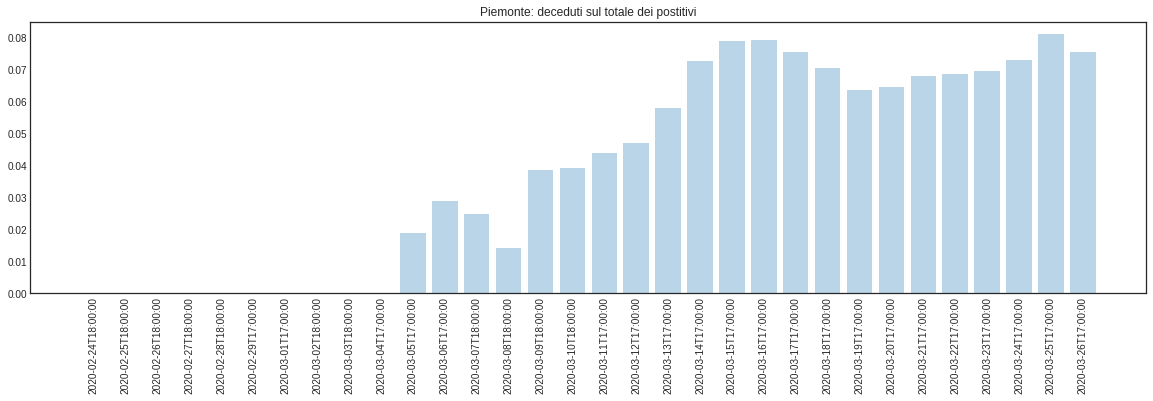

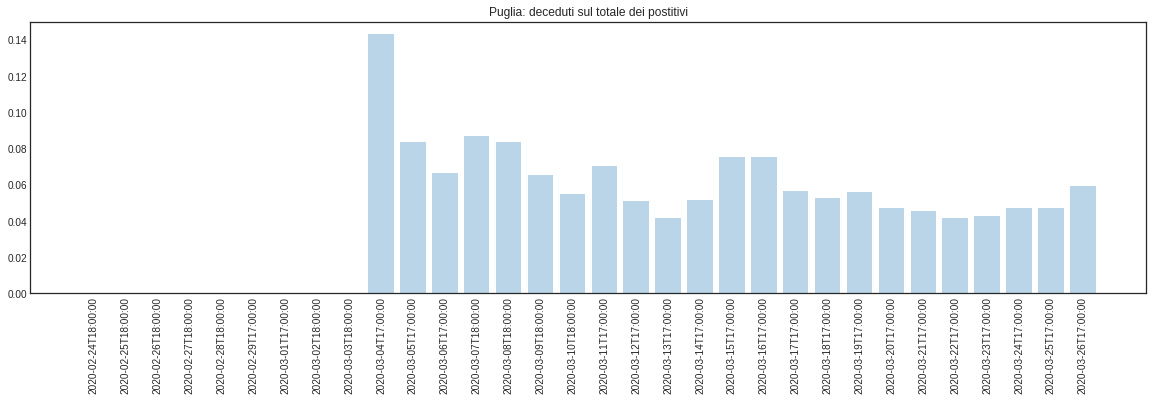

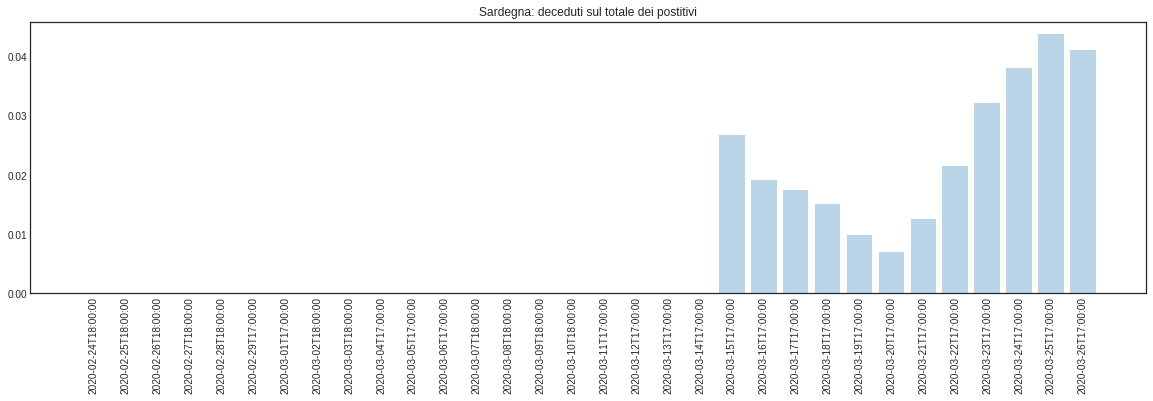

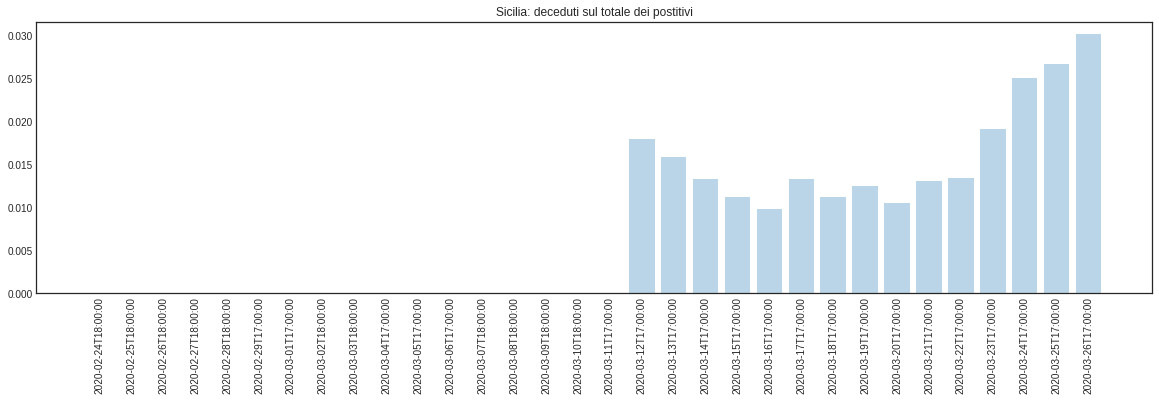

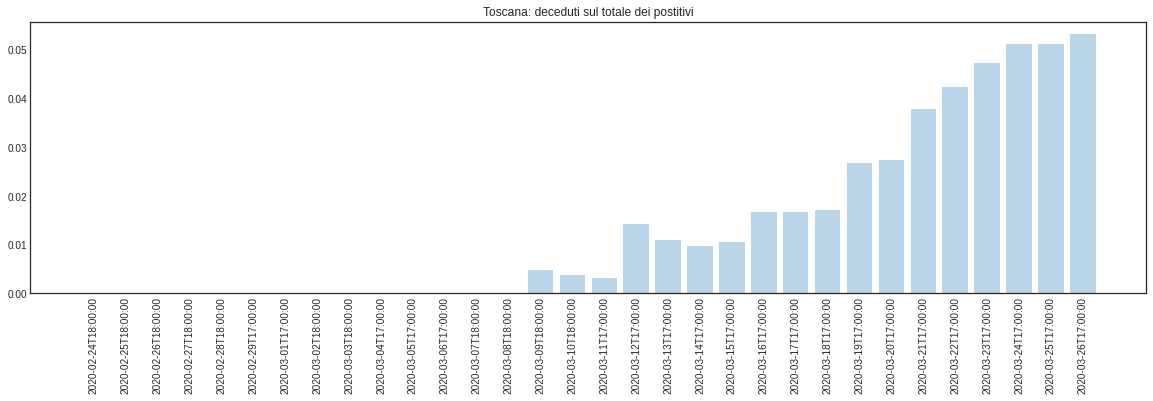

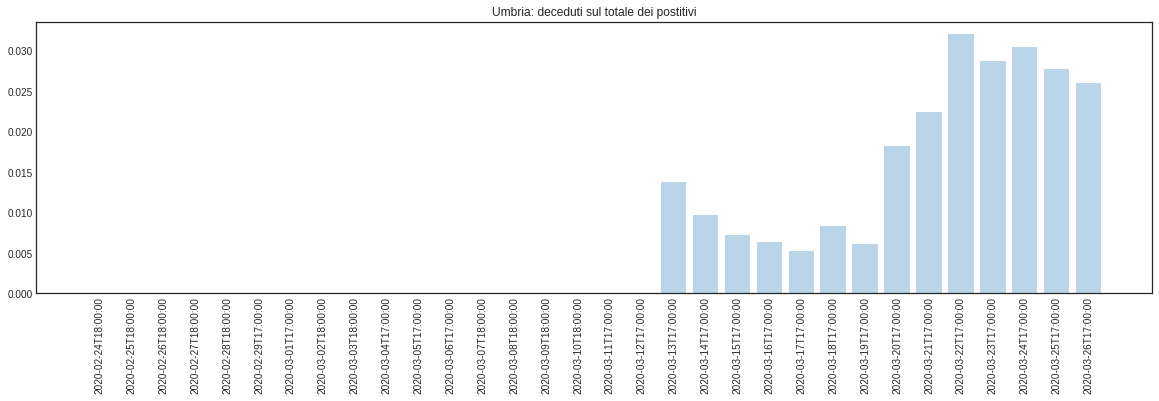

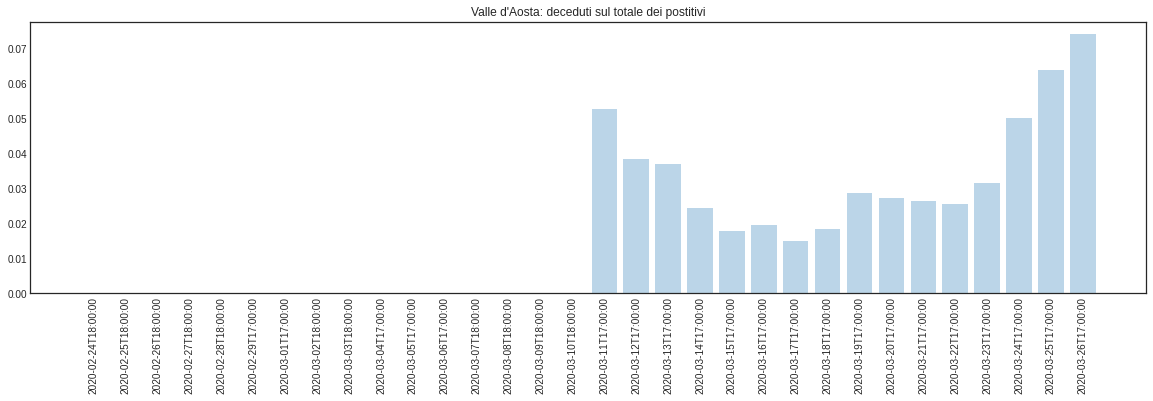

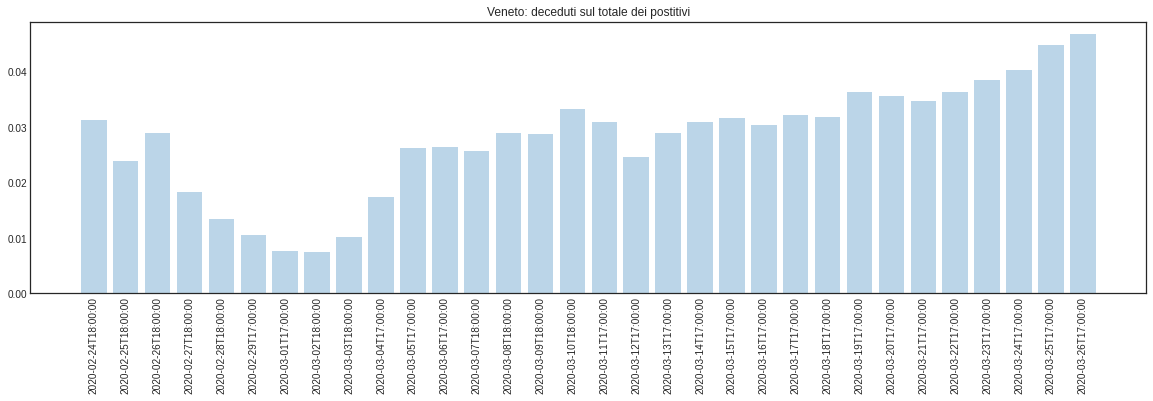

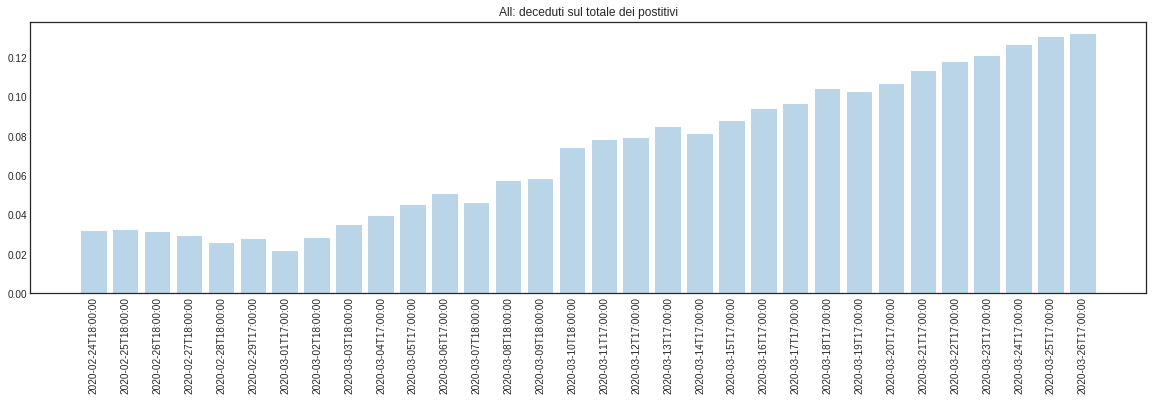

In [13]:
def dead_vs_total(regione):
    fig, ax = plt.subplots(figsize=(20, 5))
    regione_dead_vs_total = italy_dead_vs_total[[regione]]
    regione_dead_vs_total.columns = ['dead_vs_total']
    plt.bar(regione_dead_vs_total.index, height=regione_dead_vs_total.dead_vs_total, label=regione, alpha=0.3)
    plt.title(regione + ': deceduti sul totale dei postitivi')
    plt.xticks(rotation='vertical');


columns = list(italy_dead)
for regione in columns: 
    dead_vs_total(regione)


Il fenomeno sembra in ascesa in Campania, Marche, Trentino Alto Adige, Sardegna, Sicilia, Veneto e Valle d'Aosta. 

Sembra invece stazionario o in via di saturazione nelle altre regioni.

**Adesso si ripropongono più o meno le stesse analisi ma con i dati normalizzati in base alla popolazione**

In [0]:
#source: https://www.tuttitalia.it/regioni/
population_density = pd.DataFrame([
              {'denominazione_regione': 'Abruzzo', 'density': 121, 'population': 1311580}, 
              {'denominazione_regione': 'Basilicata', 'density': 56, 'population': 562869}, 
              {'denominazione_regione': 'Calabria', 'density': 128, 'population': 1947131}, 
              {'denominazione_regione': 'Campania', 'density': 424, 'population': 5801692}, 
              {'denominazione_regione': 'Emilia Romagna', 'density': 199, 'population': 4459477}, 
              {'denominazione_regione': 'Friuli Venezia Giulia', 'density': 153, 'population': 1215220}, 
              {'denominazione_regione': 'Lazio', 'density': 341, 'population': 5879082}, 
              {'denominazione_regione': 'Liguria', 'density': 286, 'population': 1550640}, 
              {'denominazione_regione': 'Lombardia', 'density': 422, 'population': 10060574}, 
              {'denominazione_regione': 'Marche', 'density': 162, 'population': 1525271}, 
              {'denominazione_regione': 'Molise', 'density': 69, 'population': 305617}, 
              {'denominazione_regione': 'P.A. Bolzano', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'P.A. Trento', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'Piemonte', 'density': 172, 'population': 4356406}, 
              {'denominazione_regione': 'Puglia', 'density': 206, 'population': 4029053}, 
              {'denominazione_regione': 'Sardegna', 'density': 68, 'population': 1639591}, 
              {'denominazione_regione': 'Sicilia', 'density': 194, 'population': 4999891}, 
              {'denominazione_regione': 'Toscana', 'density': 162, 'population': 3729641}, 
              {'denominazione_regione': 'Umbria', 'density': 104, 'population': 882015}, 
              {'denominazione_regione': 'Valle d\'Aosta', 'density': 39, 'population': 125666}, 
              {'denominazione_regione': 'Veneto', 'density': 267, 'population': 4905854}, 
            ]) 


Cerchiamo di capire se c'è una correlazione tra densità abitativa e numero di contagiati totale

In [15]:
last_day = covid['date'].max()
italy_total_positive_last_day = italy_total_positive[italy_total_positive.index == last_day]
italy_total_positive_last_day_flat = italy_total_positive_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_last_day_flat, population_density)
mergedf

denominazione_regione  positive  density  population
0                 Abruzzo       860      121     1311580
1              Basilicata       133       56      562869
2                Calabria       372      128     1947131
3                Campania      1169      424     5801692
4          Emilia Romagna      8850      199     4459477
5   Friuli Venezia Giulia       954      153     1215220
6                   Lazio      1835      341     5879082
7                 Liguria      2027      286     1550640
8               Lombardia     22189      422    10060574
9                  Marche      2795      162     1525271
10                 Molise        81       69      305617
11           P.A. Bolzano       791       79      536137
12            P.A. Trento      1094       79      536137
13               Piemonte      5950      172     4356406
14                 Puglia      1095      206     4029053
15               Sardegna       462       68     1639591
16                Sicilia      1095      194     4999891
17                Toscana      2973      162     3729641
18                 Umbria       770      104      882015
19          Valle d'Aosta       378       39      125666
20                 Veneto      6140      267     4905854

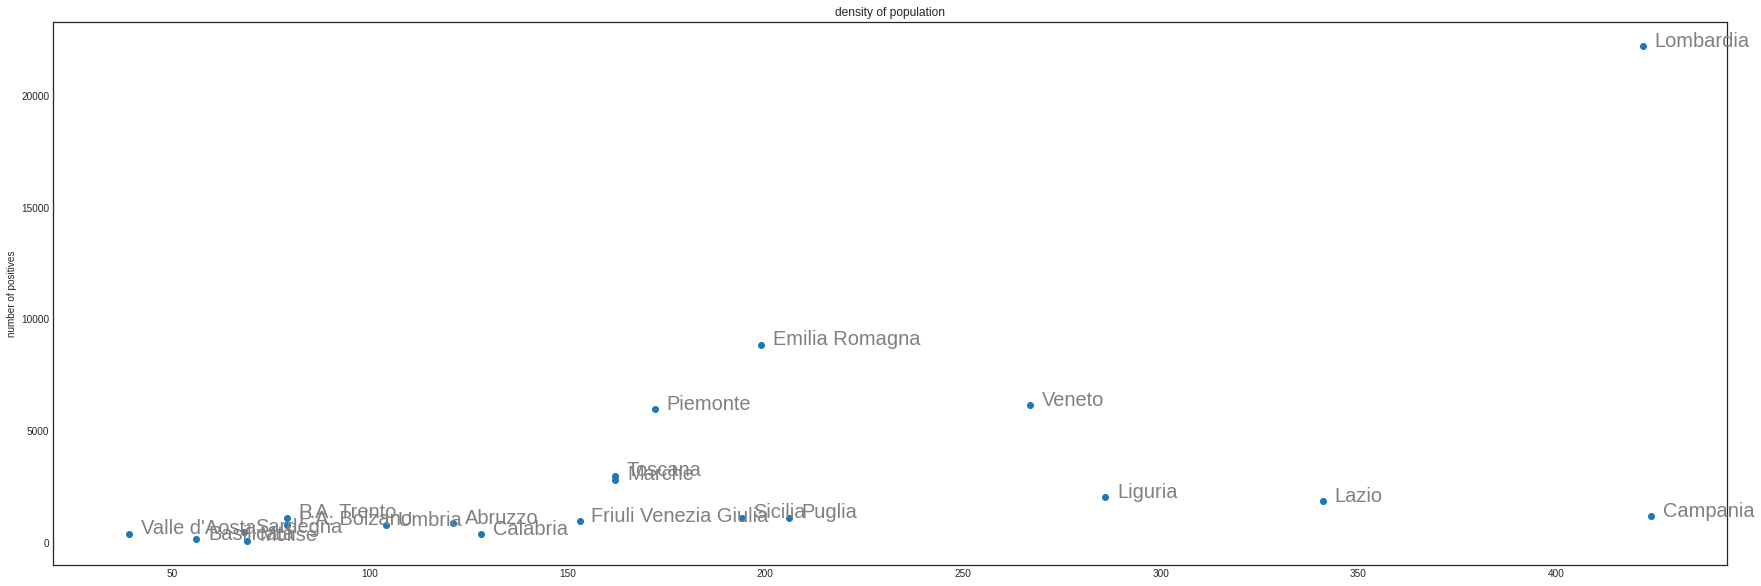

In [18]:
fig, ax = plt.subplots(figsize=(30, 10))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density']+3, mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='number of positives')
plt.show()


Questo plot non fornisce grossi spunti a prima vista. Di sicuro basse densità abitative sembrano essere correlate a basse percentuali di positività. Meno chiaro è ciò che avviene a densità medie ed alte dove si vedono risultati discordanti. Bisogna però tenere conto che in quest'area le regioni a basso numero di positivi sono, a parte la Liguria, regioni del centro-sud dove l'epidemia è arrivata in ritardo rispetto al nord

In [19]:
tempdf = pd.DataFrame([{'denominazione_regione': 'All', 'population': population_density['population'].sum()}])
population = population_density[['denominazione_regione', 'population']]
population = population.append(tempdf, ignore_index = True)
population_pivot = population.pivot_table('population', columns='denominazione_regione')
population_pivot

denominazione_regione  Abruzzo       All  ...  Valle d'Aosta   Veneto
population             1311580  60359544  ...         125666  4905854

[1 rows x 22 columns]

Normalizziamo i dati sul numero di positivi in base alla popolazione di ciascuna regione, ottenendo quindi la percentuale di abitanti positivi di ogni regione

In [20]:
italy_total_positive_normalized = italy_total_positive
columns = list(italy_total_positive)
for regione in columns: 
    italy_total_positive_normalized[regione] = italy_total_positive[regione]/population_pivot.loc['population', regione]
italy_total_positive_normalized

denominazione_regione       Abruzzo  Basilicata  ...    Veneto       All
date                                             ...                    
2020-02-24T18:00:00    0.000000e+00    0.000000  ...  0.000007  0.000004
2020-02-25T18:00:00    0.000000e+00    0.000000  ...  0.000009  0.000005
2020-02-26T18:00:00    0.000000e+00    0.000000  ...  0.000014  0.000006
2020-02-27T18:00:00    7.624392e-07    0.000000  ...  0.000022  0.000010
2020-02-28T18:00:00    7.624392e-07    0.000000  ...  0.000030  0.000014
2020-02-29T17:00:00    1.524878e-06    0.000000  ...  0.000039  0.000017
2020-03-01T17:00:00    3.812196e-06    0.000000  ...  0.000053  0.000026
2020-03-02T18:00:00    3.812196e-06    0.000000  ...  0.000055  0.000030
2020-03-03T18:00:00    4.574635e-06    0.000002  ...  0.000061  0.000037
2020-03-04T17:00:00    5.337074e-06    0.000002  ...  0.000070  0.000045
2020-03-05T17:00:00    6.099514e-06    0.000002  ...  0.000077  0.000055
2020-03-06T17:00:00    6.861953e-06    0.000005  ...  0.000093  0.000065
2020-03-07T18:00:00    8.386831e-06    0.000005  ...  0.000103  0.000084
2020-03-08T18:00:00    1.296147e-05    0.000007  ...  0.000127  0.000106
2020-03-09T18:00:00    2.287318e-05    0.000009  ...  0.000141  0.000132
2020-03-10T18:00:00    2.821025e-05    0.000012  ...  0.000160  0.000141
2020-03-11T17:00:00    2.821025e-05    0.000014  ...  0.000192  0.000175
2020-03-12T17:00:00    5.947026e-05    0.000014  ...  0.000264  0.000213
2020-03-13T17:00:00    6.328245e-05    0.000018  ...  0.000296  0.000248
2020-03-14T17:00:00    8.081855e-05    0.000018  ...  0.000362  0.000294
2020-03-15T17:00:00    9.759222e-05    0.000020  ...  0.000405  0.000341
2020-03-16T17:00:00    1.258025e-04    0.000021  ...  0.000464  0.000382
2020-03-17T17:00:00    1.646869e-04    0.000036  ...  0.000507  0.000432
2020-03-18T17:00:00    1.898474e-04    0.000048  ...  0.000602  0.000476
2020-03-19T17:00:00    2.790527e-04    0.000066  ...  0.000646  0.000550
2020-03-20T17:00:00    3.217493e-04    0.000092  ...  0.000750  0.000627
2020-03-21T17:00:00    3.766450e-04    0.000117  ...  0.000859  0.000707
2020-03-22T17:00:00    4.109547e-04    0.000144  ...  0.000947  0.000773
2020-03-23T17:00:00    4.612757e-04    0.000158  ...  0.001016  0.000835
2020-03-24T17:00:00    4.742372e-04    0.000162  ...  0.001091  0.000895
2020-03-25T17:00:00    5.626801e-04    0.000199  ...  0.001171  0.000953
2020-03-26T17:00:00    6.556977e-04    0.000236  ...  0.001252  0.001027

[32 rows x 22 columns]

Visualizziamo quindi la percentuale di positivi (dato lordo, quindi comprensivo di deceduti e guariti) di tutte le regioni, giorno per giorno

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


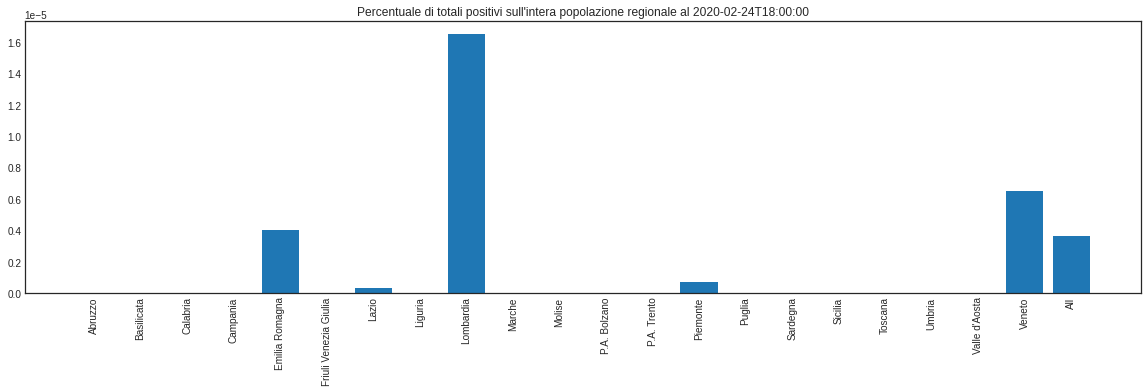

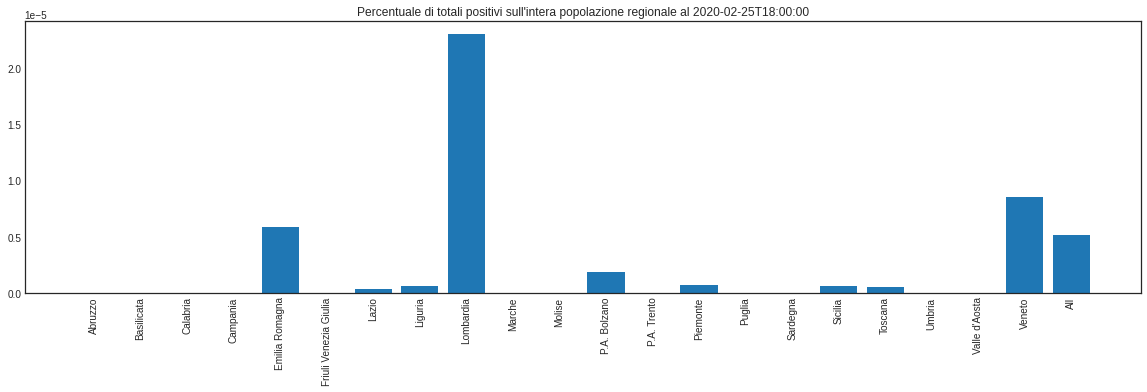

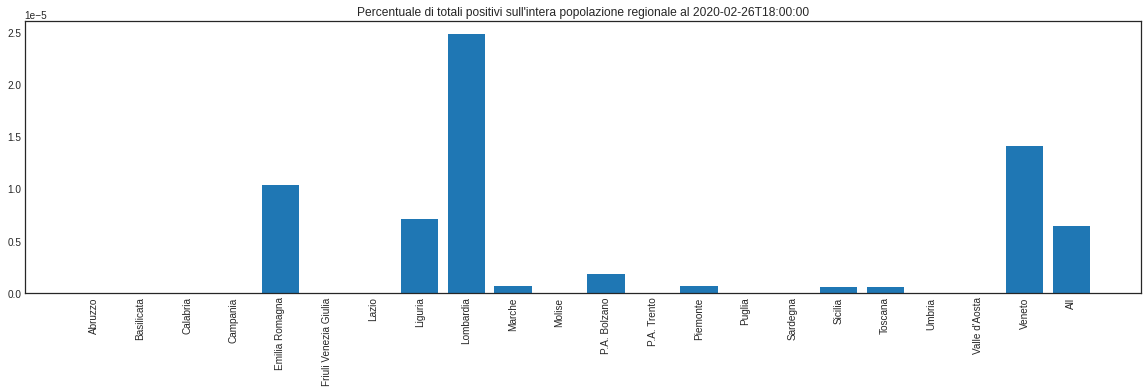

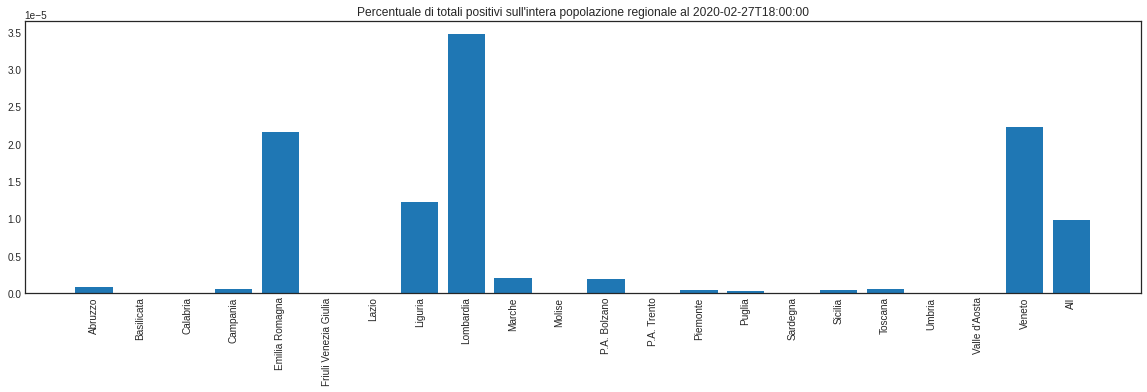

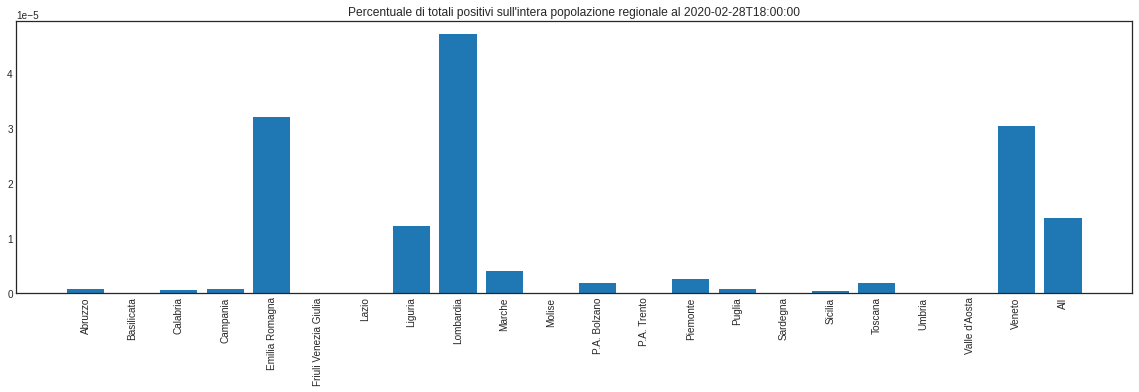

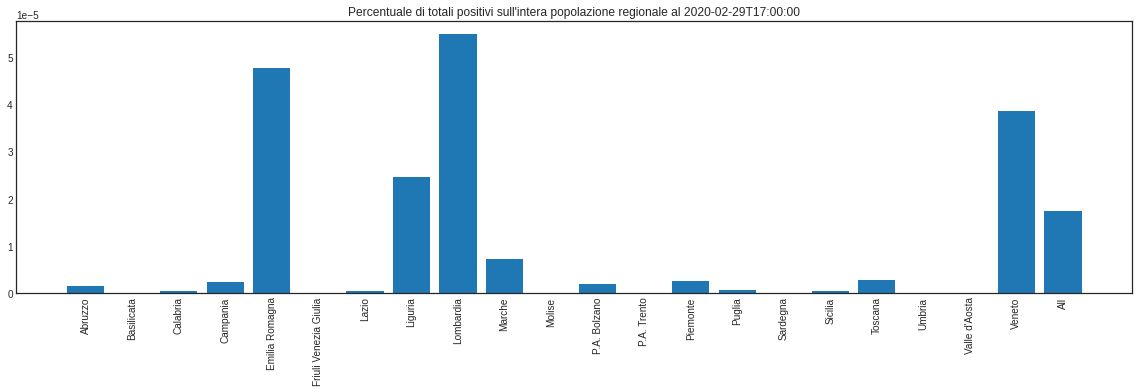

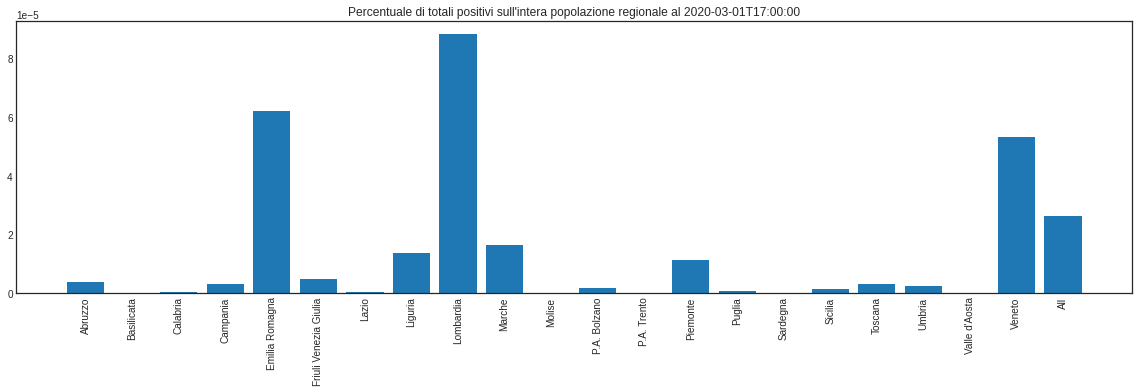

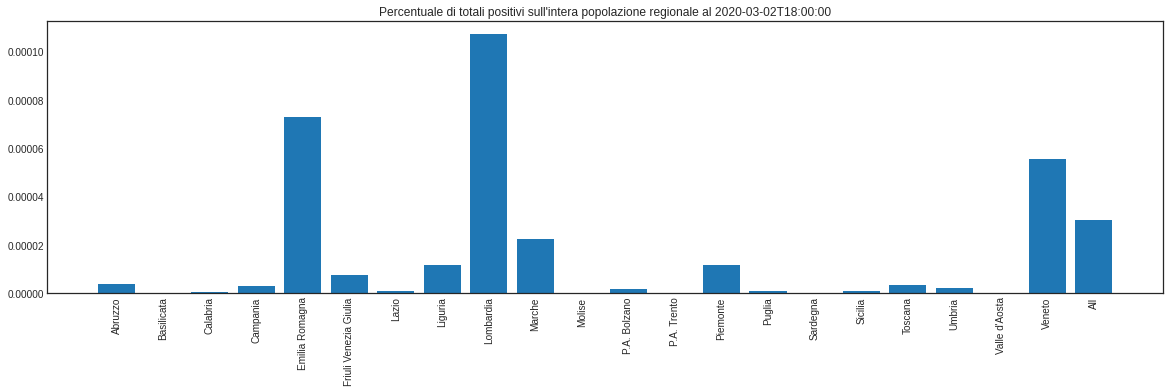

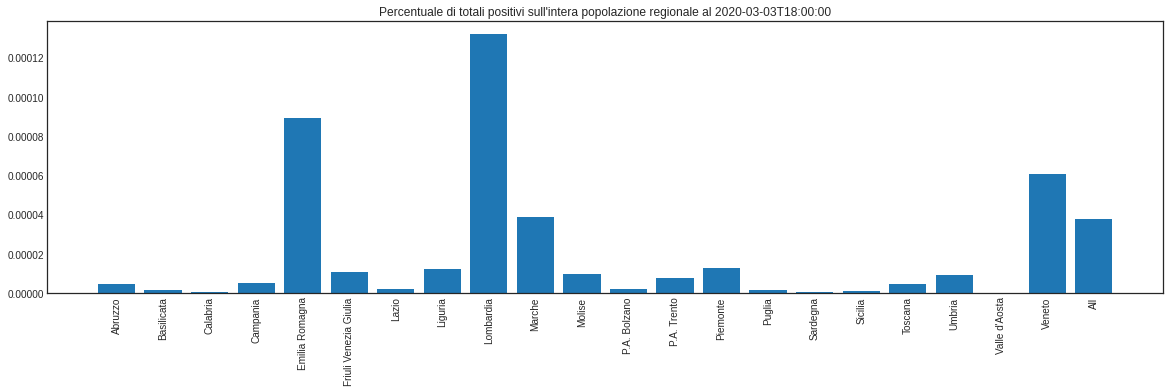

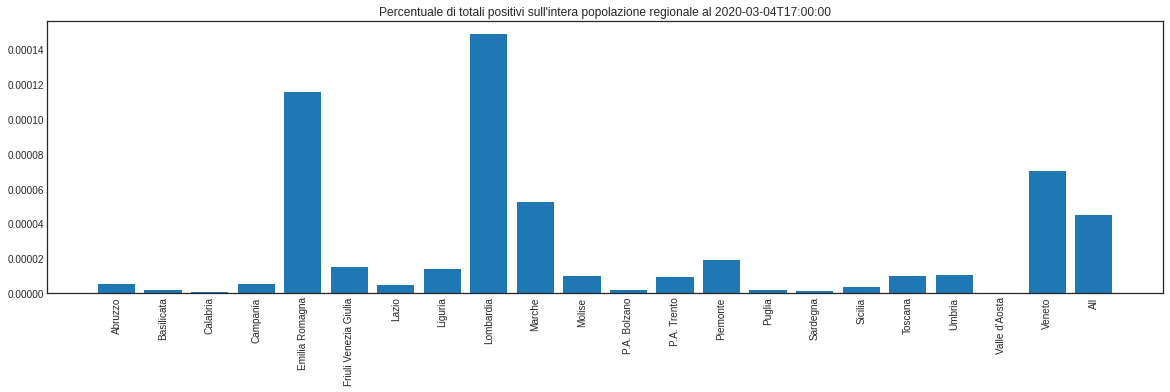

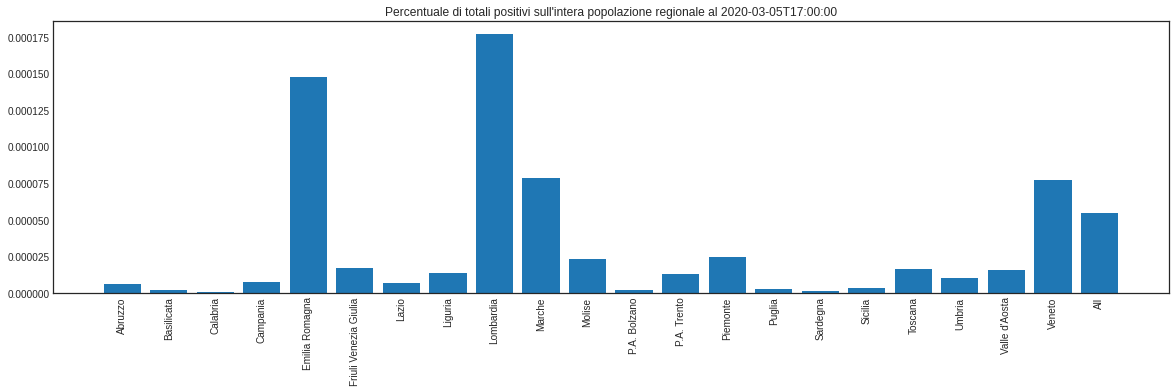

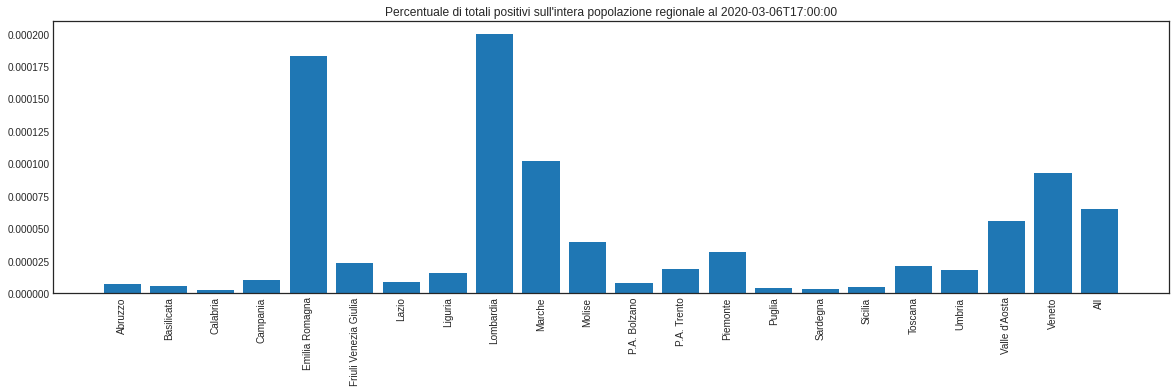

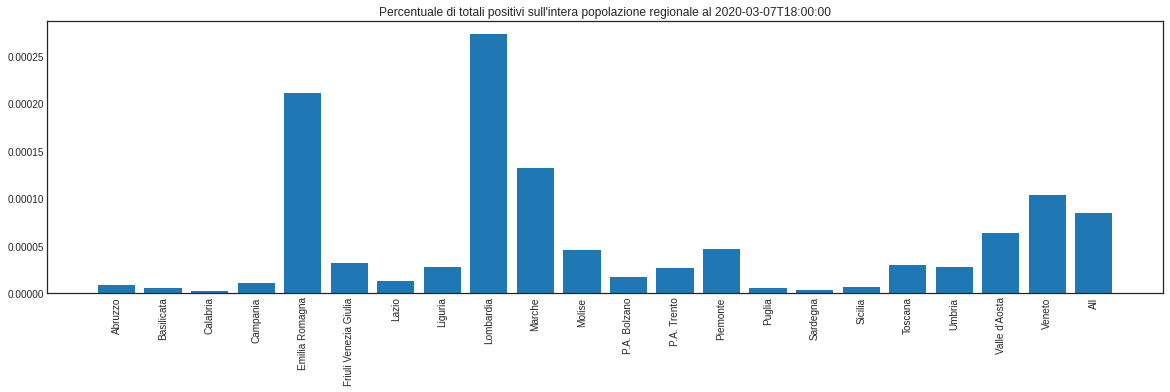

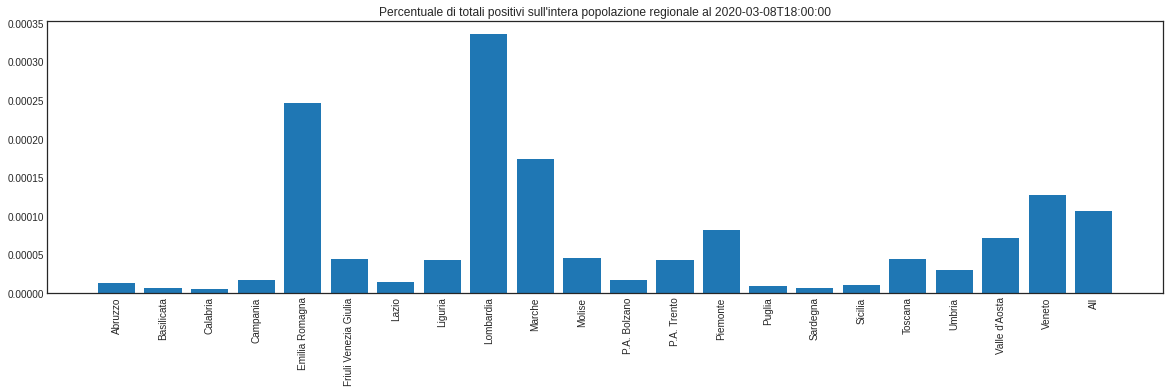

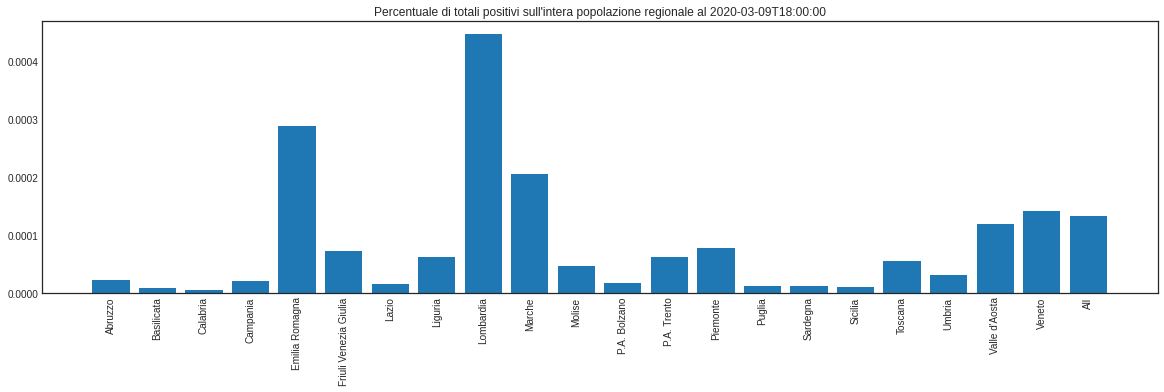

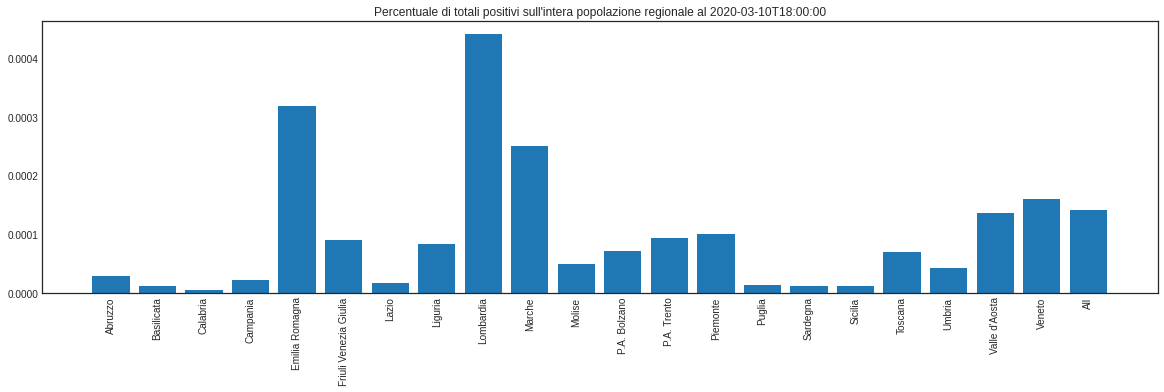

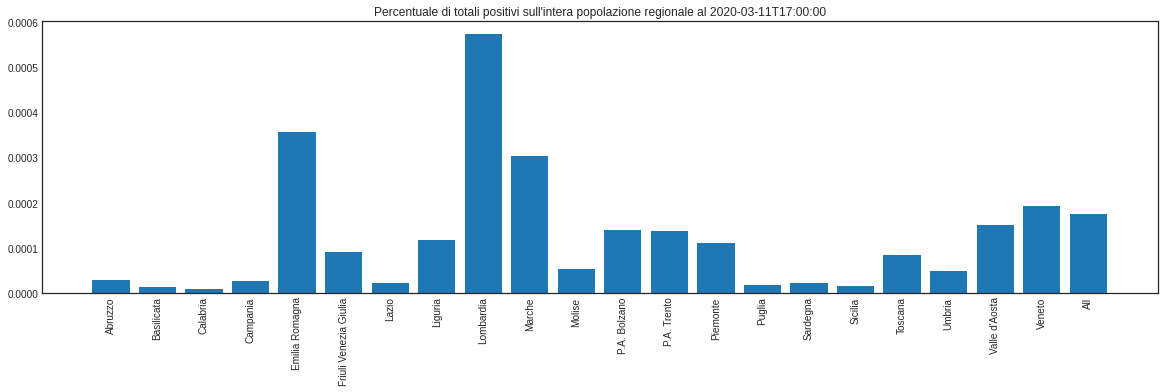

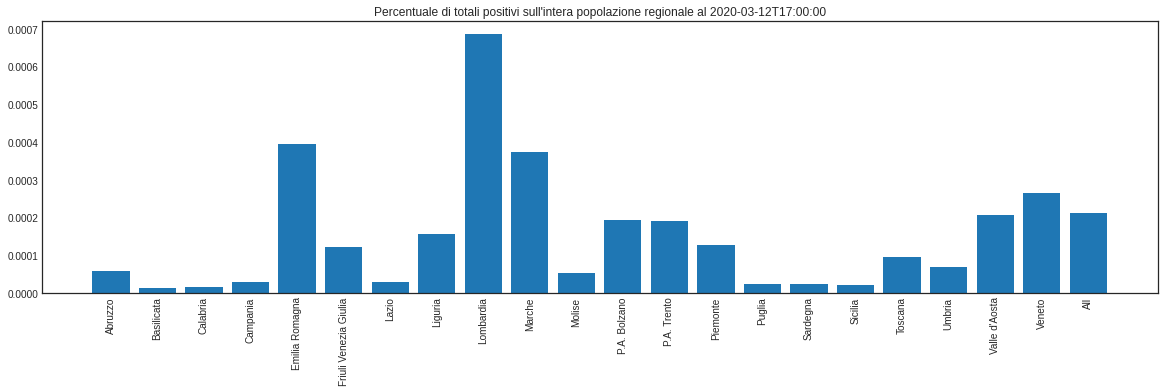

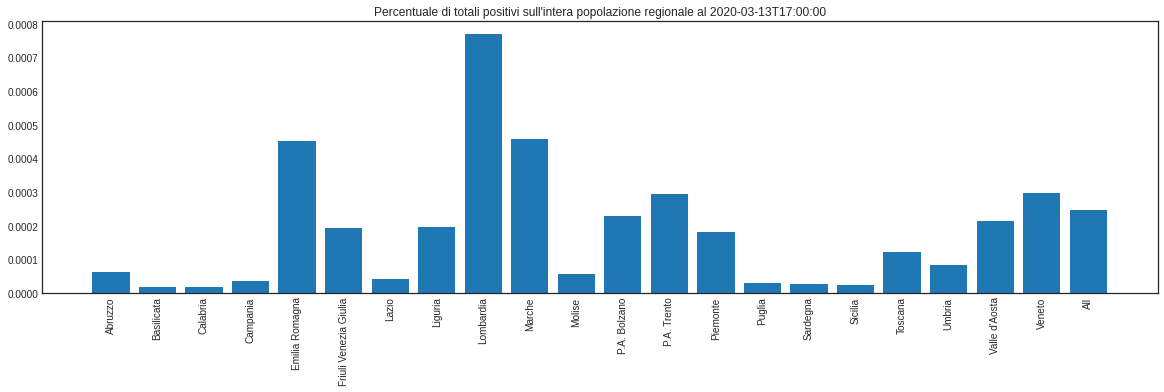

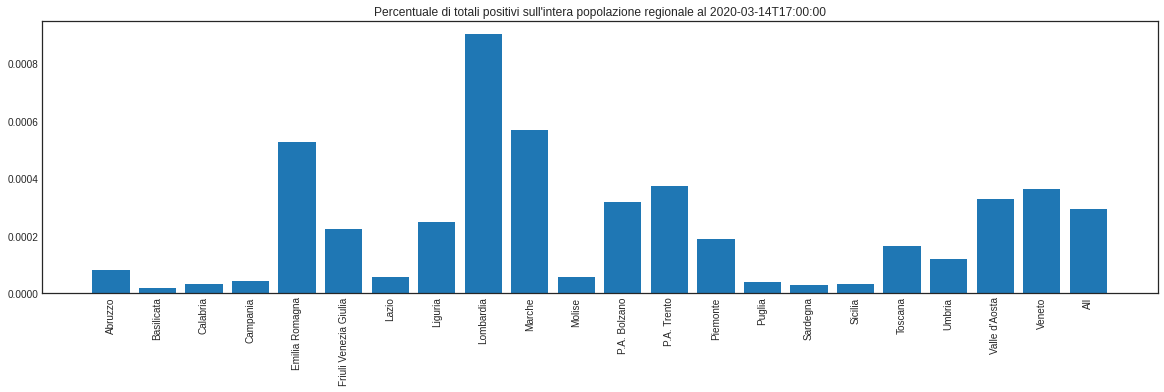

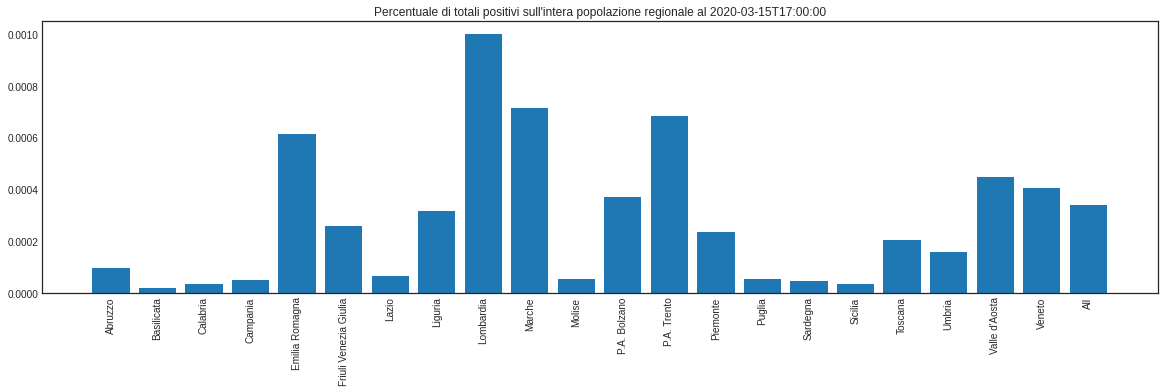

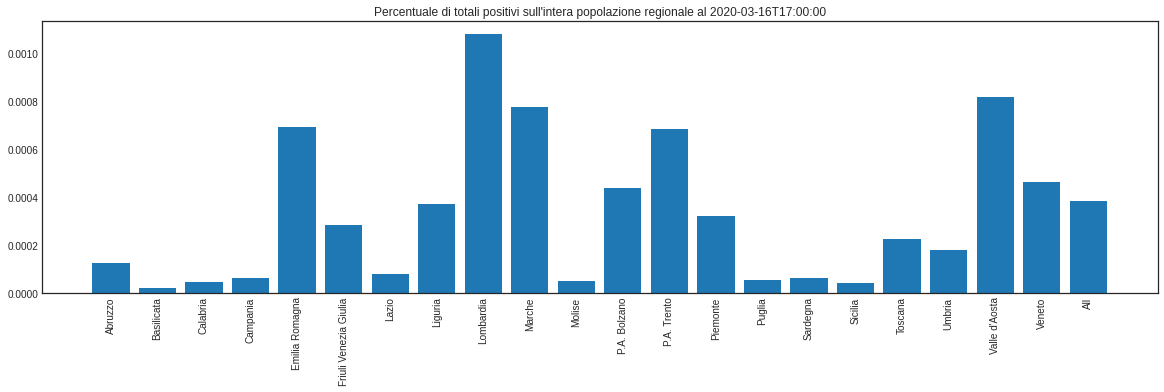

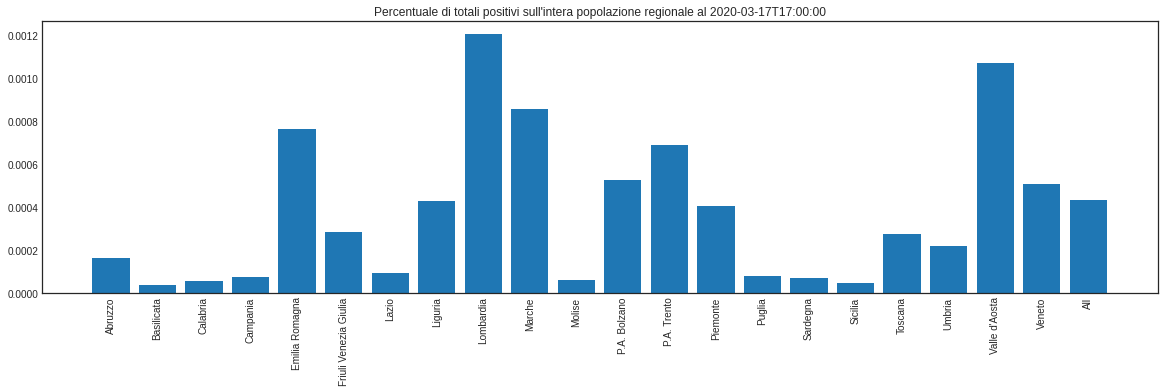

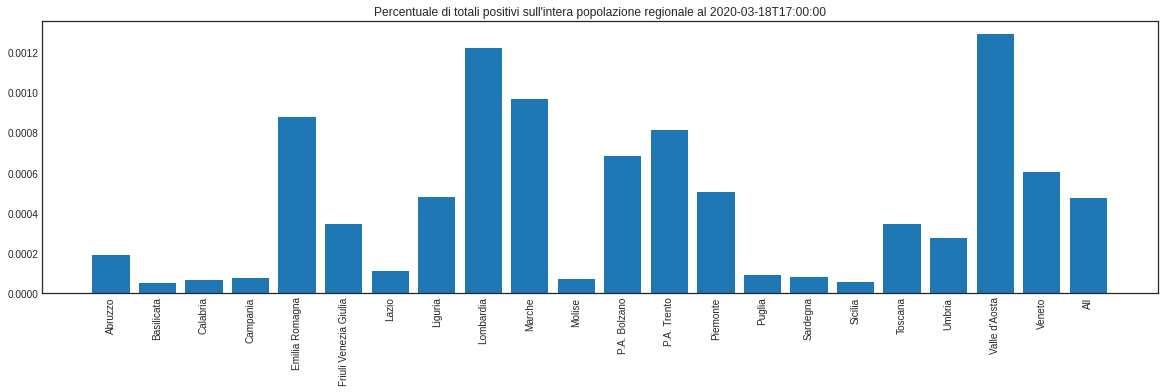

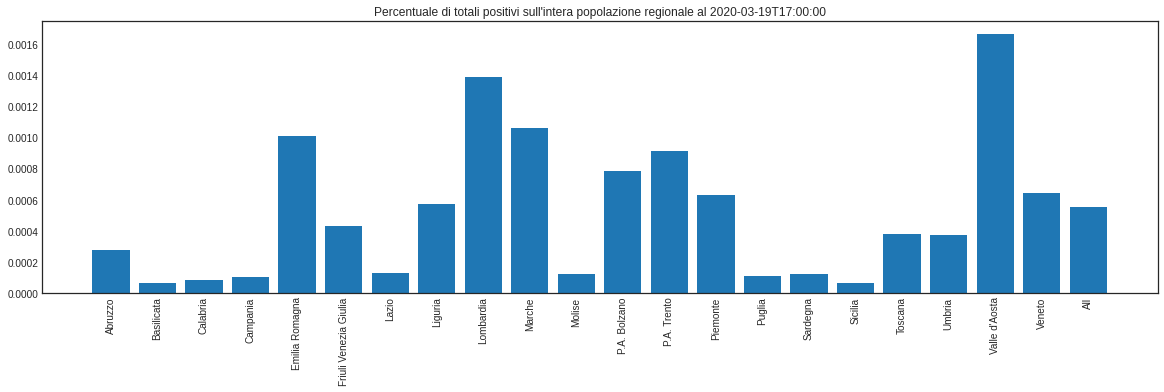

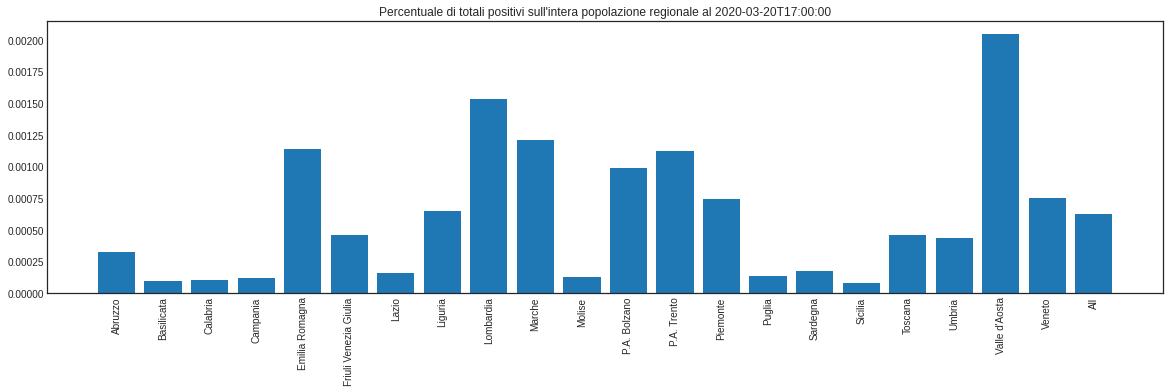

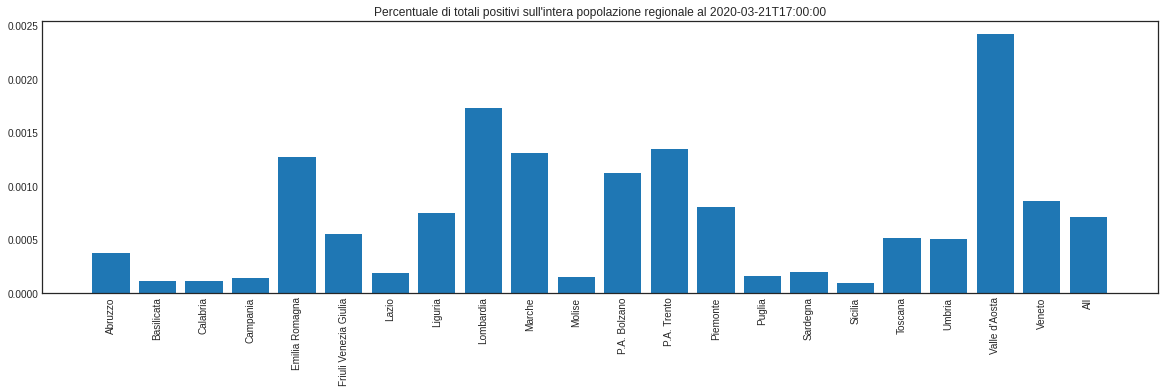

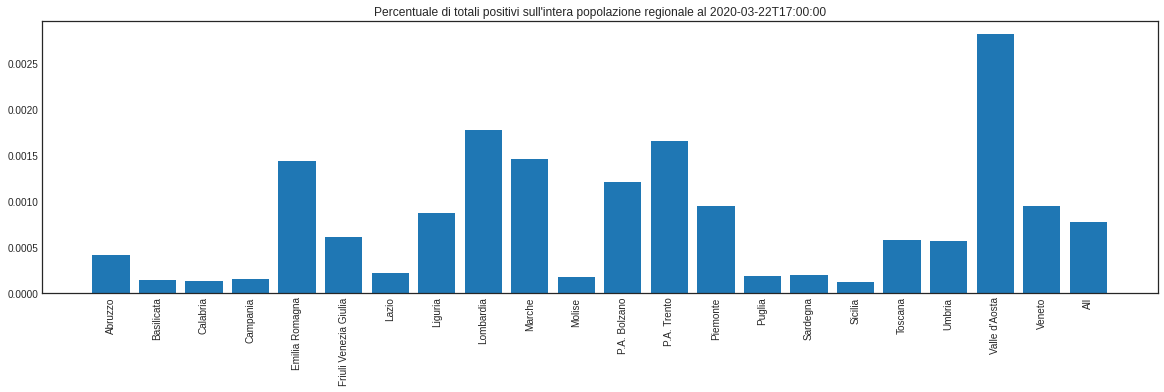

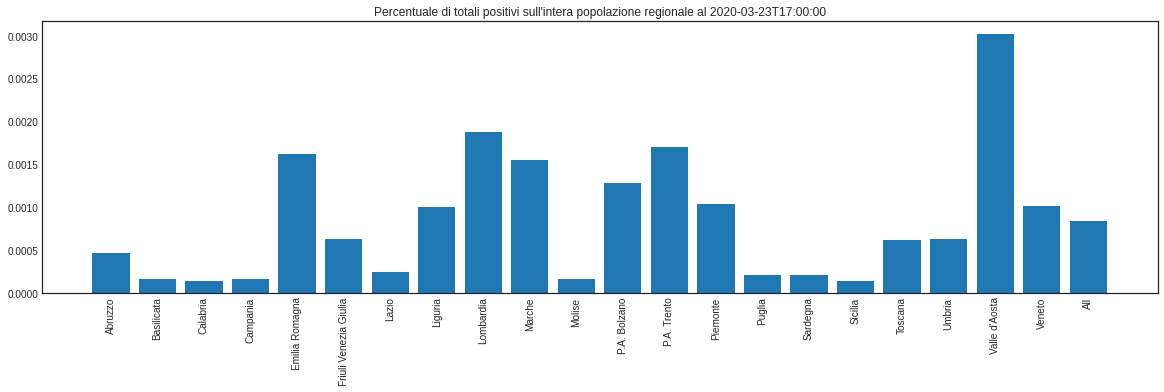

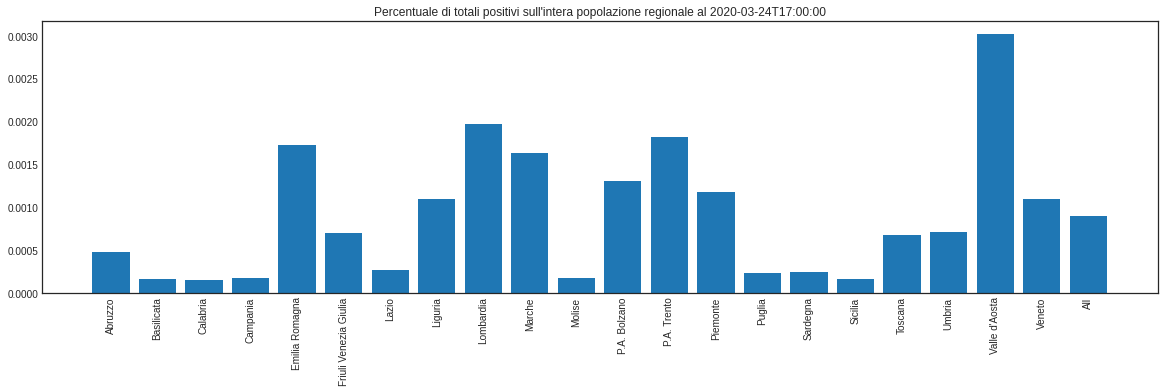

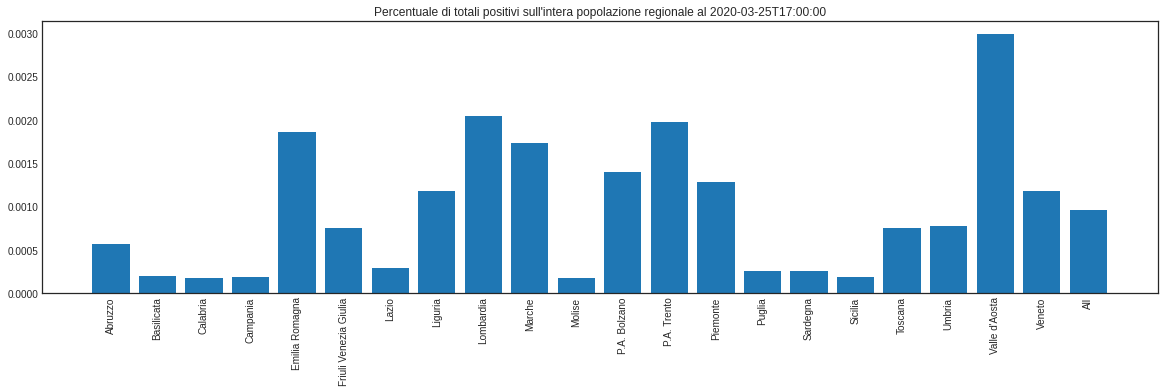

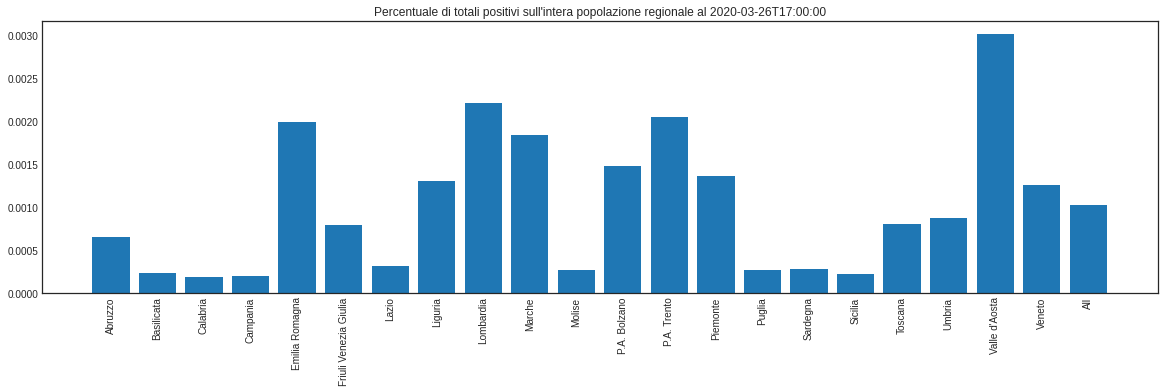

In [21]:
for day in italy_total_positive_normalized.index: 
    italy_total_positive_normalized_curr_day = italy_total_positive_normalized[italy_total_positive_normalized.index == day]
    italy_total_positive_normalized_curr_day_stacked = italy_total_positive_normalized_curr_day.stack()
    italy_total_positive_normalized_curr_day = italy_total_positive_normalized_curr_day_stacked.unstack(level=0)
    italy_total_positive_normalized_curr_day.columns = ['Positive_percentage']
    fig, ax = plt.subplots(figsize=(20,5))
    plt.xticks(rotation='vertical')
    plt.bar(italy_total_positive_normalized_curr_day.index, height=italy_total_positive_normalized_curr_day.Positive_percentage)
    plt.title('Percentuale di totali positivi sull\'intera popolazione regionale al ' + day);



Fino al 7/3 le regioni col maggior tasso di positivi sono, come noto, Lombardia, Emilia Romagna e Veneto.
Dall'8/3 il Veneto viene superato dalle Marche e raggiunto da Trentino e Valle d'Aosta che, il 15/3, lo distanziano nettamente.
Il 18/3 la Valle d'Aosta diventa la prima regione per tasso di positivi.
Il 25/3 il 3 per mille dei valdostani e contagiato, seguito dal 2 per mille di emiliano-romagnoli, lombardi e trentini.

Vediamo l'andamento temporale del fenomeno regione per regione

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


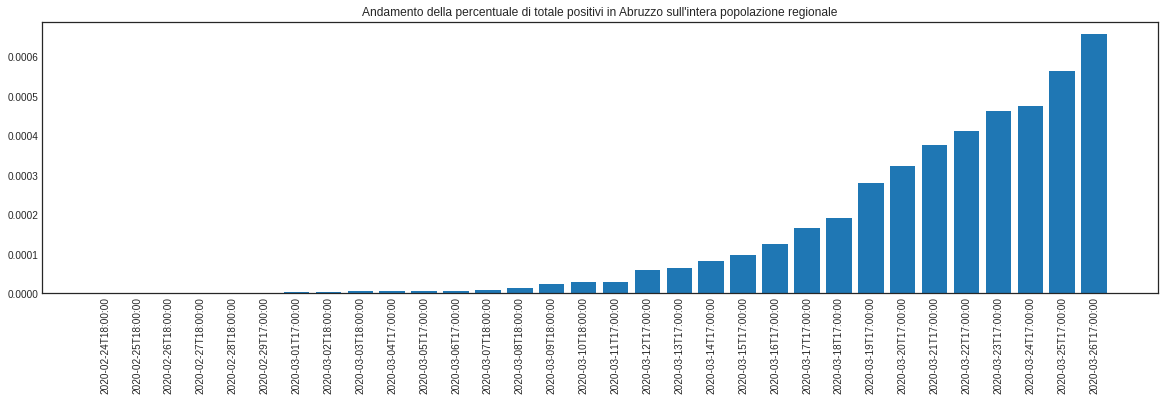

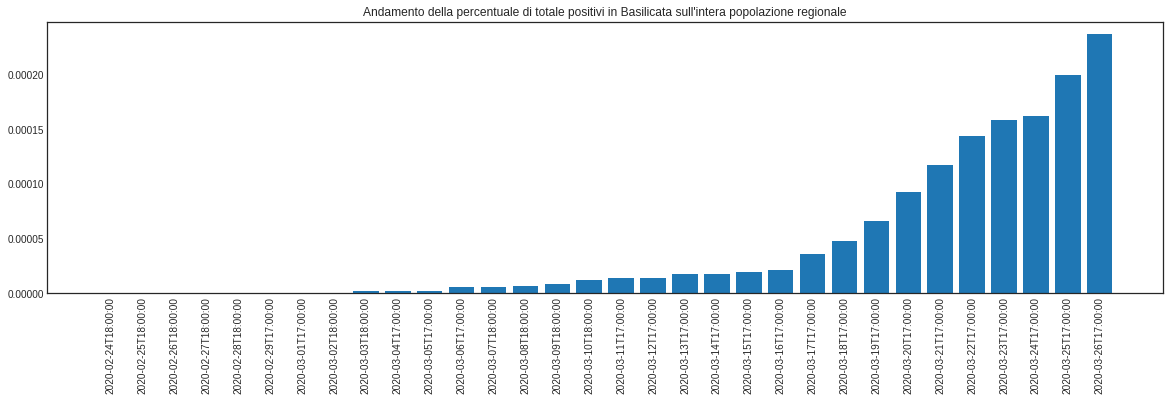

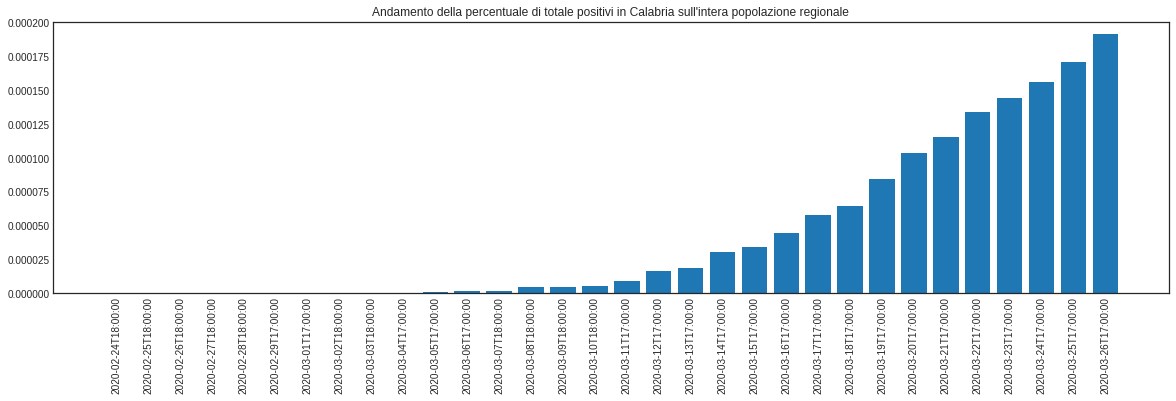

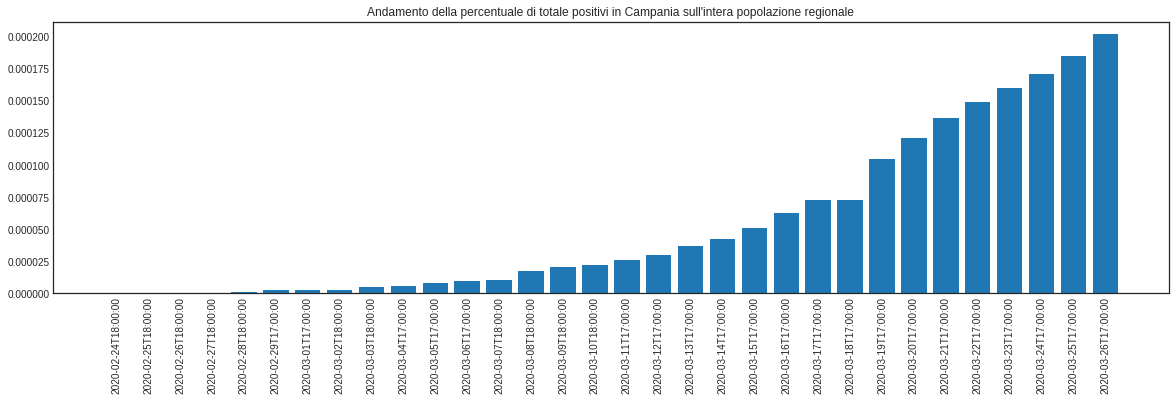

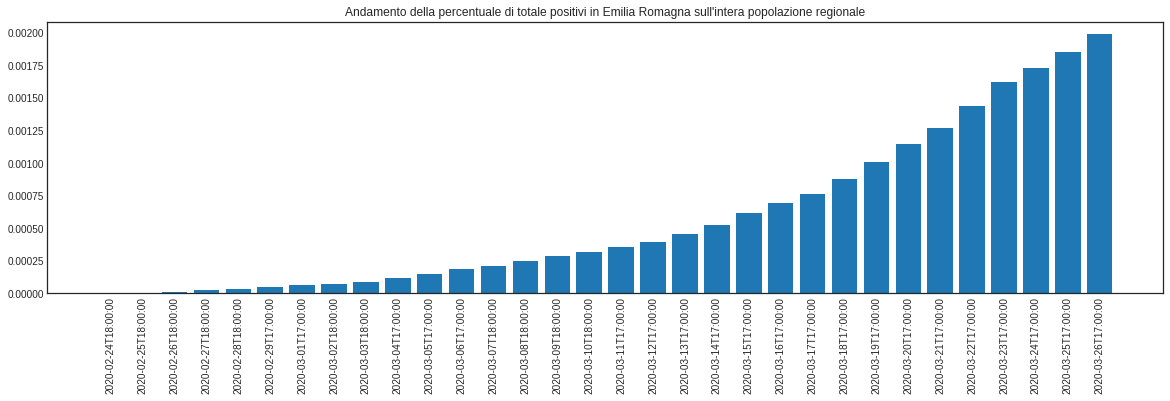

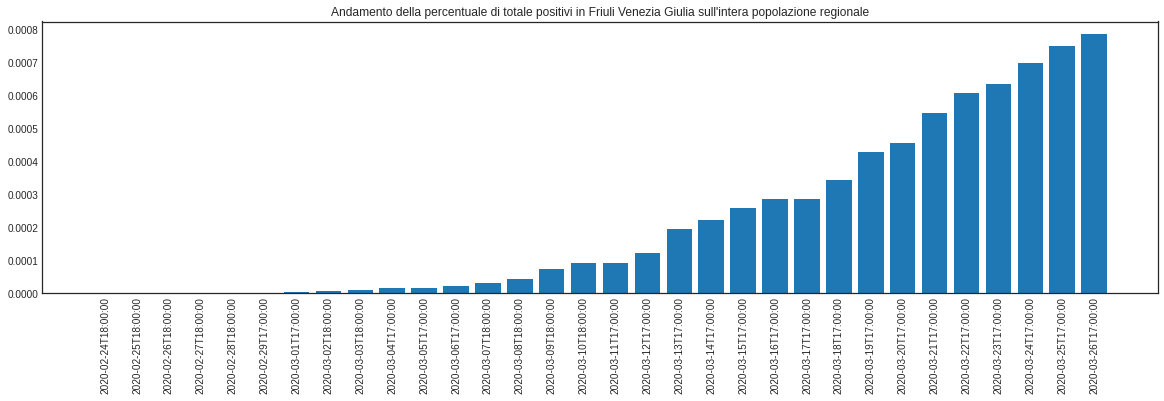

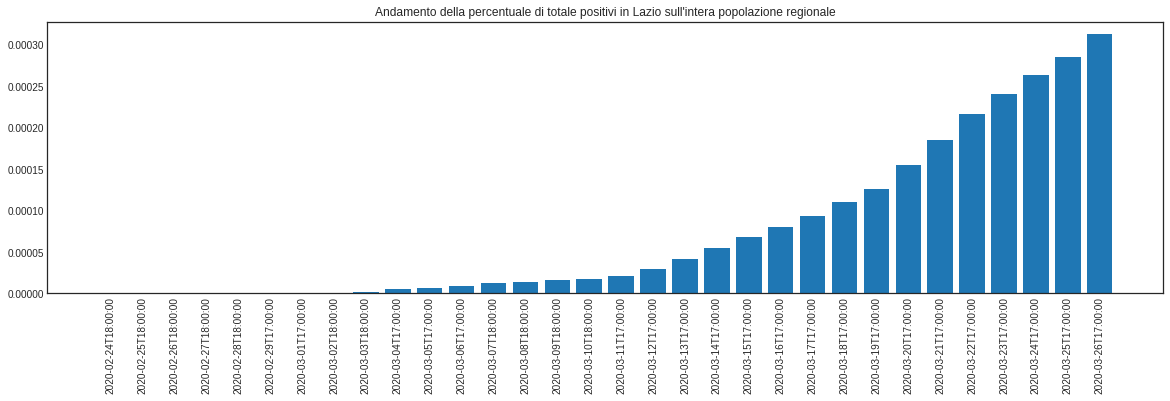

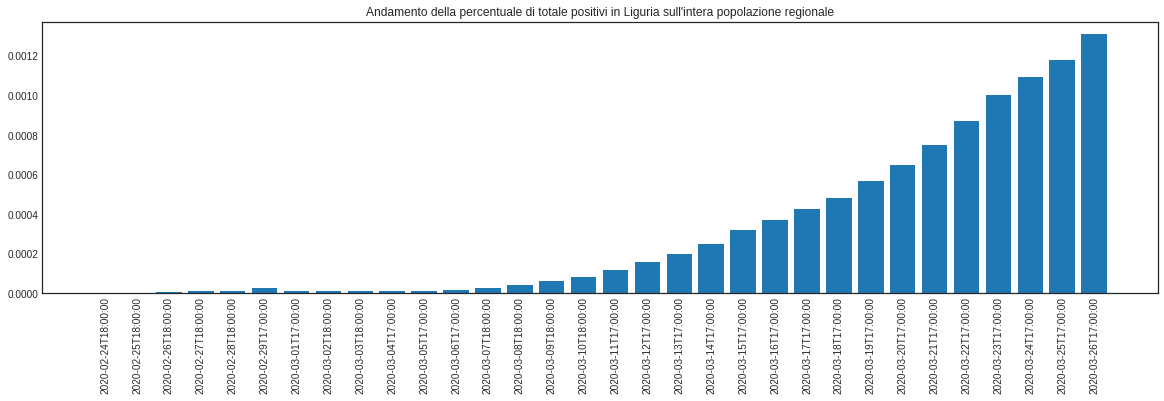

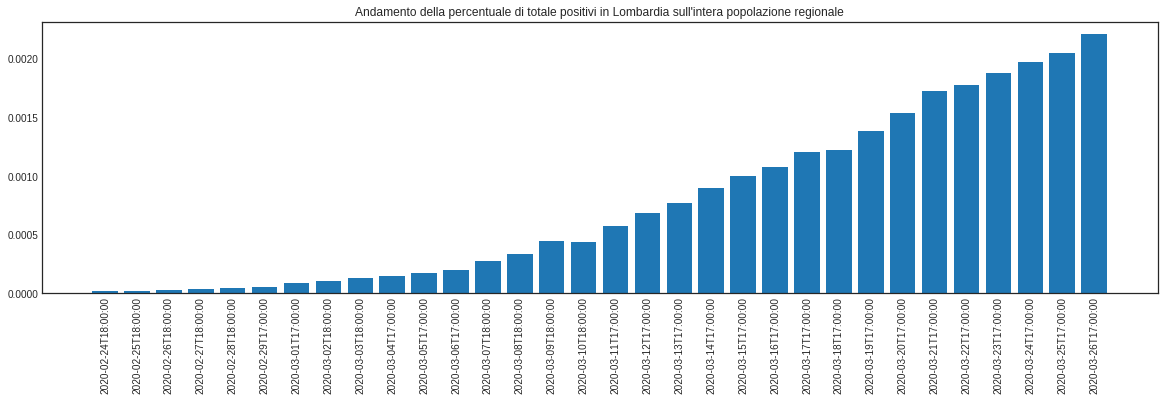

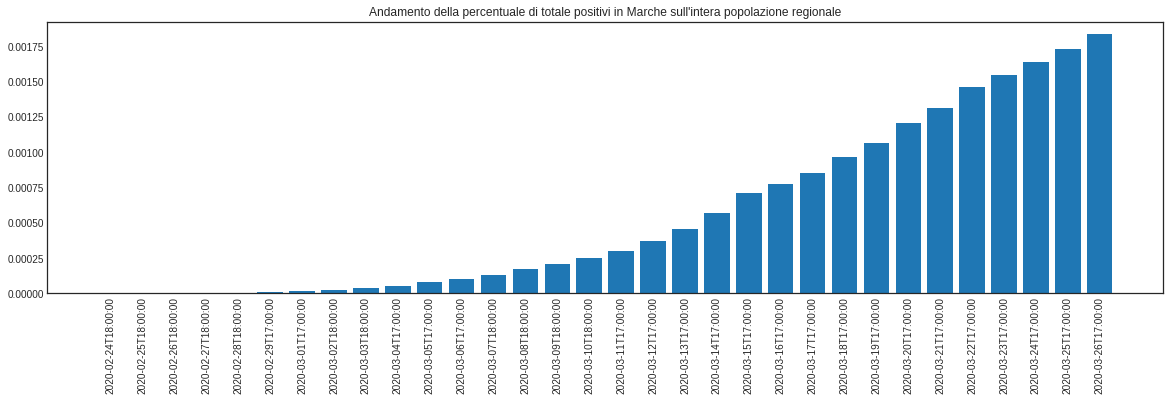

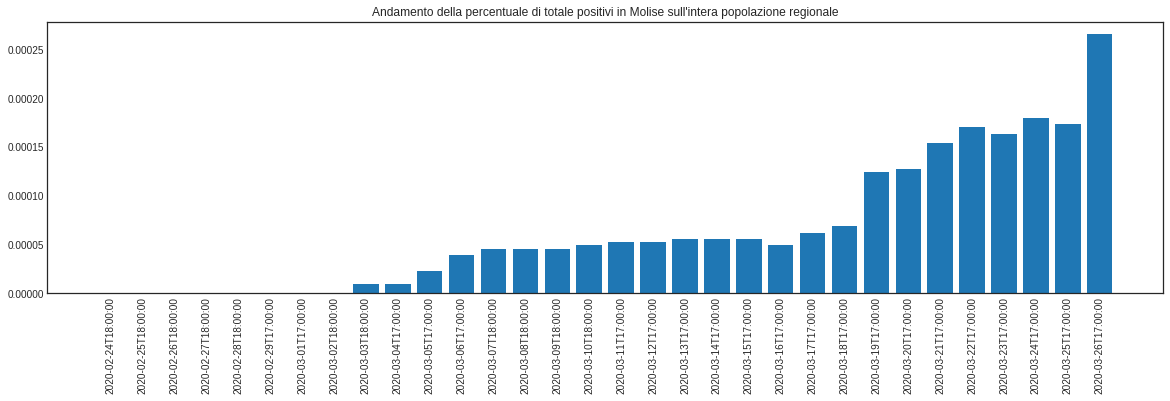

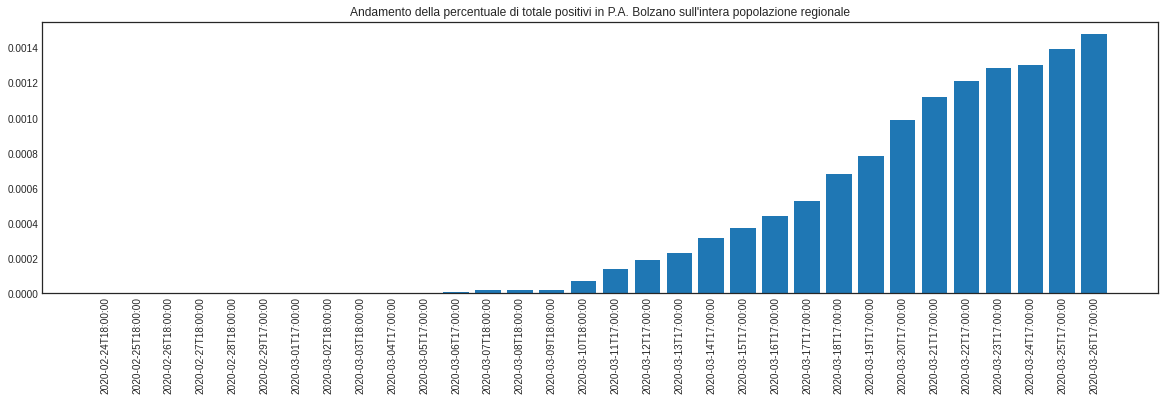

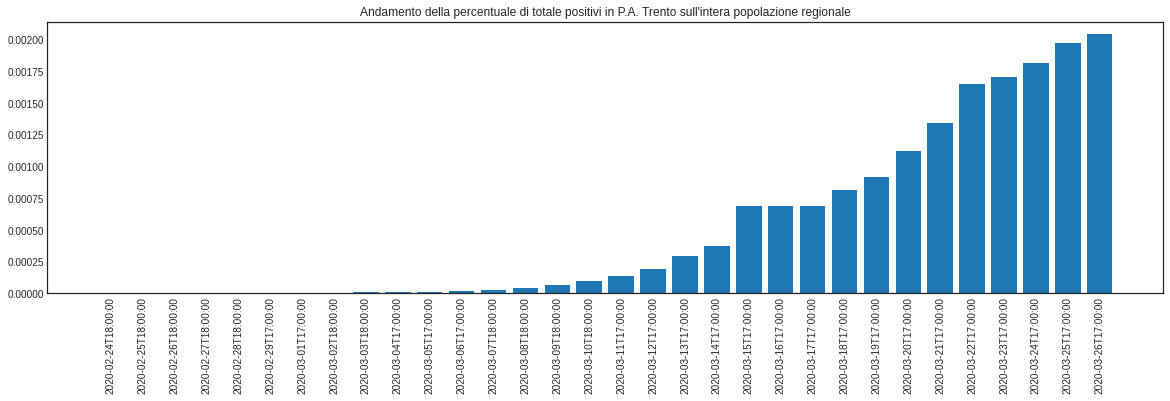

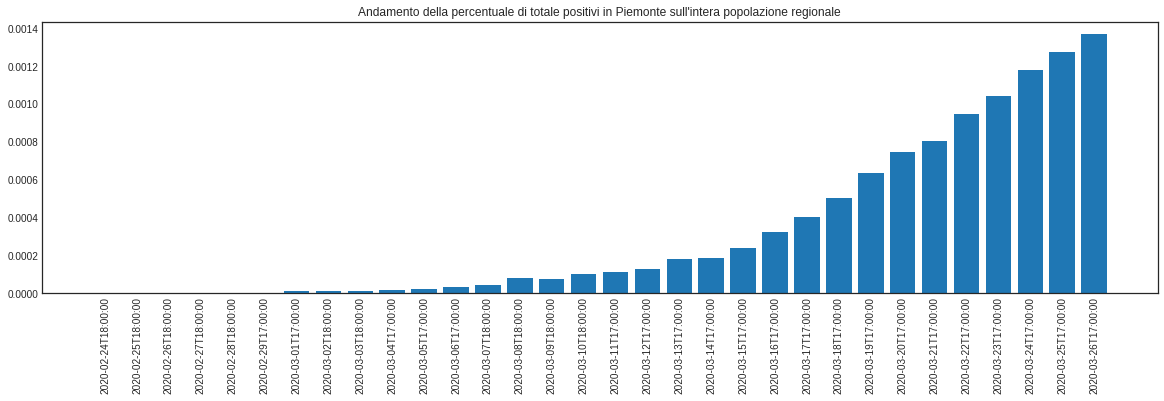

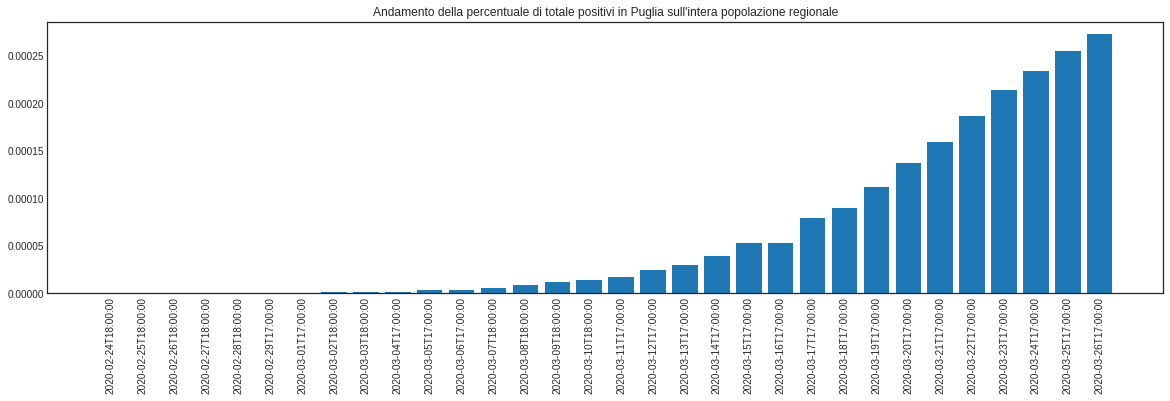

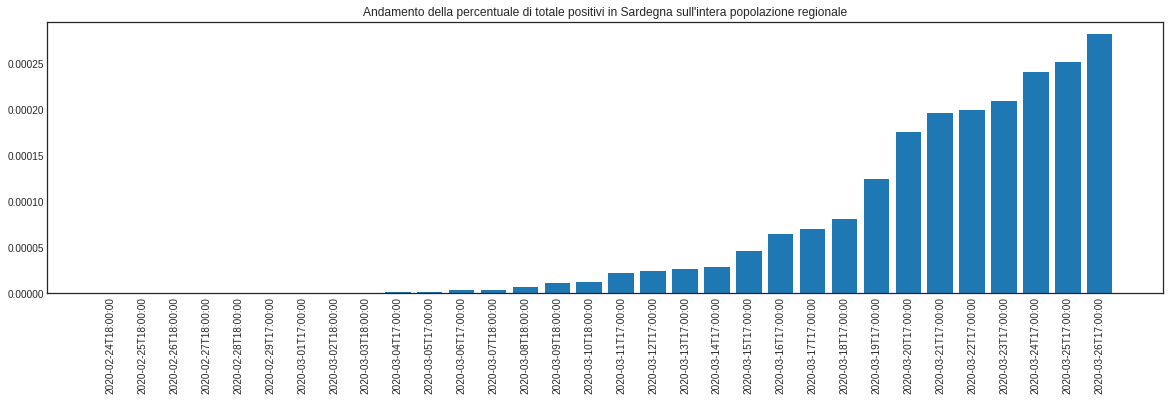

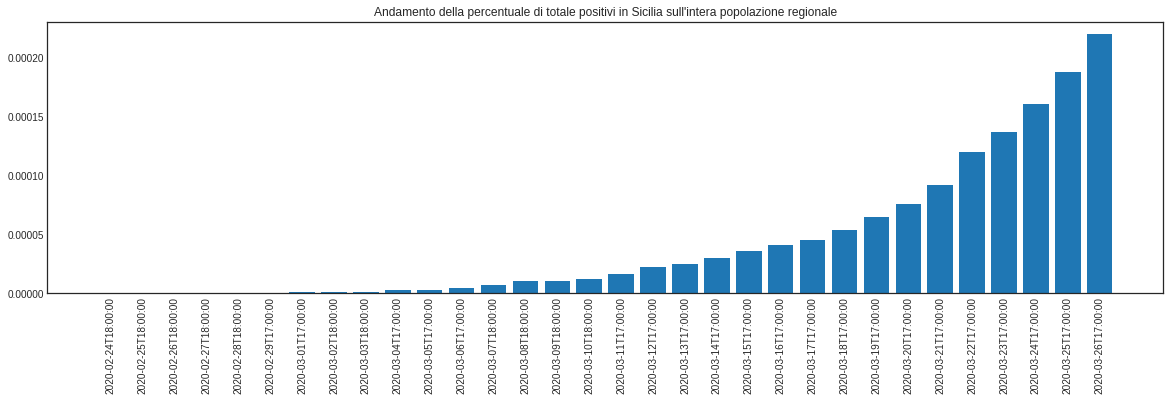

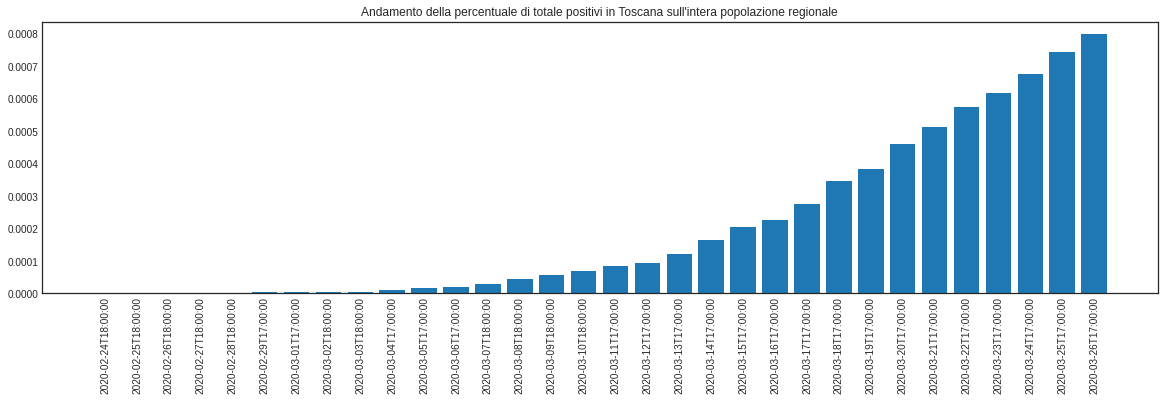

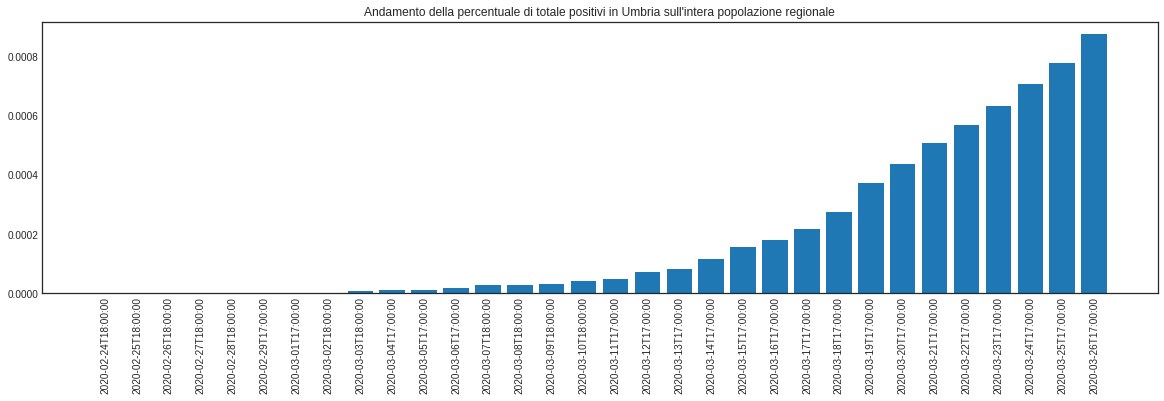

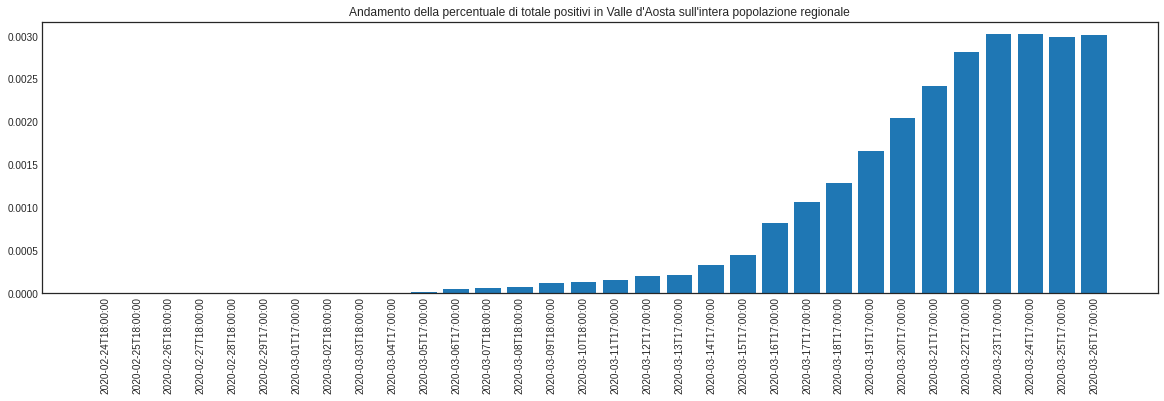

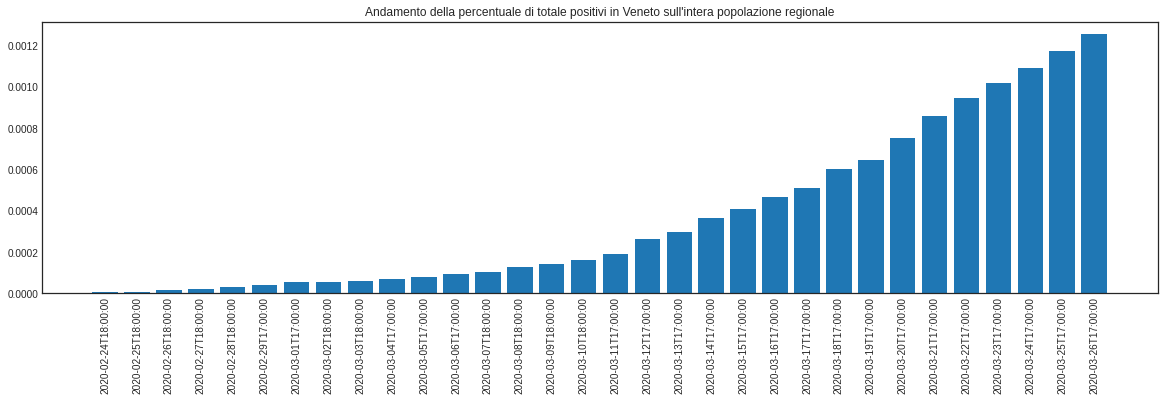

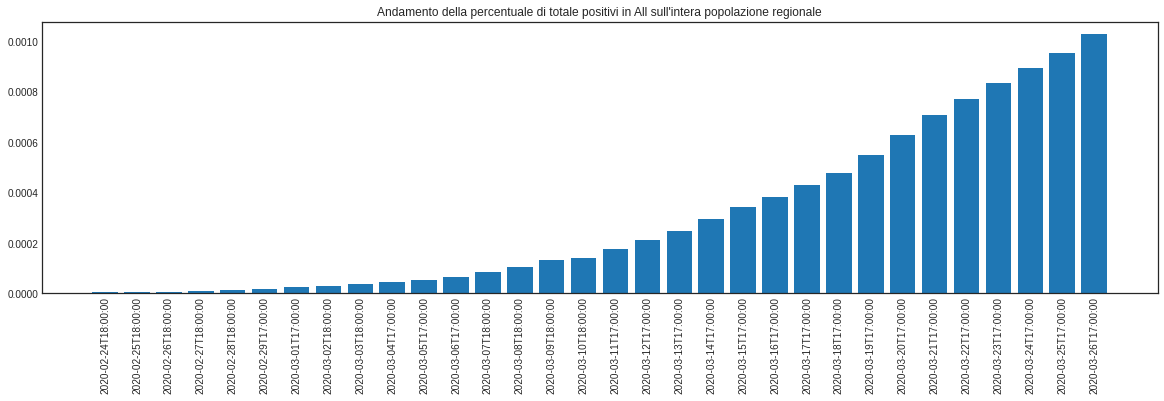

In [22]:
for region in list(italy_total_positive_normalized): 
    fig, ax = plt.subplots(figsize=(20,5))
    plt.xticks(rotation='vertical')
    plt.bar(italy_total_positive_normalized.index, height=italy_total_positive_normalized[region])
    plt.title('Andamento della percentuale di totale positivi in ' + region + ' sull\'intera popolazione regionale');

L'andamento qualitativo del tasso di positivi non può che seguire quello del numero assoluto.

Infine la correlazione tra densità abitativa e percentuale di positivi totali riferita all'ultima rilevazione

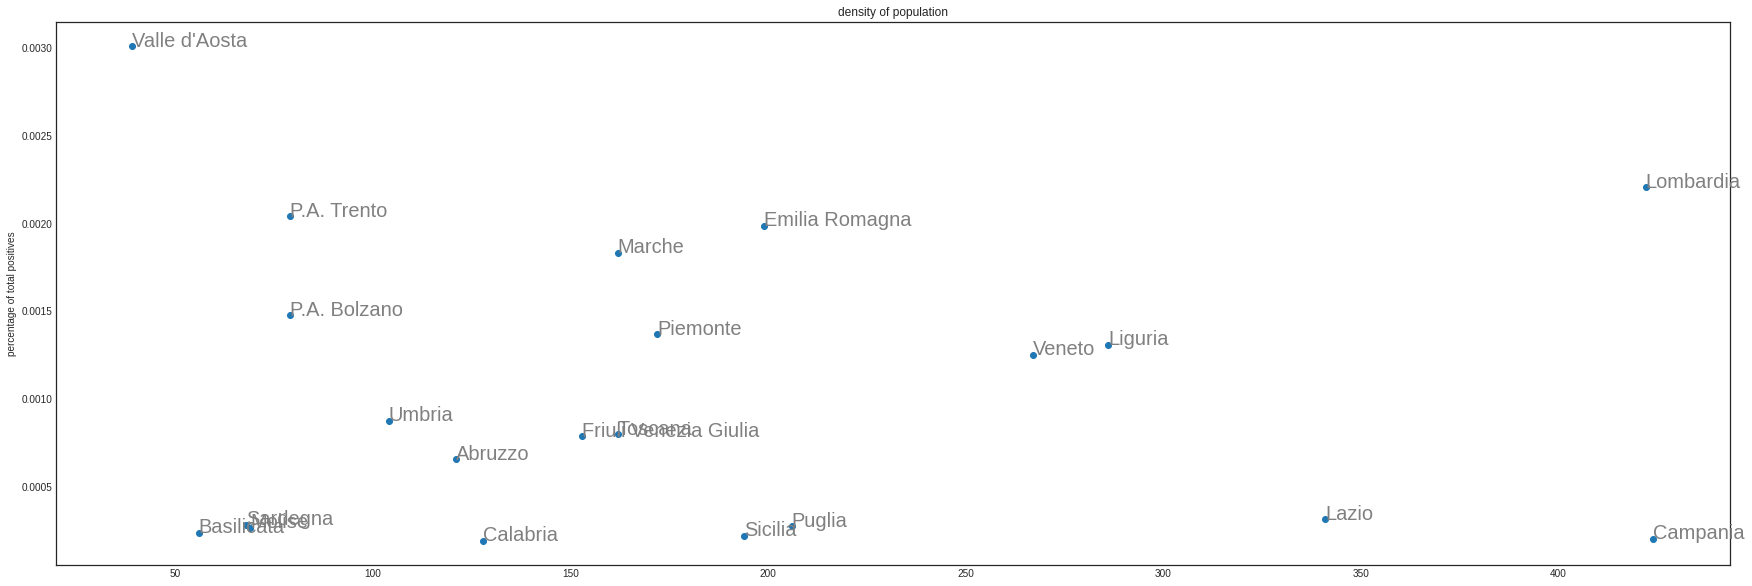

In [23]:
last_day = italy_total_positive_normalized.index[-1]
for day in italy_total_positive_normalized.index: 
    italy_total_positive_normalized_last_day = italy_total_positive_normalized[italy_total_positive_normalized.index == last_day]
italy_total_positive_normalized_last_day_flat = italy_total_positive_normalized_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_normalized_last_day_flat, population_density)
fig, ax = plt.subplots(figsize=(30, 10))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density'], mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='percentage of total positives')
plt.show()


Questo plot non chiarisce nulla sull'eventuale correlazione tra le due grandezze ma sconta la differente maturità dell'epidemia da regione a regione, sul fondo infatti si trovano tutte le regioni del centro-sud che ad occhio hanno un ritardo di circa una settimana rispetto alle regioni del nord. Può darsi che più avanti si chiarisca qualcosa.

Mentre la curva dei totali positivi (quindi comprensiva di guariti e deceduti) avrà un andamento sigmoidale, ossia tipo questo:


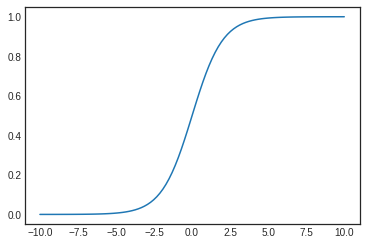

In [24]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

... quella degli attualmente positivi potrebbe raggiungere un picco, quindi scendere ed infine tendere a zero, forse con una discesa più lenta rispetto alla salita, più o meno come il seguente modello: 

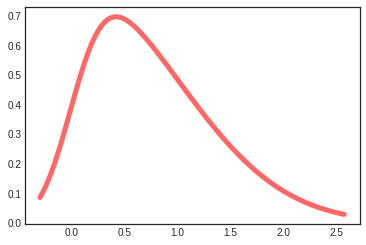

In [25]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

In ogni caso ciò che interessa maggiormente ai fini predittivi è la data e l'intensità del picco degli attualmente positivi. Se fosse possibile stimare queste due quantità il Sistema Sanitario Regionale potrebbe organizzarsi.

Il modello più "antico" a disposizione è quello lombardo ma bisogna tenere conto che per molti giorni non ha beneficiato delle misure restrittive di cui invece godono i focolai più recenti, quindi le previsioni, al di là della loro correttezza, sono da intendersi come pessimistiche. Il picco effettivo dovrebbe essere più basso e più lontano nel tempo rispetto a quello previsto, secondo quanto descritto in questo [studio](https://www.visualcapitalist.com/infection-trajectory-flattening-the-covid19-curve/?fbclid=IwAR3KsS0FJgZPdCwoj0uw7qNO5bagm59eKdg85C12Wjw3T0w8mODXaX9iU8g)

Per rendere confrontabili i modelli delle singole regioni dobbiamo renderci indipendenti dalle loro caratteristiche intrinseche (dimensioni e numero di abitanti, in particolare) per cui non possiamo fare affidamento sul numero di positivi assoluto. Utilizziamo quindi le variazioni percentuali rispetto al giorno precedente, ossia la differenza tra il numero degli attualmente positivi del giorno considerato ed il precedente, diviso per il numero degli attualmente positivi del giorno precedente.

**Il picco si configurerà nel momento in cui le barre tenderanno allo zero o inizieranno ad andare sotto zero**

In [26]:
italy_currently_positive_delta = (italy_currently_positive - italy_currently_positive.shift(periods=1))/italy_currently_positive.shift(periods=1)
italy_currently_positive_delta = italy_currently_positive_delta.replace(np.inf, np.nan)
italy_currently_positive_delta = italy_currently_positive_delta.fillna(0)
italy_currently_positive_delta = italy_currently_positive_delta.loc['2020-03-01T17:00:00':]
italy_currently_positive_delta = italy_currently_positive_delta[italy_currently_positive_delta<1]
italy_currently_positive_delta = italy_currently_positive_delta.fillna(0)
italy_currently_positive_delta


denominazione_regione   Abruzzo  Basilicata  ...    Veneto       All
date                                         ...                    
2020-03-01T17:00:00    0.000000    0.000000  ...  0.380952  0.503337
2020-03-02T18:00:00    0.000000    0.000000  ...  0.038314  0.163602
2020-03-03T18:00:00    0.200000    0.000000  ...  0.095941  0.233243
2020-03-04T17:00:00    0.166667    0.000000  ...  0.161616  0.195758
2020-03-05T17:00:00    0.142857    0.000000  ...  0.101449  0.218034
2020-03-06T17:00:00    0.125000    0.000000  ...  0.194737  0.188107
2020-03-07T18:00:00    0.222222    0.000000  ...  0.112335  0.292390
2020-03-08T18:00:00    0.545455    0.333333  ...  0.233663  0.262004
2020-03-09T18:00:00    0.764706    0.250000  ...  0.113965  0.250196
2020-03-10T18:00:00    0.233333    0.400000  ...  0.128242  0.066249
2020-03-11T17:00:00    0.000000    0.142857  ...  0.200511  0.243834
2020-03-12T17:00:00    0.000000    0.000000  ...  0.379787  0.212370
2020-03-13T17:00:00    0.064103    0.250000  ...  0.120278  0.164810
2020-03-14T17:00:00    0.277108    0.000000  ...  0.221610  0.186894
2020-03-15T17:00:00    0.207547    0.100000  ...  0.120563  0.160732
2020-03-16T17:00:00    0.289062    0.090909  ...  0.143288  0.119885
2020-03-17T17:00:00    0.309091    0.666667  ...  0.094107  0.129545
2020-03-18T17:00:00    0.152778    0.350000  ...  0.186897  0.101604
2020-03-19T17:00:00    0.469880    0.370370  ...  0.073146  0.156043
2020-03-20T17:00:00    0.153005    0.405405  ...  0.160303  0.140705
2020-03-21T17:00:00    0.170616    0.269231  ...  0.146043  0.127338
2020-03-22T17:00:00    0.091093    0.227273  ...  0.102041  0.092711
2020-03-23T17:00:00    0.122449    0.098765  ...  0.073643  0.081050
2020-03-24T17:00:00    0.028099    0.022472  ...  0.073205  0.071641
2020-03-25T17:00:00    0.186495    0.230769  ...  0.073631  0.064612
2020-03-26T17:00:00    0.165312    0.187500  ...  0.068755  0.078093

[26 rows x 22 columns]

I dati grezzi non mostrano regolarità. Per questo motivo si applica una media mobile a 3 giorni

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


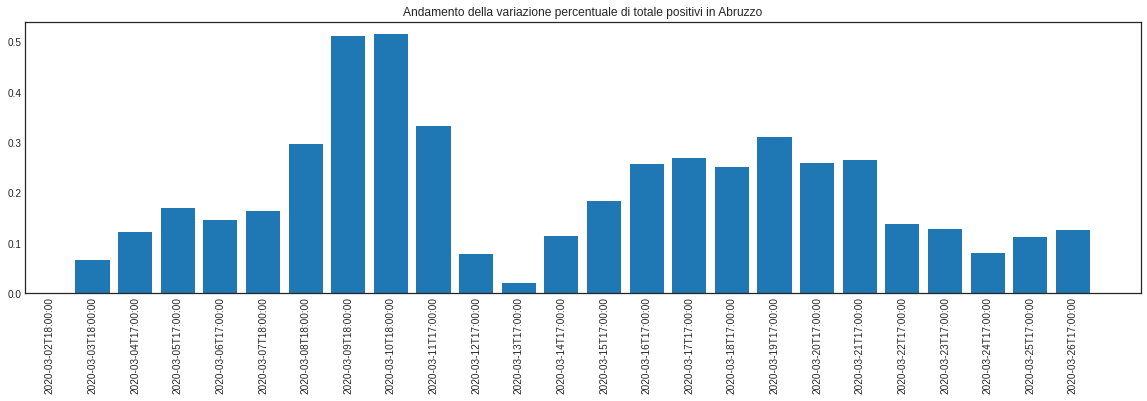

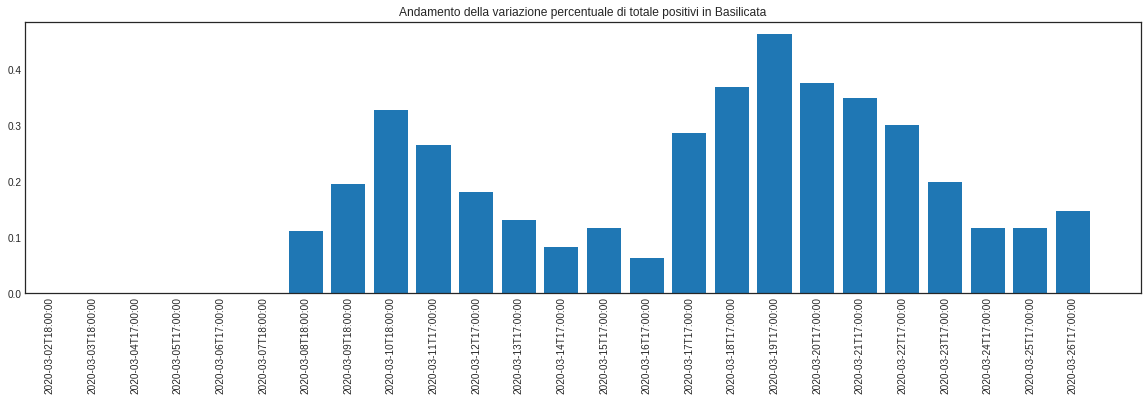

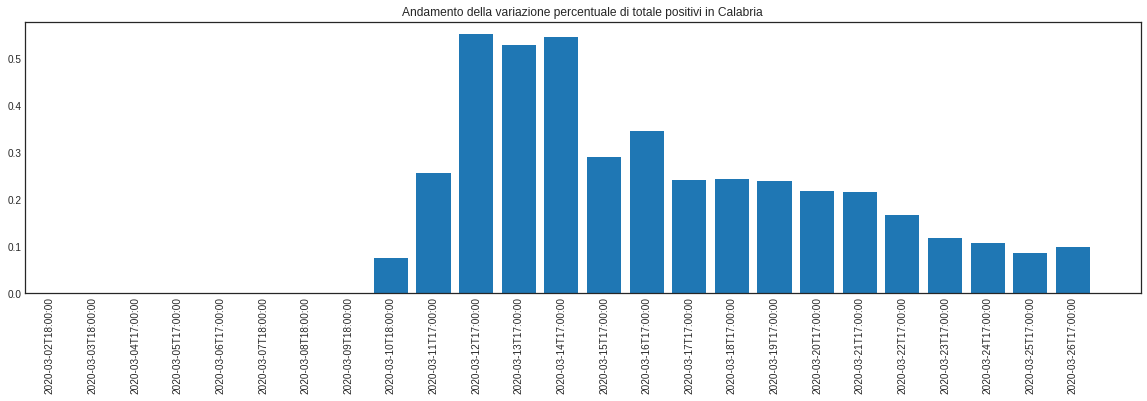

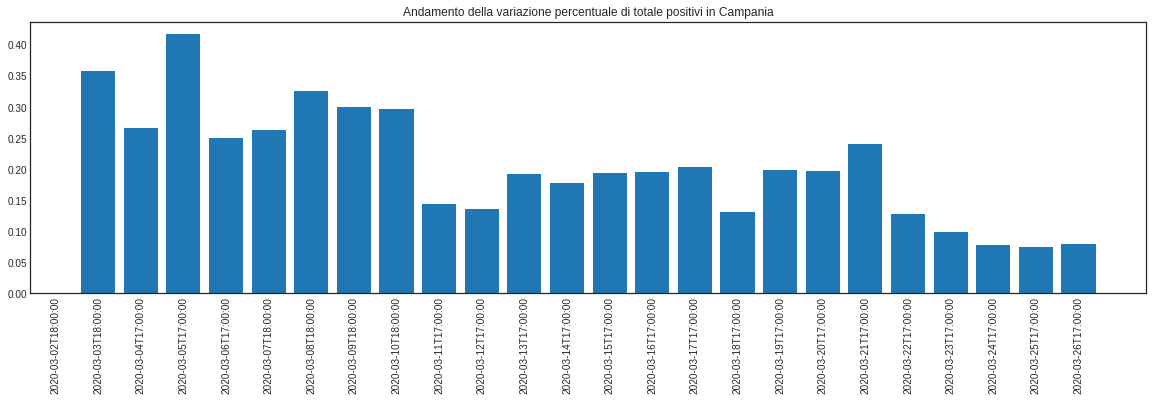

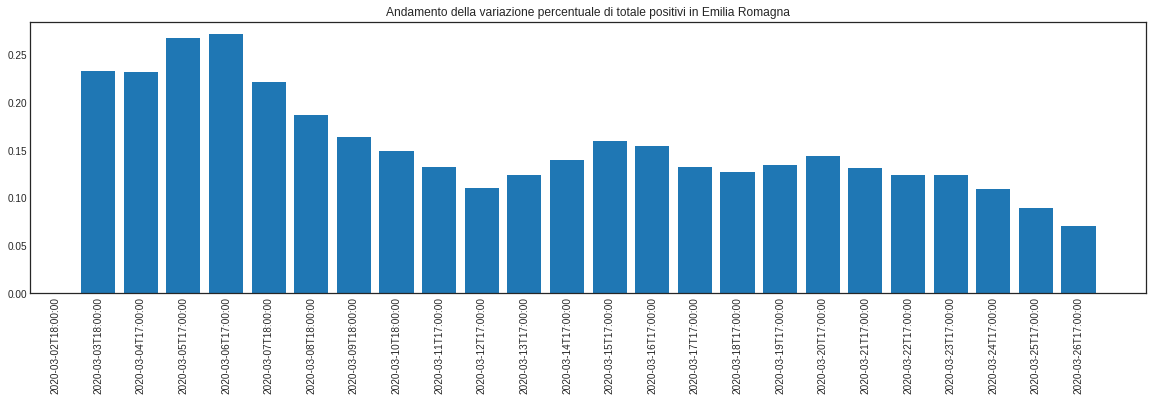

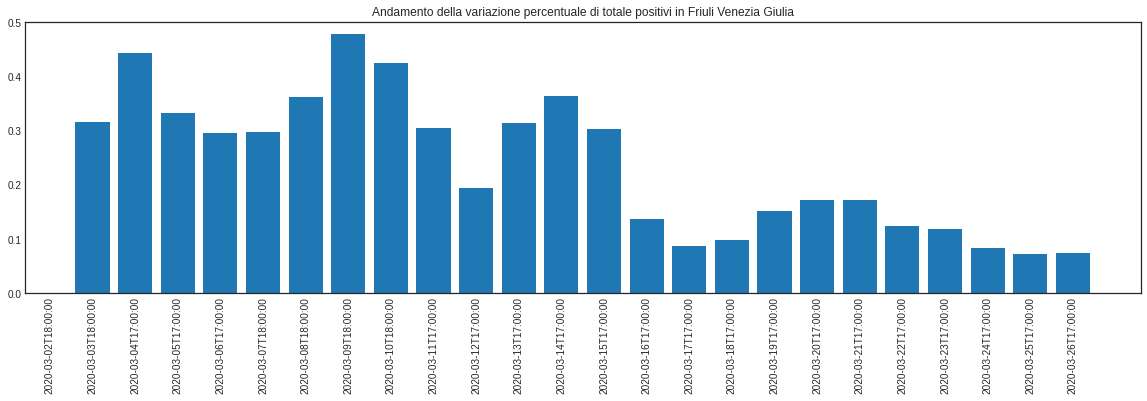

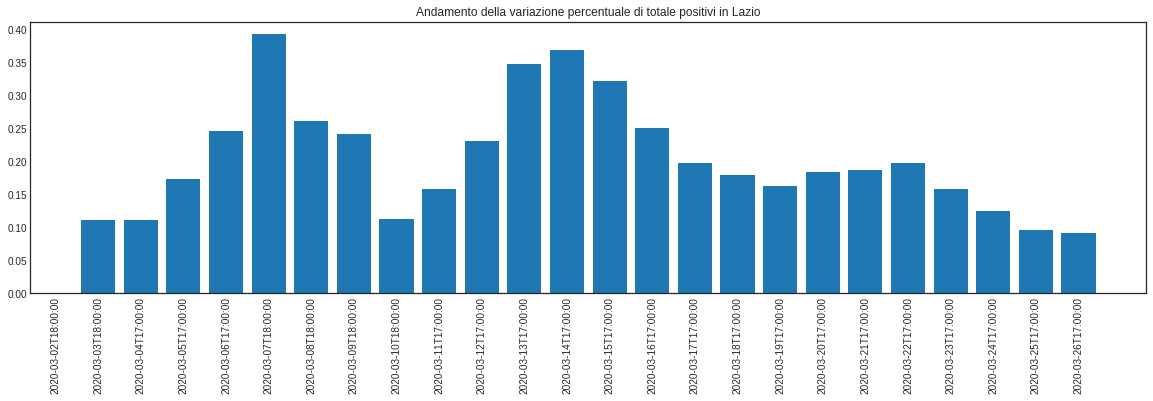

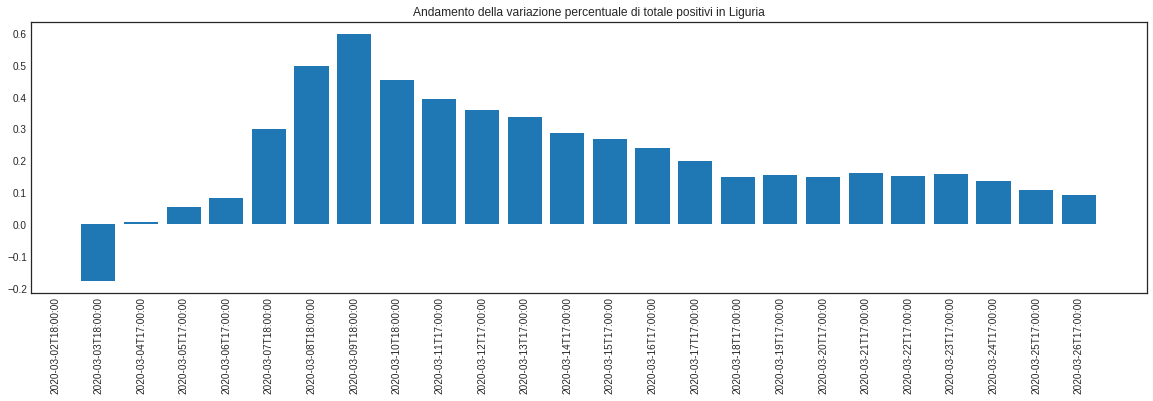

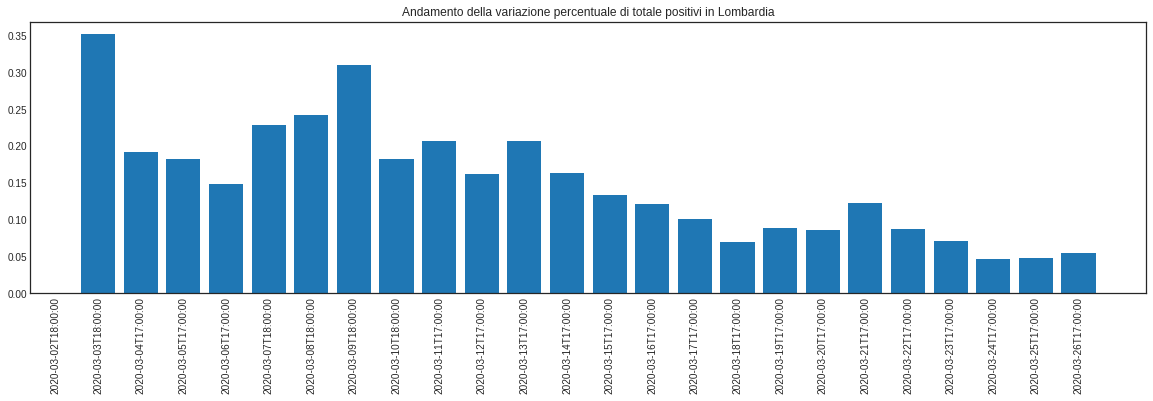

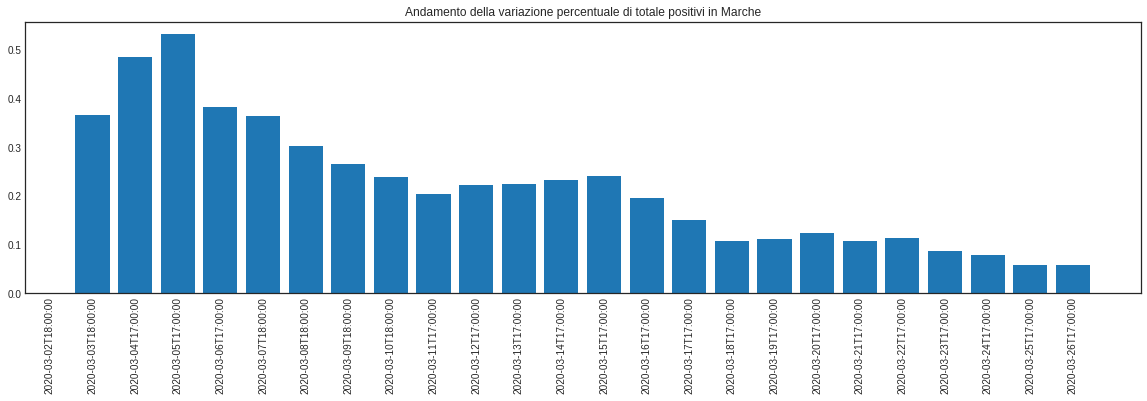

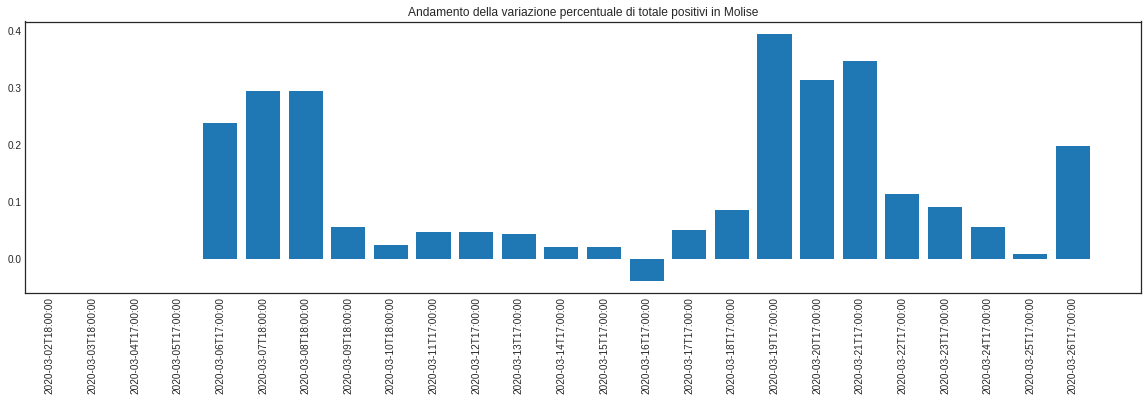

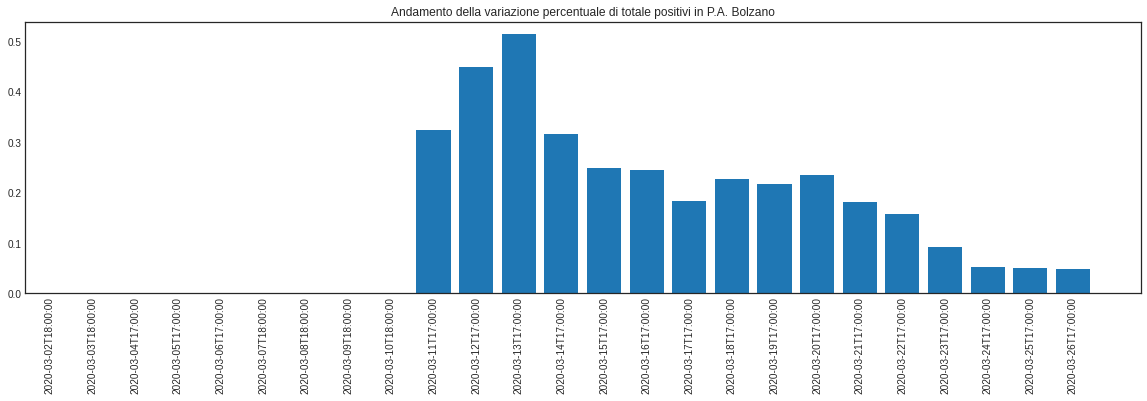

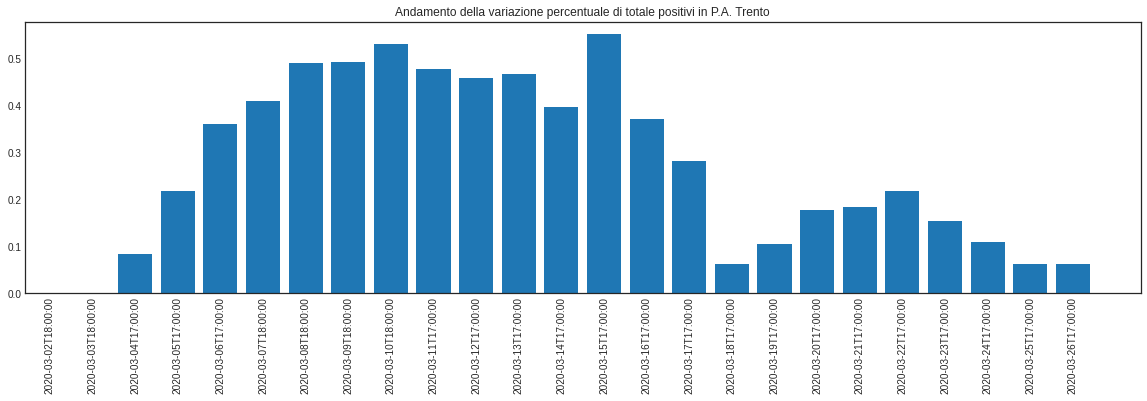

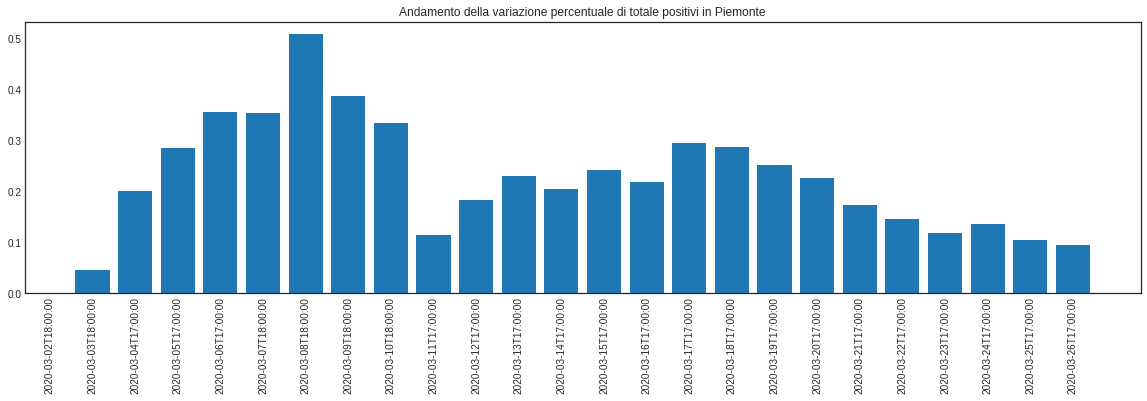

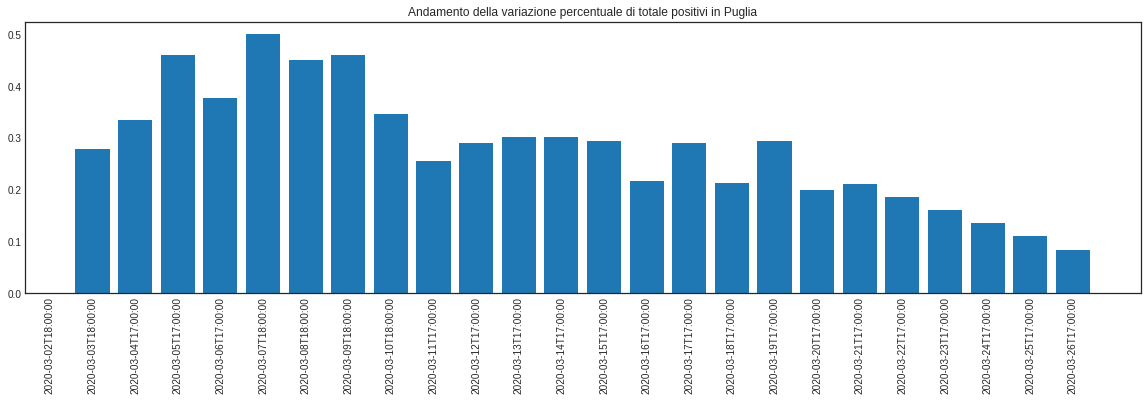

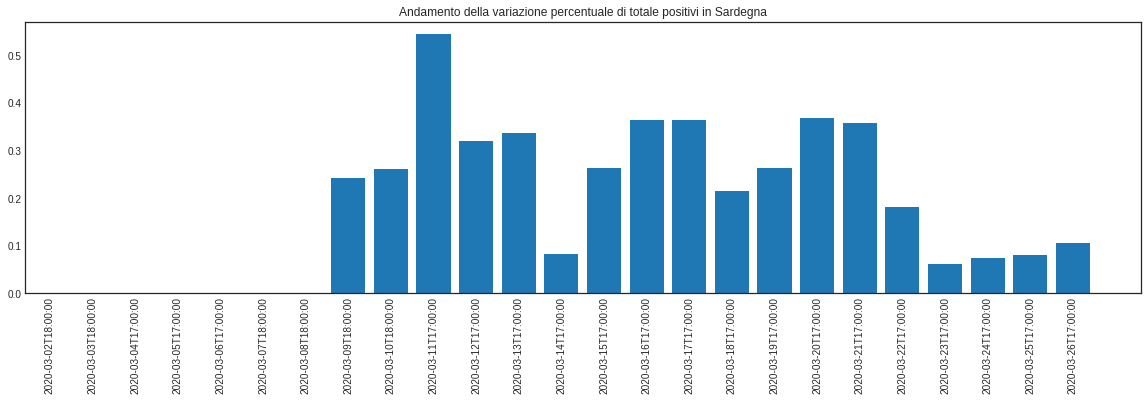

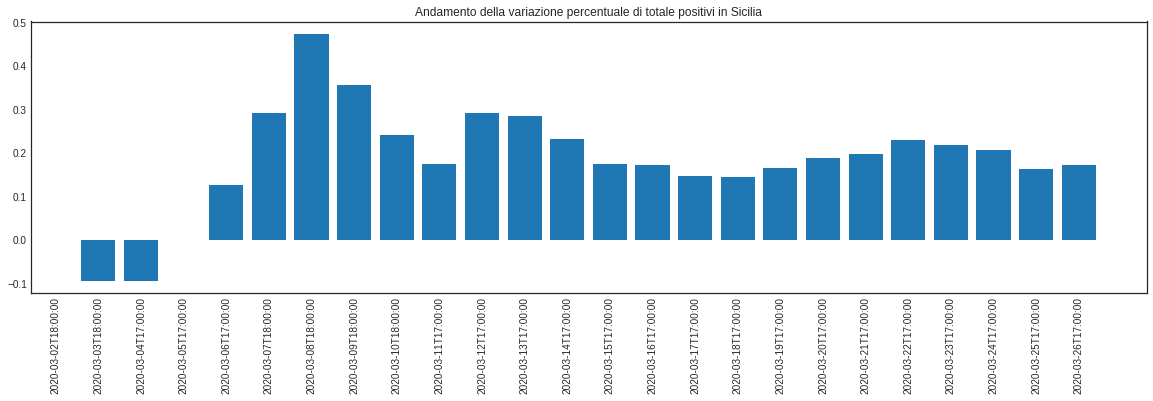

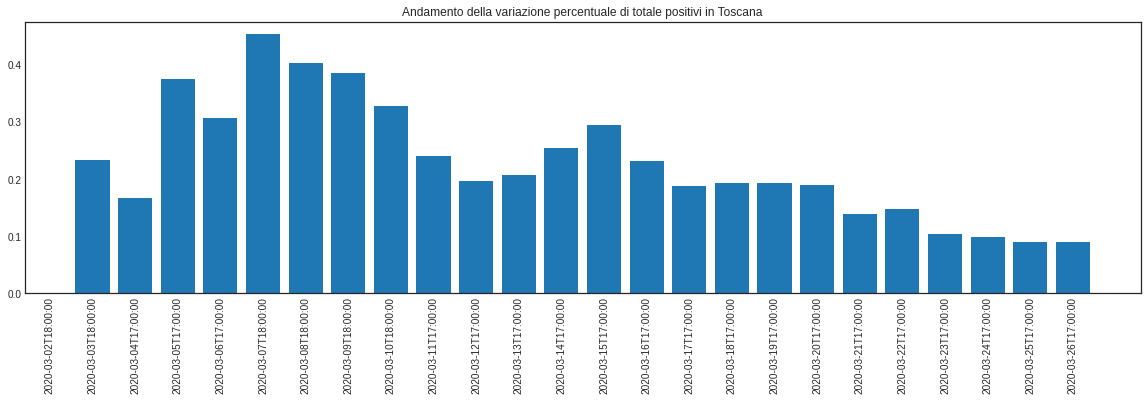

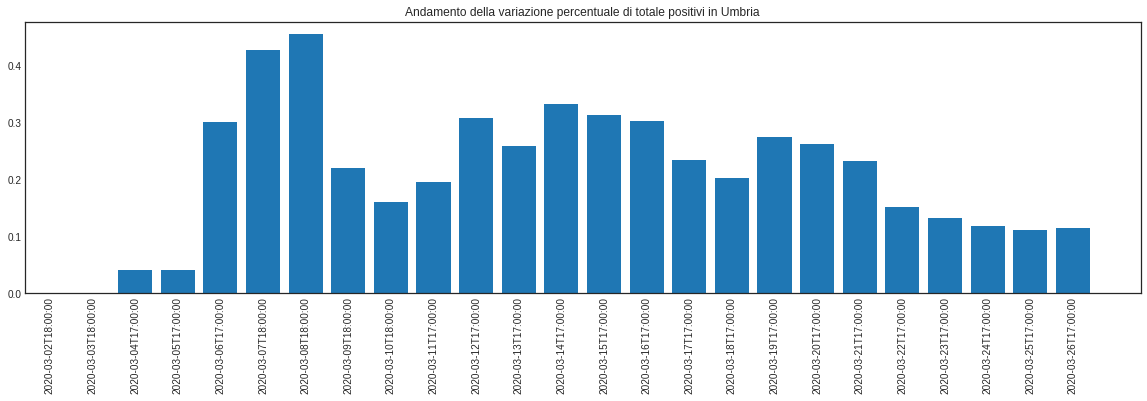

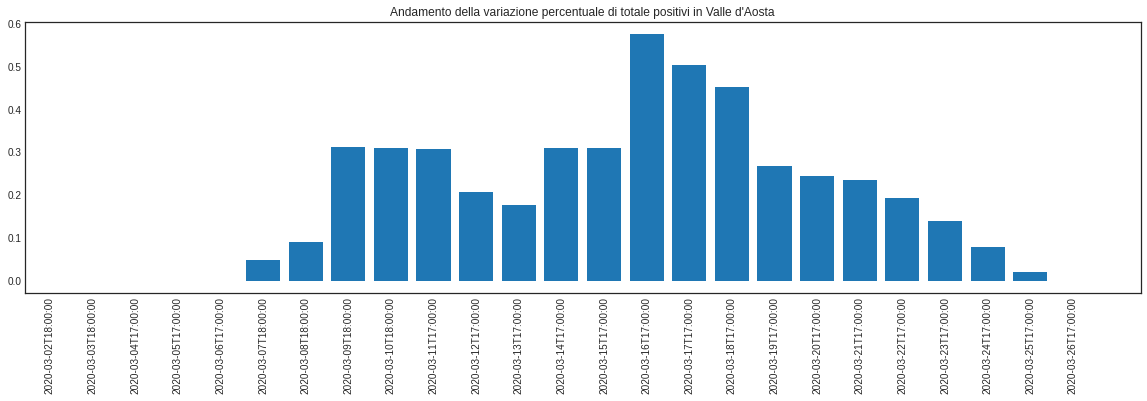

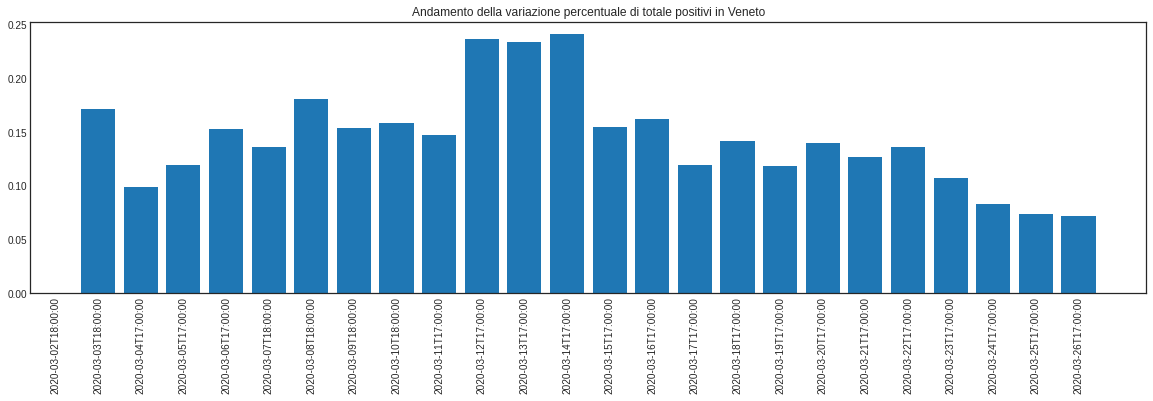

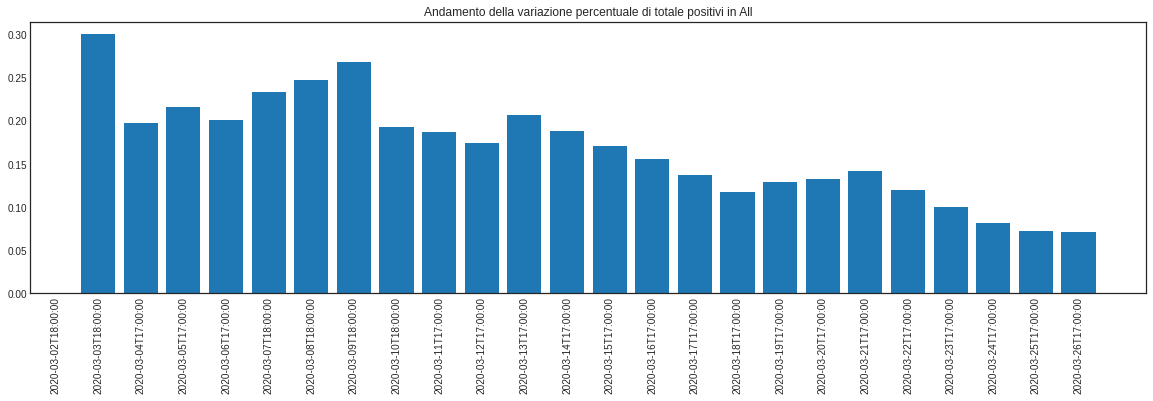

In [27]:
for region in list(italy_currently_positive_delta): 
    fig, ax = plt.subplots(figsize=(20,5))
    plt.xticks(rotation='vertical')
    plt.bar(italy_currently_positive_delta.index, height=italy_currently_positive_delta[region].rolling(window=3).mean())
    plt.title('Andamento della variazione percentuale di totale positivi in ' + region);

La media mobile a 3 giorni evidenzia un carattere ondulatorio del fenomeno con l'ampiezza delle onde che tende a ridursi da un periodo al successivo.

Al momento il picco sembra globalmente ancora lontano (un mese?) anche se in un caso (Valle d'Aosta) sembra essere stato raggiunto

Seguiranno indagini più approfondite sul versante predittivo e si affronteranno i casi delle altre nazioni per le quali sono disponibili dati completi